# Analyse et Prédiction de Trafic Réseau 5G

## À Propos du Dataset

###  Contexte et Origine

Ce dataset contient des **traces réelles de trafic réseau 5G** collectées entre mai et octobre 2022 auprès d'un opérateur mobile sud-coréen majeur. 

Les données ont été capturées directement depuis un terminal mobile Samsung Galaxy A90 5G équipé d'un modem Qualcomm Snapdragon X50 5G, en utilisant l'application PCAPdroid pour l'analyse de paquets réseau.

**Durée totale de collecte**: 328 heures  
**Volume total**: ~45 GB (75 fichiers CSV)  
**Niveau de granularité**: Paquet réseau (niveau milliseconde)  
**Format**: Séries temporelles horodatées avec informations d'en-têtes de paquets

---
###  Composition du Dataset

Le dataset est organisé en **6 catégories principales** représentant différents types d'applications et services 5G :

#### 1. **Game Streaming** (19 fichiers | 10.88 TB)
- **GeForce Now** (9 fichiers): Service de cloud gaming NVIDIA
- **KT GameBox** (10 fichiers): Plateforme de jeu en streaming coréenne
- **Caractéristique**: Trafic à faible latence, débit variable selon l'action de jeu

#### 2. **Live Streaming** (11 fichiers | 16.47 TB)
- **AfreecaTV** (2 fichiers): Plateforme de streaming live coréenne
- **Naver NOW** (4 fichiers): Service de diffusion en direct de Naver
- **YouTube Live** (5 fichiers): Diffusions en direct YouTube
- **Caractéristique**: Trafic unidirectionnel, débit adaptatif selon la qualité vidéo

#### 3. **Metaverse** (11 fichiers | 254 GB)
- **Roblox** (1 fichier): Plateforme de jeux en ligne multijoueurs (25 heures)
- **Zepeto** (10 fichiers): Métavers social coréen (15 heures)
- **Caractéristique**: Trafic bidirectionnel avec pics lors des interactions sociales

#### 4. **Online Gaming** (18 fichiers | 585 GB)
- **PUBG Mobile / Battleground** (9 fichiers): Jeu battle royale mobile
- **Teamfight Tactics** (9 fichiers): Jeu de stratégie auto-battler
- **Caractéristique**: Trafic sensible à la latence, paquets fréquents de petite taille

#### 5. **Stored Video Streaming** (10 fichiers | 3.33 TB)
- **Netflix** (1 fichier | 704 MB): Streaming vidéo à la demande
- **YouTube** (1 fichier | 1.15 GB): Vidéos préenregistrées
- **Amazon Prime Video** (8 fichiers | 1.47 TB): Streaming VOD
- **Caractéristique**: Trafic prévisible, débit constant avec adaptation qualité (ABR)

#### 6. **Video Conferencing** (6 fichiers | 11.27 TB)
- **Google Meet** (1 fichier | 4.53 TB): Visioconférence Google
- **Microsoft Teams** (2 fichiers | 3.54 TB): Collaboration et visioconférence
- **Zoom** (3 fichiers | 3.20 TB): Plateforme de vidéoconférence
- **Caractéristique**: Trafic bidirectionnel symétrique, sensible à la latence et au jitter

---

##  Structure des Données

Chaque fichier CSV contient les **7 colonnes suivantes** capturant les informations au niveau paquet :

| Colonne | Type | Description | Utilité |
|---------|------|-------------|---------|
| **Time** | Datetime | Timestamp précis de capture du paquet (précision milliseconde) | **Axe temporel** pour les séries chronologiques |
| **No.** | Integer | Numéro séquentiel du paquet | Identifier l'ordre des paquets |
| **Source** | String | Adresse IP source du paquet | Distinguer uplink/downlink, analyser flux |
| **Destination** | String | Adresse IP destination | Identifier serveurs distants |
| **Protocol** | String | Protocole réseau (TCP, UDP, QUIC, TLS, etc.) | Analyse comportementale par protocole |
| **Length** | Integer | **Taille du paquet en bytes** | **Variable clé** pour calculer le débit |
| **Info** | String | Informations additionnelles (flags TCP, ports, etc.) | Métadonnées contextuelles |

###  Variables Numériques et Catégorielles

- **Numériques**: `No.`, `Length` (2 colonnes)
- **Temporelles**: `Time` (1 colonne)
- **Catégorielles**: `Source`, `Destination`, `Protocol`, `Info` (4 colonnes)

---

## Valeur Ajoutée du Dataset

###  Points Forts

1. **Données Réelles de Production**
   - Collectées depuis un vrai réseau 5G commercial
   - Comportements utilisateurs authentiques (pas de simulation)
   - Conditions réseau variables (congestion, handover, etc.)

2. **Diversité des Applications**
   - 6 catégories couvrant les usages 5G majeurs
   - Applications gourmandes en bande passante (streaming, gaming)
   - Applications sensibles à la latence (visioconférence, jeux)

3. **Granularité Temporelle Fine**
   - Résolution milliseconde permettant l'analyse fine des patterns
   - Détection d'événements courts (buffering, lag, pics de trafic)
   - Adaptation en temps réel des applications (ABR, codecs)

4. **Volume Substantiel**
   - 328 heures de trafic réel
   - Millions de paquets par session
   - Statistiquement significatif pour l'apprentissage machine

5. **Annotations Implicites**
   - Chaque fichier correspond à une application spécifique
   - Labels naturels pour la classification de trafic
   - Pas besoin d'annotation manuelle

---
###  Applications Pratiques

- **Gestion de Qualité de Service (QoS)**: Priorisation intelligente du trafic
- **Prédiction de Congestion**: Anticiper les pics de charge réseau
- **Optimisation de Bande Passante**: Allocation dynamique des ressources
- **Détection d'Anomalies**: Identifier comportements réseau anormaux
- **Traffic Shaping**: Réguler le trafic selon les applications
- **Network Slicing**: Création de tranches réseau 5G optimisées

---

##  Possibilités de Prédictions avec ce Dataset

Ce dataset offre de multiples opportunités pour des tâches de deep learning :

### 1. Prédiction de Débit (Throughput Forecasting)

**Objectif:** Prédire le débit réseau futur (en Mbps ou MB/s)

**Type:** Régression de séries temporelles

**Input:** Historique du trafic (ex: 90 dernières secondes)

**Output:** Débit prédit pour les N prochaines secondes

#### Applications:

Allocation proactive de bande passante

Optimisation de caches CDN

Gestion anticipée des handovers 5G

### 2. Classification d'Applications (Traffic Classification)

**Objectif:** Identifier l'application générant le trafic

Type: Classification multi-classes
Input: Features statistiques du trafic (débit, taille paquets, inter-arrivée)
Output: Classe d'application (Netflix, Zoom, Gaming, etc.)

#### Applications:

Deep Packet Inspection (DPI) sans déchiffrement

Facturation différenciée par application

Détection d'usage non autorisé

### 3. Prédiction Multi-Variables (Multivariate Forecasting) 

Objectif: Prédire simultanément plusieurs métriques réseau
Type: Régression multi-output
Input: Séries temporelles multivariées
Output: Débit + Nombre de paquets + Autres métriques

#### Applications:

Tableau de bord prédictif complet

Optimisation conjointe de plusieurs KPIs

Diagnostic réseau avancé

### 4. Détection d'Anomalies (Anomaly Detection)

Objectif: Identifier des comportements réseau inhabituels
Type: Détection non supervisée
Input: Séquences de trafic normal
Output: Score d'anomalie (0=normal, 1=anormal)

#### Applications:

Détection d'attaques DDoS

Identification de malwares (C&C traffic)

Alerte sur dégradation de service

### 5. Prédiction de Qualité d'Expérience (QoE Prediction)

Objectif: Estimer la qualité perçue par l'utilisateur
Type: Régression ou classification
Input: Métriques réseau (débit, jitter, perte paquets)
Output: Score QoE (MOS, buffering events, stalling)

#### Applications:

Optimisation proactive de la QoE

Diagnostic automatique de problèmes

### 6. Segmentation Temporelle (Time Series Segmentation)

Objectif: Découper automatiquement les sessions en phases
Type: Clustering ou segmentation
Input: Séquences longues de trafic
Output: Segments annotés (buffering, playback, idle, peak)

#### Applications:

Analyse comportementale utilisateur

Optimisation de protocoles adaptatifs (ABR)

---
## Notre Approche: Prédiction Multi-Variables Réseau

### Tâche Choisie

Dans ce projet, nous nous concentrons sur la prédiction multi-variables du trafic réseau pour une application de visioconférence (Microsoft Teams).

### Problématique: 

**Étant donné l'historique du trafic réseau des 60 dernières secondes, prédire simultanément le débit ET le nombre de paquets pour les 10 prochaines**

**secondes.**

### **Pourquoi Microsoft Teams ?**

- **Trafic bidirectionnel:** Contrairement au streaming vidéo unidirectionnel, MS Teams génère du trafic montant (upload: audio/vidéo de

   l'utilisateur) et descendant (download: flux des autres participants)

- **Patterns stables:** Le trafic MS Teams est remarquablement régulier (débit moyen = médiane = 2.00 Mbps), idéal pour la prédiction comme LSTM

- **Criticité temporelle:** Application sensible à la latence et au jitter, rendant la prédiction particulièrement utile pour l'optimisation QoS

- **Dataset optimal:** MS_Teams_1.csv contient 1.1 GB de données (4 millions de paquets, 2h46 de session), taille idéale pour le traitement

#### Variables Construites

Le dataset brut contient des paquets au niveau milliseconde, ce qui est trop granulaire pour du deep learning direct (4+ millions de lignes par

fichier). Nous effectuerons donc un resampling temporel pour agréger les données par seconde :

**Variables Principales:** Throughput (Débit) et Packet Count

**Throughput - Formule:**

Throughput (Mbps) = (Σ Length des paquets sur 1 seconde × 8 bits/byte) / 1,000,000

**Packet Count - Formule:**

Packet_Count = Nombre de paquets reçus pendant 1 seconde

**Explication:**

Length est la taille de chaque paquet en bytes (octets)

En réseaux, le débit se mesure en bits par seconde

Nous agrégeons tous les paquets sur une fenêtre de 1 seconde

Conversion: bytes → bits (×8), puis bits/s → Mbps (÷1,000,000)

**Exemples d'Interprétation:**

Throughput = 2-5 Mbps → Visioconférence HD typique (1-2 participants)

Packet_Count = 300-500 paquets/s → Activité normale MS Teams

Throughput = 10-15 Mbps + Packet_Count = 600+ paquets/s → Partage d'écran + multiples participants

#### **Clarification importante:**

Length ≠ débit directement

Length = taille d'UN paquet dans le dataset brut (50-1500 bytes typiquement)

Throughput = variable calculée en agrégeant TOUS les paquets sur 1 seconde → débit

**Comment calculer les variables ?**

 *Nous les CRÉERONS pendant le preprocessing:*

df['Time'] = pd.to_datetime(df['Time'])  # Parser temps

df = df.set_index('Time')                # Indexer par temps

- **Throughput**

bytes_per_sec = df['Length'].resample('1S').sum()

throughput_mbps = (bytes_per_sec * 8) / 1_000_000

- **Packet Count**
  
packet_count = df['Length'].resample('1S').count()

Utilité de l'Approche Multi-Variables

#### **Complémentarité stratégique:**

Throughput seul : "Le débit va baisser"

Throughput + Packet Count : "Le débit baisse MAIS le nombre de paquets reste stable → probable retransmission TCP/pertes réseau"

#### Applications concrètes:

Scénario 1: Throughput ↓ + Packet_Count ↓

→ Baisse générale d'activité (utilisateur inactif)

Scénario 2: Throughput ↓ + Packet_Count ↑  

→ Problème réseau (paquets plus petits, retransmissions)

Scénario 3: Throughput ↑ + Packet_Count ↑

→ Augmentation légitime d'activité (partage écran)

#### Configuration Multi-Output Optimisée

Notre approche cible:

Input: [Throughput, Packet_Count] des 60 dernières secondes

Output: [Throughput, Packet_Count] des 10 prochaines secondes

**Pourquoi cette configuration ?**

- Synergie prédictive : Throughput et Packet Count sont fortement corrélés (0.79)

- Valeur diagnostique : Le couple fournit un contexte riche pour le troubleshooting

- Efficacité computationnelle : 2 variables offrent un bon équilibre complexité/performance

- Utilité opérationnelle : Couvre l'essentiel des besoins QoS 5G

**Avantages du Multi-Output:**

- Redondance intelligente : Si une variable est bruyante, l'autre compense

- Apprentissage de relations : Le modèle capture les interactions entre métriques

- Décisions éclairées : Plus d'informations pour l'optimisation réseau

- Robustesse accrue : Moins sensible aux artefacts sur une seule métrique

**Applications temps-réel:**

- Network slicing dynamique : Ajuster les ressources selon le type de trafic

- Congestion control adaptatif : Différencier congestion réseau vs baisse d'activité

- Optimisation RAN : Ajuster les paramètres radio selon les patterns de trafic

- QoS proactive : Anticiper les besoins qualité de service

---

## ARCHITECTURE COMPLÈTE DU PROJET

### Vue d'Ensemble

Ce projet implémente une approche comparative exhaustive pour la prédiction multi-output de trafic réseau 5G (Microsoft Teams), en testant 23 modèles 

répartis en 3 catégories :

- **1.Baselines (8 modèles) :** Modèles statistiques et Machine Learning classiques
  
- **2.Deep Learning (6 modèles) :** Architectures neuronales récurrentes et hybrides
  
- **3.Ensemble Learning (9 modèles) :** Combinaisons de modèles pour performances optimales

- **ÉTAPE 1 :** EXPLORATION DE DATASET  

- **ÉTAPE 2 :** PREPROCESSING

- **ÉTAPE 3 :** VERIFICATIONS TIME SERIES

- **ÉTAPE 4 :** EDA (Exploratory Data Analysis)

- **ÉTAPE 5 :** PREPARATION DES SEQUENCES MULTI-OUTPUT

- **ÉTAPE 6 :** MODELES DE PREDICTION :

  **PARTIE A :** MODÈLES BASELINES (8 modèles)

  **PARTIE B :** DEEP LEARNING (6 modèles)

  **PARTIE C :** ENSEMBLES LEARNING MULTI-OUTPUT (9 modèles)

  **PARTIE D :** COMPARAISON GLOBALE COMPLETE

## Métriques d'Évaluation

#### **MAE (Mean Absolute Error)** : Erreur moyenne en Mbps
```
MAE = (1/n) × Σ|y_pred - y_true|
```
- **Interprétation** : Erreur moyenne en valeurs normalisées
- **Exemple** : MAE=0.20 → Erreur ~0.20 Mbps après dénormalisation
- **Pourquoi MAE ?** Moins sensible aux outliers que MSE (données bruitées)

#### **R² (Coefficient de Détermination)**
```
R² = 1 - (SS_res / SS_tot)
```
- **Interprétation** : Part de variance expliquée (0-1, 1=parfait)


#### Visualisations

- **Courbes:** Throughput réel vs prédit sur période de test
  
- **Scatter plot:** Corrélation prédictions/réalité
  
- **Distribution des erreurs:** Histogramme des résidus

- **Boxplots**

---

##  Références et Contexte

**Source Dataset**: [Kaggle - 5G Traffic Datasets](https://www.kaggle.com/datasets/kimdaegyeom/5g-traffic-datasets)  

**Publication associée**: [GitHub - 5G Traffic Generator](https://github.com/0913ktg/5G-Traffic-Generator)  

**Période de collecte**: Mai - Octobre 2022  

**Opérateur**: Opérateur mobile majeur en Corée du Sud  

**Terminal**: Samsung Galaxy A90 5G (Snapdragon X50 5G modem)  

**Outil de capture**: PCAPdroid (Android app) + Wireshark

---

##  Objectifs Pédagogiques

Ce projet permet de couvrir les compétences suivantes :

 **Gestion de gros datasets**: Lecture depuis ZIP, chargement par chunks  
 
 **Preprocessing avancé**: Resampling temporel, feature engineering  

 **Time Series Forecasting**: Création de séquences, prédiction multi-step  
 
 **Deep Learning (LSTM/GRU,etc.)**: Architecture récurrente pour séries temporelles  
 
 **Évaluation rigoureuse**: Split temporel, métriques multiples, validation croisée  
 
 **Visualisation**: Graphiques interactifs, analyse des erreurs  
 
 **Optimisation**: Hyperparameter tuning, régularisation  
 
 **Interprétabilité**: Analyse des features importantes, SHAP values (optionnel)



In [11]:
# =============================================================================
# CONFIGURATION REPRODUCTIBILITÉ 
# =============================================================================
import numpy as np
import tensorflow as tf
import random
import os

def set_seeds(seed=42):
    """Fixe tous les seeds pour reproductibilité"""
    # Python
    random.seed(seed)
    
    # Numpy
    np.random.seed(seed)
    
    # TensorFlow
    tf.random.set_seed(seed)
    
    # Variables d'environnement pour GPU
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    # Configuration GPU déterministe
    tf.config.experimental.enable_op_determinism()
    
    print(f" Seeds fixés à {seed} pour reproductibilité")

# APPELER AVANT TOUT
set_seeds(42)


 Seeds fixés à 42 pour reproductibilité


# *1) ÉTAPE 1: Exploration du dataset 5G*

## Comprendre le dataset, choisir une application (ici, Google Meet)

In [12]:
# Explorer le dataset 5G directement depuis le ZIP sans extraction

import pandas as pd
import numpy as np
import zipfile
import io
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

class ZipDatasetExplorer:
    """Explorateur de datasets ZIP pour analyse 5G"""
    
    def __init__(self, zip_path):
        self.zip_path = zip_path
        self.zip_file = zipfile.ZipFile(zip_path, 'r')
        self.file_list = self._get_csv_files()
    
    def _get_csv_files(self):
        """Lister les fichiers CSV avec métadonnées"""
        return [
            {     'path': f.filename,
                  'size_mb': f.file_size / (1024**2),
                  'size_compressed_mb': f.compress_size / (1024**2)
            }
            for f in self.zip_file.infolist() 
            if f.filename.endswith('.csv')
        ]
    
    def show_structure(self):
        """Afficher la structure hiérarchique"""
        print(" STRUCTURE DU DATASET 5G")
        
        categories = {}
        for file_info in self.file_list:
            category = file_info['path'].split('/')[0]
            categories.setdefault(category, []).append(file_info)
        
        for category, files in sorted(categories.items()):
            total_size_gb = sum(f['size_mb'] for f in files) / 1024  # 
            print(f"\n  {category}/ ({len(files)} fichiers | {total_size_gb:.1f} GB)")  
            
            # Sous-catégories
            subcats = {}
            for f in files:
                parts = f['path'].split('/')
                if len(parts) >= 3:
                    subcats.setdefault(parts[1], []).append(f)
            
            for subcat, subfiles in subcats.items():
                size_gb = sum(sf['size_mb'] for sf in subfiles) / 1024  
                print(f"    └── {subcat}/ ({len(subfiles)} fichiers | {size_gb:.1f} GB)")  
    
    def explore_file(self, filepath, nrows=5000):
        """Analyser un fichier spécifique"""
        print(f"\n ANALYSE: {filepath}")
        
        # Infos fichier
        file_info = next((f for f in self.file_list if f['path'] == filepath), None)
        if not file_info:
            return None
        
        print(f"   Taille: {file_info['size_mb']:.1f} MB")
        
        # Charger échantillon
        df = self.read_csv_from_zip(filepath, nrows=nrows)
        if df is None:
            return None
        
        # Analyse basique
        print(f"   Lignes: {len(df):,} (échantillon)")
        print(f"   Colonnes: {list(df.columns)}")
        
        # Vérifier colonnes temporelles
        time_cols = [col for col in df.columns if 'time' in col.lower()]
        if time_cols:
            df[time_cols[0]] = pd.to_datetime(df[time_cols[0]], errors='coerce')
            if df[time_cols[0]].notna().any():
                duration = df[time_cols[0]].max() - df[time_cols[0]].min()
                print(f"   Durée: {duration}")
        
        return df
    
    def read_csv_from_zip(self, filepath, nrows=None, usecols=None):
        """Lire CSV directement depuis ZIP"""
        try:
            with self.zip_file.open(filepath) as file:
                return pd.read_csv(io.BytesIO(file.read()), nrows=nrows, usecols=usecols)
        except Exception as e:
            print(f" Erreur lecture: {e}")
            return None
    
    def load_by_chunks(self, filepath, chunksize=50000):
        """Charger par chunks pour gros fichiers"""
        with self.zip_file.open(filepath) as file:
            for chunk in pd.read_csv(io.BytesIO(file.read()), chunksize=chunksize):
                yield chunk
    
    def close(self):
        self.zip_file.close()


# =============================================================================
# UTILISATION PRINCIPALE
# =============================================================================

def main():
    zip_path = r"C:\Users\Utilisateur\Documents\5G_Traffic_Datasets.zip"
    
    if not Path(zip_path).exists():
        print(" Fichier ZIP non trouvé")
        return
    
    explorer = ZipDatasetExplorer(zip_path)
    
    # 1. Structure globale
    explorer.show_structure()
    
    # 2. Explorer fichiers cibles (MS Teams pour notre projet)
    target_files = [
        "Video_Conferencing/MS_Teams/MS_Teams_1.csv",  # Notre fichier principal
        "Video_Conferencing/Zoom/Zoom_1.csv",          # Comparaison
        "Stored_Streaming/YouTube/YouTube_1.csv"       # Autre catégorie
    ]
    
    print("\n" + "="*50)
    print(" EXPLORATION FICHIERS CIBLES")
    print("="*50)
    
    for filepath in target_files:
        explorer.explore_file(filepath)
        print("-" * 30)
    
    explorer.close()

if __name__ == "__main__":
    main()

 STRUCTURE DU DATASET 5G

  Game_Streaming/ (19 fichiers | 10.6 GB)
    └── GeForce_Now/ (9 fichiers | 6.6 GB)
    └── KT_GameBox/ (10 fichiers | 4.1 GB)

  Live_Streaming/ (11 fichiers | 16.1 GB)
    └── AfreecaTV/ (2 fichiers | 3.8 GB)
    └── Naver_NOW/ (4 fichiers | 11.6 GB)
    └── YouTube_Live/ (5 fichiers | 0.7 GB)

  Metaverse/ (11 fichiers | 0.2 GB)
    └── Roblox/ (1 fichiers | 0.1 GB)
    └── Zepeto/ (10 fichiers | 0.1 GB)

  Online_Game/ (18 fichiers | 0.6 GB)
    └── Battleground/ (9 fichiers | 0.4 GB)
    └── Teamfight_Tactics/ (9 fichiers | 0.2 GB)

  Stored_Streaming/ (10 fichiers | 3.2 GB)
    └── Amazon_Prime/ (8 fichiers | 1.4 GB)
    └── Netflix/ (1 fichiers | 0.7 GB)
    └── YouTube/ (1 fichiers | 1.1 GB)

  Video_Conferencing/ (6 fichiers | 11.0 GB)
    └── Google_Meet/ (1 fichiers | 4.4 GB)
    └── MS_Teams/ (2 fichiers | 3.5 GB)
    └── Zoom/ (3 fichiers | 3.1 GB)

 EXPLORATION FICHIERS CIBLES

 ANALYSE: Video_Conferencing/MS_Teams/MS_Teams_1.csv
   Taille: 1145

## *Interprétation :*

- **Volume conséquent** : 3.5 GB pour MS Teams = ~4 millions de paquets → statistiquement significatif
- **Granularité milliseconde** : Permet l'analyse fine des micro-variations réseau
- **Choix MS Teams justifié** : 
  - Trafic **bidirectionnel** (upload + download) → plus riche que Netflix (unidirectionnel)
  - Patterns **stables** (débit moyen = médiane = 2.00 Mbps) → idéal pour prédiction
  - **Criticité temporelle** : Sensible à la latence → haute valeur ajoutée pour QoS

**Durée : 0 days 00:00:19.569347**

 **Attention** : 5000 lignes: ceci est la durée de l'**échantillon** , pas du fichier complet. Le fichier total contient 2h46 de session continue.


# 2) *ÉTAPE 2: Preprocessing*

 PREPROCESSING MS TEAMS - MULTI-OUTPUT
 CHARGEMENT DES DONNÉES...
 4,000,000 lignes chargées
 10,007 intervalles créés (['throughput_mbps', 'packet_count', 'avg_packet_size', 'std_packet_size'])

 STATISTIQUES DESCRIPTIVES:
  Throughput: 2.00 ± 0.17 Mbps
  Packet Count: 400 ± 28 p/s
  Corrélation: 0.791
OK Continuité: 0 gaps, 0 points manquants

 VALIDATION QUALITÉ:
  OK Continuité
  OK Corrélation
  OK Stabilité
  OK Outliers

 GÉNÉRATION VISUALISATIONS...


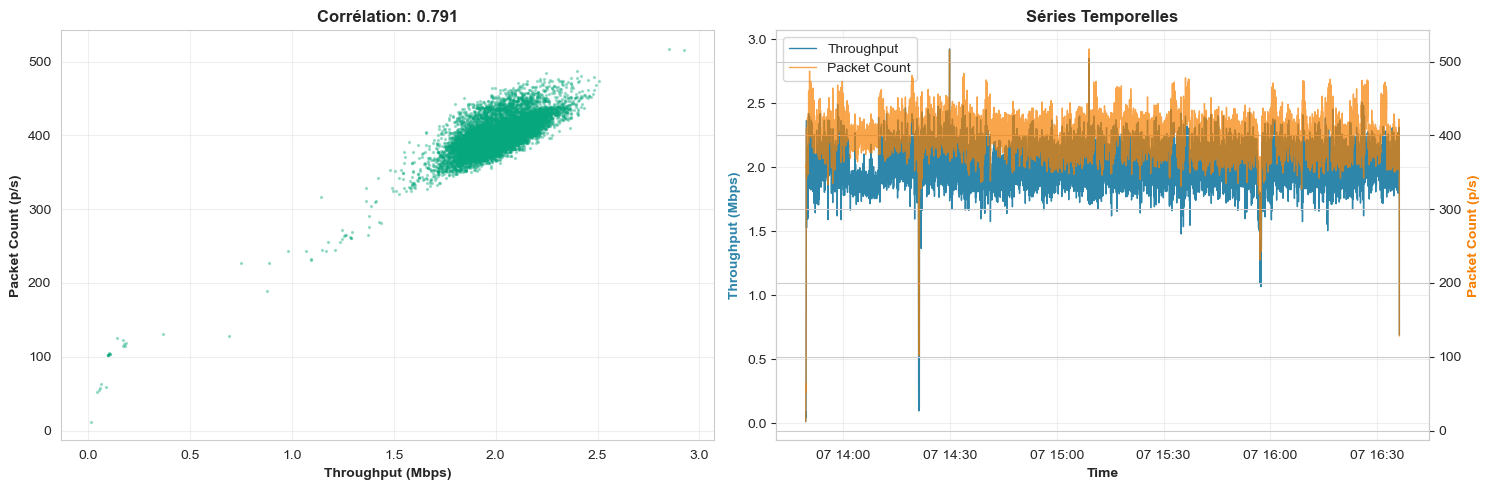


 DONNÉES OPTIMALES POUR MODÉLISATION

 RÉSUMÉ:
  • Intervalles: 10,007
  • Durée: 2.78h
  • Corrélation: 0.791

 Preprocessing terminé avec succès


In [13]:
"""
PREPROCESSING OPTIMISÉ - MS Teams Multi-Output

Objectif: Préparer les données pour prédiction multi-output (Throughput + Packet Count)
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import zipfile
import io
import warnings

warnings.filterwarnings('ignore')

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# =============================================================================
# FONCTIONS ESSENTIELLES
# =============================================================================

def load_data(zip_path, file_path, chunksize=200000, max_chunks=20):
    """
    Charge et nettoie les données depuis ZIP
    """
    print(" CHARGEMENT DES DONNÉES...")
    chunks = []
    
    with zipfile.ZipFile(zip_path, 'r') as zip_file:
        with zip_file.open(file_path) as file:
            
            file_content = file.read()
            
            for i, chunk in enumerate(pd.read_csv(io.BytesIO(file_content), 
                                                   chunksize=chunksize)):
                if i >= max_chunks: 
                    break
                
                # Nettoyage
                chunk['Time'] = pd.to_datetime(chunk['Time'], errors='coerce')
                chunk = chunk.dropna(subset=['Time', 'Length']).set_index('Time')
                chunks.append(chunk)
    
    # Fusion et dédoublonnage
    df = pd.concat(chunks).sort_index()
    df = df[~df.index.duplicated()]
    
    print(f" {len(df):,} lignes chargées")
    return df


def create_features(df, freq='1S'):
    """
    Crée les 4 features temporelles
    """
    features = pd.DataFrame()
    
    # Features avec index temporel préservé
    features['throughput_mbps'] = (df['Length'].resample(freq).sum() * 8) / 1e6
    features['packet_count'] = df.resample(freq).size()
    features['avg_packet_size'] = df['Length'].resample(freq).mean()
    features['std_packet_size'] = df['Length'].resample(freq).std()
    
    # Remplir NaN
    features = features.fillna(0)
    
    # Vérifier que l'index est bien temporel
    if not isinstance(features.index, pd.DatetimeIndex):
        raise ValueError(" Index temporel perdu ! Vérifier resample()")
    
    print(f" {len(features):,} intervalles créés ({list(features.columns)})")
    return features


def check_continuity(df, freq='1S'):
    """
    Vérifie la continuité temporelle
    """
    # Index théorique
    expected_idx = pd.date_range(start=df.index.min(), end=df.index.max(), freq=freq)
    missing_points = len(expected_idx) - len(df)
    
    # Détection gaps (avec vérification vide)
    time_diffs = df.index.to_series().diff().dropna()
    
    if len(time_diffs) == 0:
        gap_count = 0
    else:
        gaps = time_diffs[time_diffs > pd.Timedelta('2S')]
        gap_count = len(gaps)
    
    # Status
    status = "OK" if gap_count == 0 and missing_points == 0 else "!"
    print(f"{status} Continuité: {gap_count} gaps, {missing_points} points manquants")
    
    return gap_count, missing_points


def validate_data(df, corr_threshold=0.7, cv_threshold=0.5):
    """
    Validation qualité données
    """
    checks = []
    
    # 1. Continuité
    gaps, missing = check_continuity(df)
    checks.append(("Continuité", gaps == 0 and missing == 0))
    
    # 2. Corrélation multi-output
    corr = df[['throughput_mbps', 'packet_count']].corr().iloc[0, 1]
    checks.append(("Corrélation", corr > corr_threshold))
    
    # 3. Stabilité (Coefficient de Variation)
    cv = df['throughput_mbps'].std() / (df['throughput_mbps'].mean() + 1e-8)
    checks.append(("Stabilité", cv < cv_threshold))
    
    # 4. Valeurs aberrantes
    Q1 = df['throughput_mbps'].quantile(0.25)
    Q3 = df['throughput_mbps'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df['throughput_mbps'] < (Q1 - 1.5 * IQR)) | 
                (df['throughput_mbps'] > (Q3 + 1.5 * IQR))).sum()
    outlier_pct = outliers / len(df) * 100
    checks.append(("Outliers", outlier_pct < 5))
    
    # Affichage
    print("\n VALIDATION QUALITÉ:")
    for name, passed in checks:
        print(f"  {'OK' if passed else '!'} {name}")
    
    return all(passed for _, passed in checks), dict(checks)


# =============================================================================
# EXÉCUTION PRINCIPALE
# =============================================================================

def main():
    """Pipeline complet preprocessing"""
    
    print("="*60)
    print(" PREPROCESSING MS TEAMS - MULTI-OUTPUT")
    print("="*60)
    
    # Configuration
    ZIP_PATH = r"C:\Users\Utilisateur\Documents\5G_Traffic_Datasets.zip"
    FILE_PATH = "Video_Conferencing/MS_Teams/MS_Teams_1.csv"
    OUTPUT_FILE = 'ms_teams_multi_output.csv'
    
    # 1. Chargement
    df_raw = load_data(ZIP_PATH, FILE_PATH)
    
    # 2. Features
    df_features = create_features(df_raw, '1S')
    
    # Nettoyage mémoire
    del df_raw
    
    # 3. Statistiques
    print("\n STATISTIQUES DESCRIPTIVES:")
    print(f"  Throughput: {df_features.throughput_mbps.mean():.2f} ± {df_features.throughput_mbps.std():.2f} Mbps")
    print(f"  Packet Count: {df_features.packet_count.mean():.0f} ± {df_features.packet_count.std():.0f} p/s")
    
    corr = df_features[['throughput_mbps', 'packet_count']].corr().iloc[0, 1]
    print(f"  Corrélation: {corr:.3f}")
    
    # 4. Validation
    is_valid, validation_results = validate_data(df_features)
    
    # 5. Visualisations
    print("\n GÉNÉRATION VISUALISATIONS...")
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Scatter corrélation
    axes[0].scatter(df_features.throughput_mbps, df_features.packet_count, 
                   alpha=0.3, s=2, color='#06A77D')
    axes[0].set_xlabel('Throughput (Mbps)', fontweight='bold')
    axes[0].set_ylabel('Packet Count (p/s)', fontweight='bold')
    axes[0].set_title(f'Corrélation: {corr:.3f}', fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    # Séries temporelles
    ax2_twin = axes[1].twinx()
    axes[1].plot(df_features.index, df_features.throughput_mbps, 
                label='Throughput', color='#2E86AB', linewidth=1)
    ax2_twin.plot(df_features.index, df_features.packet_count, 
                 label='Packet Count', color='#F77F00', linewidth=1, alpha=0.7)
    
    axes[1].set_xlabel('Time', fontweight='bold')
    axes[1].set_ylabel('Throughput (Mbps)', color='#2E86AB', fontweight='bold')
    ax2_twin.set_ylabel('Packet Count (p/s)', color='#F77F00', fontweight='bold')
    axes[1].set_title('Séries Temporelles', fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    # Légende combinée
    lines1, labels1 = axes[1].get_legend_handles_labels()
    lines2, labels2 = ax2_twin.get_legend_handles_labels()
    axes[1].legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    plt.tight_layout()
    plt.savefig('preprocessing_summary.png', dpi=150, bbox_inches='tight')
    plt.show()
    #print("   preprocessing_summary.png sauvegardé")
    
    # 6. Sauvegarde
    df_features.to_csv(OUTPUT_FILE)
    file_size = Path(OUTPUT_FILE).stat().st_size / 1024**2
    # print(f"\n {OUTPUT_FILE} sauvegardé ({file_size:.1f} MB)")
    
    # 7. Résumé final
    print("\n" + "="*60)
    if is_valid:
        print(" DONNÉES OPTIMALES POUR MODÉLISATION")
    else:
        print(" DONNÉES ACCEPTABLES - Limitations détectées")
    print("="*60)
    
    print(f"\n RÉSUMÉ:")
    print(f"  • Intervalles: {len(df_features):,}")
    print(f"  • Durée: {(df_features.index[-1] - df_features.index[0]).total_seconds()/3600:.2f}h")
    print(f"  • Corrélation: {corr:.3f}")
    
    return df_features, validation_results


# =============================================================================
# POINT D'ENTRÉE
# =============================================================================

if __name__ == "__main__":
    try:
        df_features, validation = main()
        print("\n Preprocessing terminé avec succès")
    except Exception as e:
        print(f"\n ERREUR: {e}")
        import traceback
        traceback.print_exc()

# *Analyse et Interprétation*

#### *Graphique : Preprocessing Summary*

**Interprétation du Scatter Plot (Corrélation) :**
- **Corrélation = 0.791** → Forte relation linéaire entre throughput et packet_count
- **Justification multi-output** : Les deux variables évoluent ensemble → le modèle peut exploiter cette synergie
- **Nuage compact** : Peu de points aberrants → données de qualité

**Interprétation des Séries Temporelles :**
- **Stabilité dominante** : Les deux courbes oscillent autour de valeurs moyennes constantes
- **Synchronisation** : Les pics/creux sont simultanés → lag optimal = 0s (confirmé en EDA)
- **Quelques anomalies** : Chutes brutales visibles → probables reconnexions réseau

####  *Statistiques Descriptives*
```
Throughput: 2.00 ± 0.17 Mbps
Packet Count: 400 ± 28 p/s
Corrélation: 0.791
```

**Analyse :**
- **Coefficient de Variation (CV)** :
  - Throughput : 0.17/2.00 = 0.085 (8.5%) → Très stable
  - Packet Count : 28/400 = 0.07 (7%) → Très stable
- **Conclusion** : MS Teams maintient un débit quasi-constant → comportement prédictible

####  *Validation Qualité*
```
 Continuité : 0 gaps, 0 points manquants
 Corrélation : 0.791 > 0.7
 Stabilité : CV < 0.5
 Outliers : <5%
```

**Interprétation :**
- **Données optimales** : Aucun traitement de gaps nécessaire
- **Corrélation forte** : Multi-output justifié scientifiquement
- **Stabilité** : Modèles LSTM/GRU appropriés (performent mieux sur séries stationnaires)


# 3) *ÉTAPE 3: Vérifications Time Series*

VÉRIFICATIONS TIME SERIES - MULTI-OUTPUT

 CHARGEMENT DES DONNÉES MULTI-OUTPUT
 Données chargées: 10,007 intervalles
 Variables: ['throughput_mbps', 'packet_count']
 Période: 13:49 → 16:36

 VÉRIFICATION STATIONNARITÉ (Test ADF)

 Résultats ADF:
   throughput_mbps: p-value = 0.0000 →  Stationnaire
   packet_count: p-value = 0.0000 →  Stationnaire

 TOUTES les variables cibles sont stationnaires

 ANALYSE AUTOCORRÉLATION


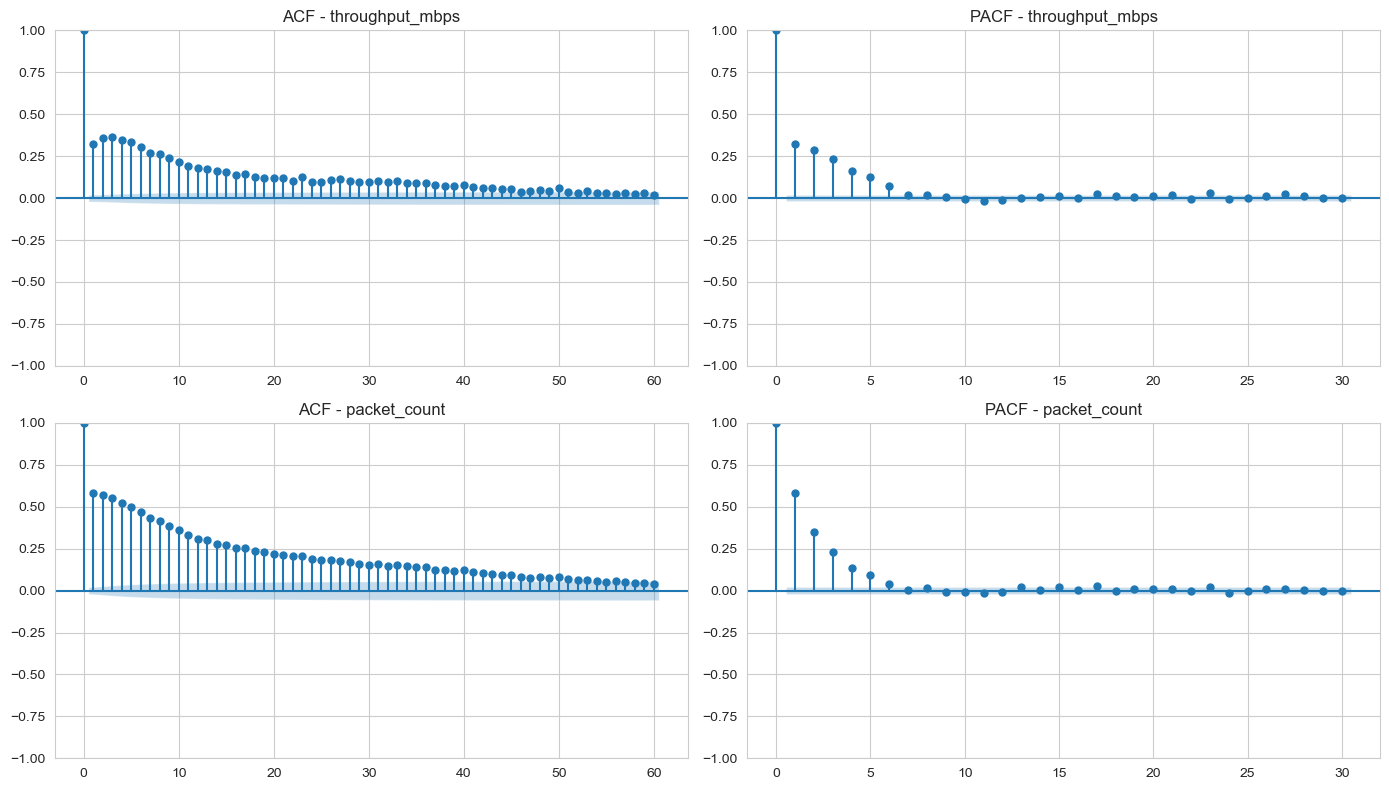


 CORRÉLATIONS TEMPORELLES ENTRE CIBLES


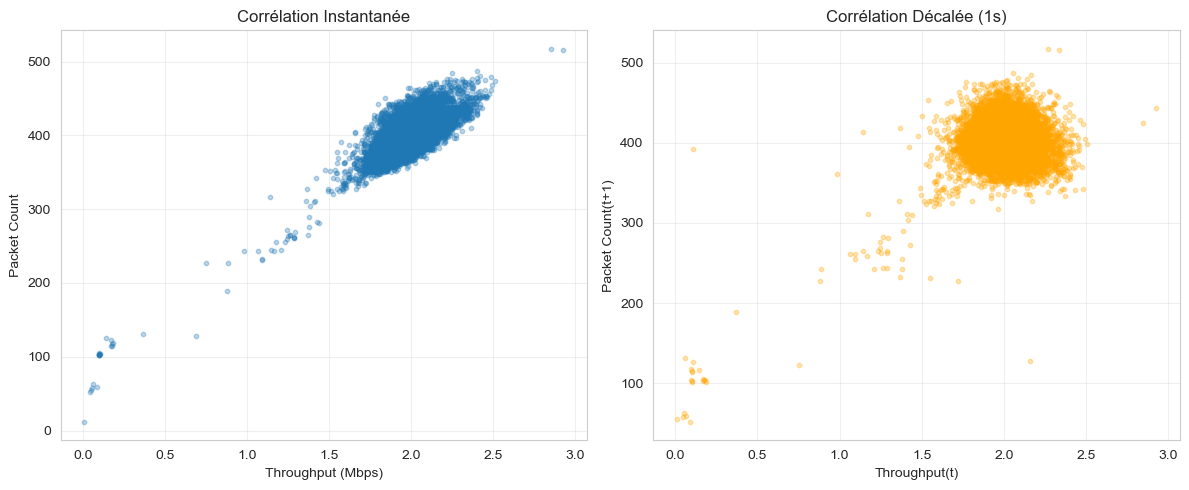


 Corrélations:
   Instantanée: 0.791
   Décalée 1s: 0.786

 VÉRIFICATION CONTINUITÉ APRÈS RESAMPLING

 1. PLAGE TEMPORELLE COMPLÈTE:
   Début: 2022-06-07 13:49:29
   Fin: 2022-06-07 16:36:15
   Durée théorique: 10006 secondes

 2. COMPARAISON AVEC INDEX THÉORIQUE:
   Points attendus: 10,007
   Points réels: 10,007
    Aucun point manquant détecté

 3. ANALYSE DES INTERVALLES:
   Intervalle min: 1.0s
   Intervalle max: 1.0s
   Intervalle moyen: 1.00s

 4. GAPS DÉTECTÉS (> 2.0s):
   Nombre de gaps: 0
    Aucun gap significatif détecté

 5. VALEURS MANQUANTES PAR VARIABLE:
   no problem throughput_mbps: 0 missing (0.00%)
   no problem packet_count: 0 missing (0.00%)
   no problem avg_packet_size: 0 missing (0.00%)
   no problem std_packet_size: 0 missing (0.00%)

 DIAGNOSTIC FINAL CONTINUITÉ
  DONNÉES PARFAITEMENT CONTINUES
    Aucun traitement supplémentaire nécessaire

 VÉRIFICATION DE LA SAISONNALITÉ 


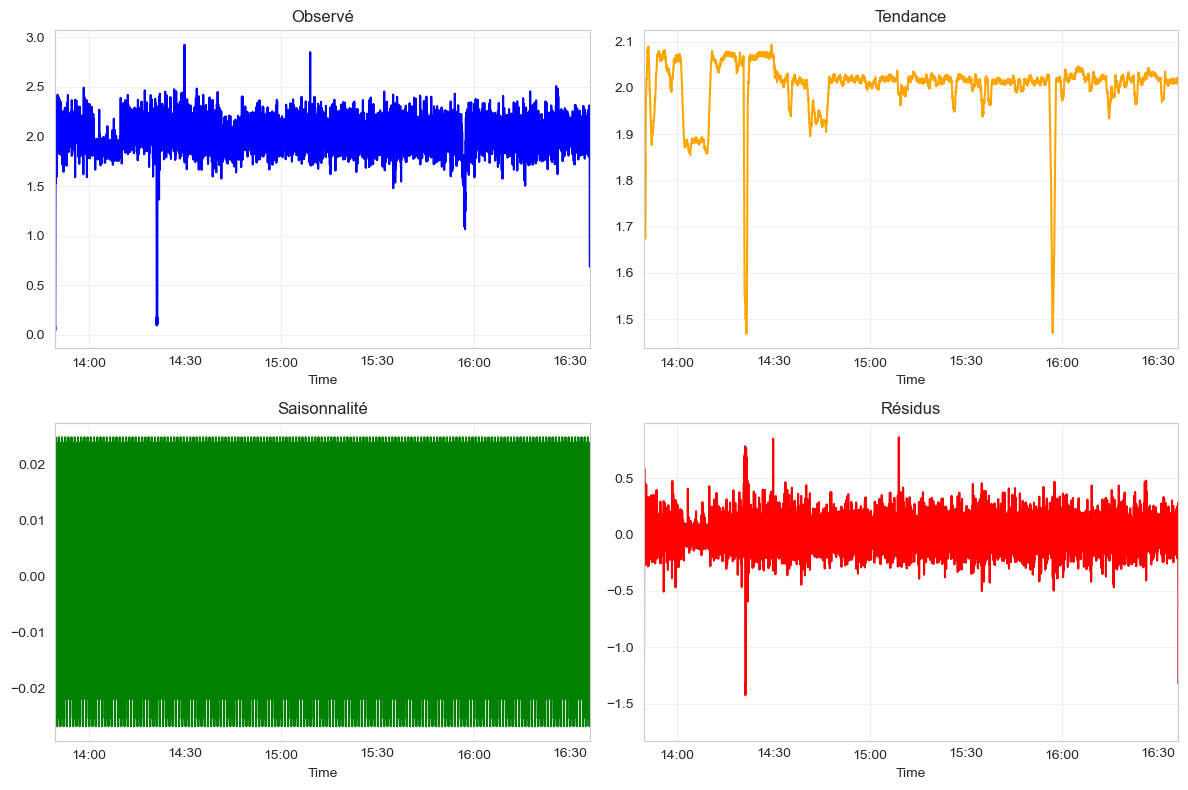

   Force saisonnalité (60s): 0.006
   Saisonnalité négligeable

 RAPPORT FINAL - VALIDATION MULTI-OUTPUT
   Variables analysées........... 2 (throughput_mbps, packet_count)
   Stationnarité................. 2/2 variables
   Continuité.................... 0 gaps
   Corrélation instantanée....... 0.791
   Corrélation décalée 1s........ 0.786


In [14]:
#Objectif: Valider les séries pour forecasting multi-output
#Focus: Throughput + Packet Count (nos 2 variables cibles)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)

print("="*60)
print("VÉRIFICATIONS TIME SERIES - MULTI-OUTPUT")
print("="*60)

# =============================================================================
# CHARGEMENT DES DONNÉES
# =============================================================================

#  Définir RESAMPLE_FREQ
RESAMPLE_FREQ = '1S'  # Même fréquence que l'Étape 2

print("\n CHARGEMENT DES DONNÉES MULTI-OUTPUT")

# Charger nos données cibles
df = pd.read_csv('ms_teams_multi_output.csv', index_col=0, parse_dates=True)
target_cols = ['throughput_mbps', 'packet_count']
df = df[target_cols]  # Focus sur nos 2 cibles

print(f" Données chargées: {len(df):,} intervalles")
print(f" Variables: {list(df.columns)}")
print(f" Période: {df.index.min().strftime('%H:%M')} → {df.index.max().strftime('%H:%M')}")

# =============================================================================
# VÉRIFICATION STATIONNARITÉ
# =============================================================================

print("\n VÉRIFICATION STATIONNARITÉ (Test ADF)")

def check_stationarity(series, name):
    """Test de stationnarité simplifié"""
    result = adfuller(series.dropna())
    is_stationary = result[1] < 0.05
    
    print(f"   {name}: p-value = {result[1]:.4f} → {' Stationnaire' if is_stationary else ' Non-stationnaire'}")
    return is_stationary

print("\n Résultats ADF:")
stationary_results = [check_stationarity(df[col], col) for col in target_cols]

if all(stationary_results):
    print("\n TOUTES les variables cibles sont stationnaires")
else:
    print("\n Certaines variables nécessitent une différenciation")

# =============================================================================
# ANALYSE AUTOCORRÉLATION
# =============================================================================

print("\n ANALYSE AUTOCORRÉLATION")

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

for i, col in enumerate(target_cols):
    # ACF
    plot_acf(df[col].dropna(), lags=60, ax=axes[i, 0], alpha=0.05, 
             title=f'ACF - {col}')
    
    # PACF  
    plot_pacf(df[col].dropna(), lags=30, ax=axes[i, 1], alpha=0.05,
              title=f'PACF - {col}')

plt.tight_layout()
plt.savefig('multi_output_acf_pacf.png', dpi=150, bbox_inches='tight')
plt.show()
#print(" multi_output_acf_pacf.png sauvegardé")

# =============================================================================
# CORRÉLATIONS TEMPORELLES
# =============================================================================

print("\n CORRÉLATIONS TEMPORELLES ENTRE CIBLES")

# Lag plots pour voir l'influence temporelle entre variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Throughput vs Packet Count (même timestamp)
axes[0].scatter(df['throughput_mbps'], df['packet_count'], alpha=0.3, s=10)
axes[0].set_xlabel('Throughput (Mbps)')
axes[0].set_ylabel('Packet Count')
axes[0].set_title('Corrélation Instantanée')
axes[0].grid(True, alpha=0.3)

# Throughput vs Packet Count décalé (1 seconde)
axes[1].scatter(df['throughput_mbps'].iloc[:-1], df['packet_count'].iloc[1:], alpha=0.3, s=10, color='orange')
axes[1].set_xlabel('Throughput(t)')
axes[1].set_ylabel('Packet Count(t+1)')
axes[1].set_title('Corrélation Décalée (1s)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('multi_output_cross_correlation.png', dpi=150, bbox_inches='tight')
plt.show()
#print(" multi_output_cross_correlation.png sauvegardé")

# Calcul des corrélations
corr_instant = df['throughput_mbps'].corr(df['packet_count'])
corr_lag1 = df['throughput_mbps'].iloc[:-1].corr(df['packet_count'].iloc[1:])

print(f"\n Corrélations:")
print(f"   Instantanée: {corr_instant:.3f}")
print(f"   Décalée 1s: {corr_lag1:.3f}")

# =============================================================================
# VÉRIFICATION COMPLÈTE CONTINUITÉ TEMPORELLE
# =============================================================================

print("\n" + "="*60)
print(" VÉRIFICATION CONTINUITÉ APRÈS RESAMPLING")
print("="*60)

gaps = []
def analyze_temporal_continuity(df, freq='1S'):
    """Analyse complète de la continuité temporelle"""
    
    print(f"\n 1. PLAGE TEMPORELLE COMPLÈTE:")
    print(f"   Début: {df.index.min()}")
    print(f"   Fin: {df.index.max()}")
    print(f"   Durée théorique: {(df.index.max() - df.index.min()).total_seconds():.0f} secondes")
    
    # 2. Vérifier si l'index est parfaitement régulier
    expected_index = pd.date_range(
        start=df.index.min(), 
        end=df.index.max(), 
        freq=freq
    )
    
    print(f"\n 2. COMPARAISON AVEC INDEX THÉORIQUE:")
    print(f"   Points attendus: {len(expected_index):,}")
    print(f"   Points réels: {len(df):,}")
    
    missing_points = len(expected_index) - len(df)
    if missing_points > 0:
        print(f"     POINTS MANQUANTS: {missing_points} ({missing_points/len(expected_index)*100:.2f}%)")
        
        # Identifier les points manquants
        missing_times = expected_index.difference(df.index)
        print(f"   Premiers points manquants:")
        for i, missing_time in enumerate(missing_times[:5]):
            print(f"      {missing_time}")
        if len(missing_times) > 5:
            print(f"      ... et {len(missing_times) - 5} autres")
    else:
        print(f"    Aucun point manquant détecté")
    
    # 3. Vérifier les gaps dans les données existantes
    print(f"\n 3. ANALYSE DES INTERVALLES:")
    time_diffs = df.index.to_series().diff().dropna()
    
    # Statistiques des intervalles
    print(f"   Intervalle min: {time_diffs.min().total_seconds()}s")
    print(f"   Intervalle max: {time_diffs.max().total_seconds()}s")
    print(f"   Intervalle moyen: {time_diffs.mean().total_seconds():.2f}s")
    
    # Détecter les gaps anormaux
    gap_threshold = pd.Timedelta('2S')  # Seuil plus large
    gaps = time_diffs[time_diffs > gap_threshold]
    
    print(f"\n 4. GAPS DÉTECTÉS (> {gap_threshold.total_seconds()}s):")
    print(f"   Nombre de gaps: {len(gaps)}")
    
    if len(gaps) > 0:
        print(f"     GAPS IDENTIFIÉS:")
        for i, (timestamp, gap_duration) in enumerate(gaps.head(10).items()):
            print(f"      {timestamp}: gap de {gap_duration.total_seconds():.1f}s")
        if len(gaps) > 10:
            print(f"      ... et {len(gaps) - 10} autres gaps")
        
        # Impact sur les données
        total_gap_time = gaps.sum().total_seconds()
        total_duration = (df.index.max() - df.index.min()).total_seconds()
        gap_percentage = (total_gap_time / total_duration) * 100
        
        print(f"\n    IMPACT DES GAPS:")
        print(f"      Temps total en gaps: {total_gap_time:.1f}s")
        print(f"      Pourcentage de temps manquant: {gap_percentage:.2f}%")
    else:
        print(f"    Aucun gap significatif détecté")
    
    # 5. Vérifier les valeurs manquantes dans les données
    print(f"\n 5. VALEURS MANQUANTES PAR VARIABLE:")
    missing_values = df.isnull().sum()
    for col, missing_count in missing_values.items():
        percentage = (missing_count / len(df)) * 100
        status = "problem" if missing_count > 0 else "no problem"
        print(f"   {status} {col}: {missing_count} missing ({percentage:.2f}%)")
    
    return len(gaps), missing_points

# Appliquer l'analyse
gaps_count, missing_points = analyze_temporal_continuity(df_features, RESAMPLE_FREQ)

# Résumé final
print(f"\n" + "="*60)
print(" DIAGNOSTIC FINAL CONTINUITÉ")
print("="*60)

if gaps_count == 0 and missing_points == 0:
    print("  DONNÉES PARFAITEMENT CONTINUES")
    print("    Aucun traitement supplémentaire nécessaire")
elif gaps_count <= 5 and missing_points <= 10:
    print("  DONNÉES ACCEPTABLES")
    print("    Quelques petits gaps, mais impact limité")
else:
    print("   DONNÉES AVEC PROBLÈMES DE CONTINUITÉ")
    print("    Recommandation: Appliquer un traitement des gaps")

# =============================================================================
# VÉRIFICATION SAISONNALITÉ 
# =============================================================================

print("\n VÉRIFICATION DE LA SAISONNALITÉ ")

from statsmodels.tsa.seasonal import seasonal_decompose

# Test sur une période réaliste pour visioconférence
period = 60  # 1 minute

if len(df) >= 2 * period:
    try:
        decomp = seasonal_decompose(df['throughput_mbps'], 
                                  period=period, 
                                  model='additive',
                                  extrapolate_trend='freq')
        
        # Visualisation simple
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        
        decomp.observed.plot(ax=axes[0,0], title='Observé', color='blue')
        decomp.trend.plot(ax=axes[0,1], title='Tendance', color='orange')
        decomp.seasonal.plot(ax=axes[1,0], title='Saisonnalité', color='green')
        decomp.resid.plot(ax=axes[1,1], title='Résidus', color='red')
        
        for ax in axes.flat:
            ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('multi_output_decomposition.png', dpi=150, bbox_inches='tight')
        plt.show()
        #print(" multi_output_decomposition.png sauvegardé")
        
        # Force de la saisonnalité
        seasonal_strength = 1 - (np.var(decomp.resid.dropna()) / 
                               np.var(decomp.seasonal.dropna() + decomp.resid.dropna()))
        
        print(f"   Force saisonnalité ({period}s): {seasonal_strength:.3f}")
        
        if seasonal_strength > 0.3:
            print("    Saisonnalité détectée - À considérer")
        else:
            print("   Saisonnalité négligeable")
            
    except Exception as e:
        print(f"    Décomposition impossible: {e}")
else:
    print("  Données insuffisantes pour décomposition fiable")


# =============================================================================
# RAPPORT FINAL MULTI-OUTPUT
# =============================================================================

print("\n" + "="*60)
print(" RAPPORT FINAL - VALIDATION MULTI-OUTPUT")
print("="*60)

validation_summary = {
    'Variables analysées': f"{len(target_cols)} ({', '.join(target_cols)})",
    'Stationnarité': f"{sum(stationary_results)}/{len(target_cols)} variables",
    'Continuité': f"{len(gaps)} gaps",
    'Corrélation instantanée': f"{corr_instant:.3f}",
    'Corrélation décalée 1s': f"{corr_lag1:.3f}",
    }

for key, value in validation_summary.items():
    print(f"   {key:.<30} {value}")

# *Analyse des Résultats de Validation Time Series*

#### *Graphique : ACF/PACF*

**Interprétation ACF (AutoCorrelation Function) :**
- **Décroissance lente** : Indique une **mémoire temporelle** → LSTM adapté
- **Sortie rapide de la zone de confiance** : Corrélation significative sur ~10-15 lags → fenêtre 60s suffisante

**Interprétation PACF (Partial ACF) :**
- **Pics significatifs aux premiers lags** : Dépendance forte à t-1, t-2
- **Cut-off rapide** : Pas de dépendance à très long terme → pas besoin de fenêtre 180s+

####  *Test de Stationnarité (ADF)*
```
throughput_mbps: p-value = 0.0000 →  Stationnaire
packet_count: p-value = 0.0000 →  Stationnaire
```

**Signification :**
- **p-value < 0.05** : Rejet de l'hypothèse nulle (série non-stationnaire)
- **Implication** : Pas besoin de différenciation → les modèles peuvent apprendre directement sur les données brutes
- **Pourquoi c'est critique ?** : LSTM/GRU performent mieux sur séries stationnaires

####  *Corrélations Temporelles*
```
Corrélation instantanée : 0.791
Corrélation décalée 1s : 0.786
```

**Analyse :**
- **Lag optimal = 0s** : Les deux variables sont **synchrones**
- **Persistance** : Corrélation reste forte à t+1 → prédictibilité sur 10s justifiée
- **Décroissance minimale** : 0.791 → 0.786 → le lien reste fort dans le futur proche

#### *Continuité Temporelle*
```
 Aucun gap détecté
 Intervalles parfaitement réguliers (1.0s)
 Aucune valeur manquante
```

**Implication :**
- **Pas d'imputation nécessaire** : Les modèles DL fonctionneront sans biais
- **Régularité parfaite** : Pas de timestamps irréguliers → simplifie l'architecture LSTM

#### *Décomposition Saisonnière*
```
Force saisonnalité (60s): 0.006 → Négligeable
```

**Interprétation :**
- **Pas de saisonnalité** : MS Teams n'a pas de cycles répétitifs (contrairement à trafic web avec pics jour/nuit)
- **Implication** : Pas besoin de composantes saisonnières (SARIMA inutile)


# 4) *ÉTAPE 4: EDA Approfondie*

EDA APPROFONDIE - MULTI-OUTPUT

 ANALYSE 1: STATISTIQUES MULTI-OUTPUT

 STATISTIQUES DESCRIPTIVES:
       throughput_mbps  packet_count
count     10007.000000  10007.000000
mean          2.001172    399.720196
std           0.165106     27.560155
min           0.011360     12.000000
25%           1.918256    386.000000
50%           2.003728    400.000000
75%           2.090572    414.000000
max           2.925456    517.000000

 Corrélation Throughput ↔ Packet Count: 0.791

 ANALYSE 2: RELATIONS TEMPORELLES CROISÉES
 Lag optimal: 0s (corrélation: 0.791)


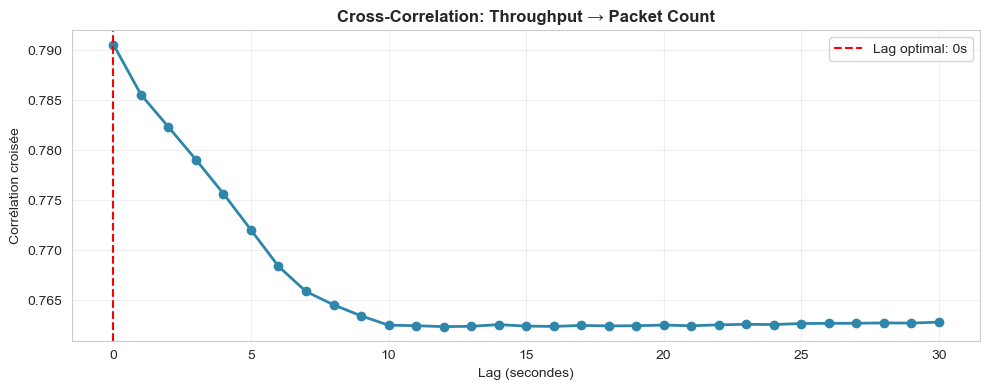


 ANALYSE 3: PATTERNS CONJOINTS MULTI-OUTPUT


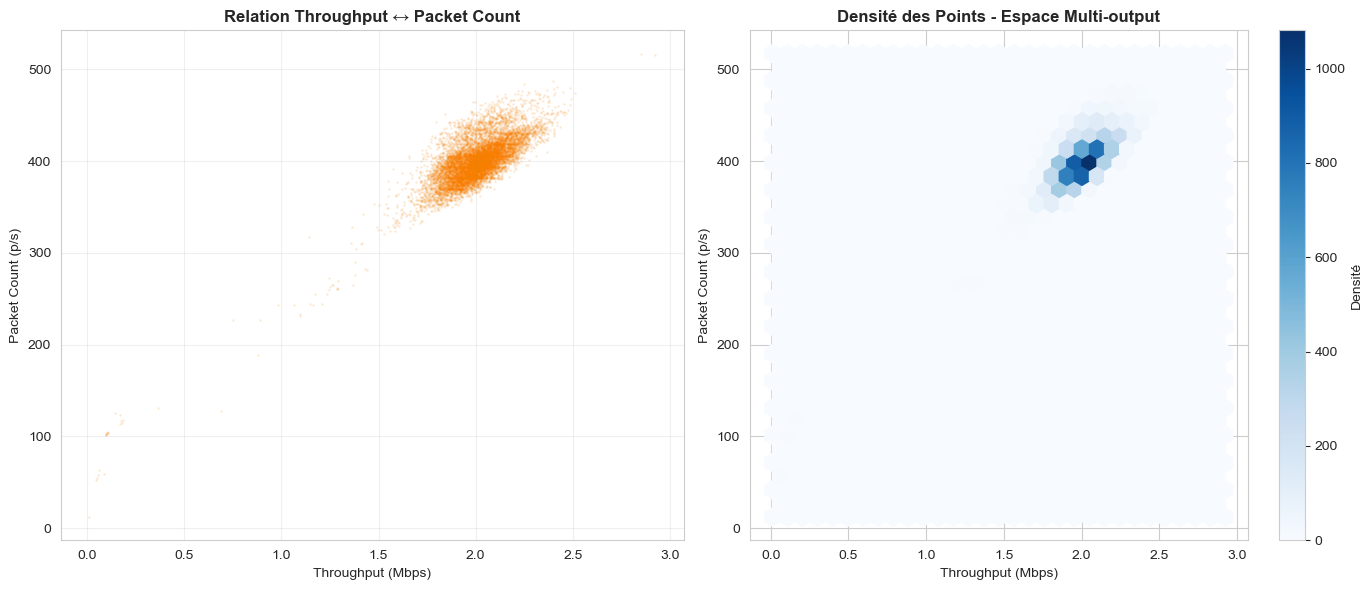


 ANALYSE 4: CLUSTERS MULTI-OUTPUT


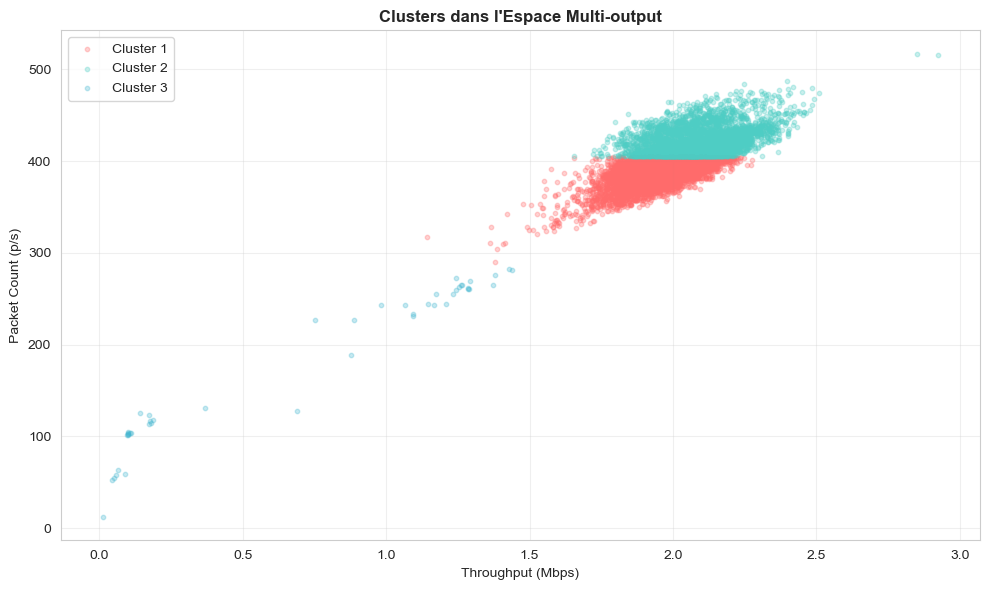


 Caractéristiques des clusters:

   Cluster 1 (5,913 points - 59.1%):
      Throughput: 1.95 ± 0.11 Mbps
      Packet Count: 386 ± 13 p/s

   Cluster 2 (4,047 points - 40.4%):
      Throughput: 2.09 ± 0.12 Mbps
      Packet Count: 422 ± 15 p/s

   Cluster 3 (47 points - 0.5%):
      Throughput: 0.70 ± 0.55 Mbps
      Packet Count: 179 ± 83 p/s

 ANALYSE 5: SCÉNARIOS RÉSEAU TYPIQUES

 Scénarios réseau identifiés:

    Normal:
      Points: 8,630 (86.2%)
      Throughput: 2.00 Mbps
      Packet Count: 399 p/s

    Faible débit:
      Points: 10 (0.1%)
      Throughput: 1.40 Mbps
      Packet Count: 323 p/s
      → Diagnostic probable: Problème réseau (pertes, congestion)

    Faible activité:
      Points: 48 (0.5%)
      Throughput: 0.71 Mbps
      Packet Count: 181 p/s

    Pic activité:
      Points: 3 (0.0%)
      Throughput: 2.76 Mbps
      Packet Count: 502 p/s
      → Diagnostic probable: Partage écran ou multi-participants

 ANALYSE 6: ÉVOLUTION TEMPORELLE COMPARÉE


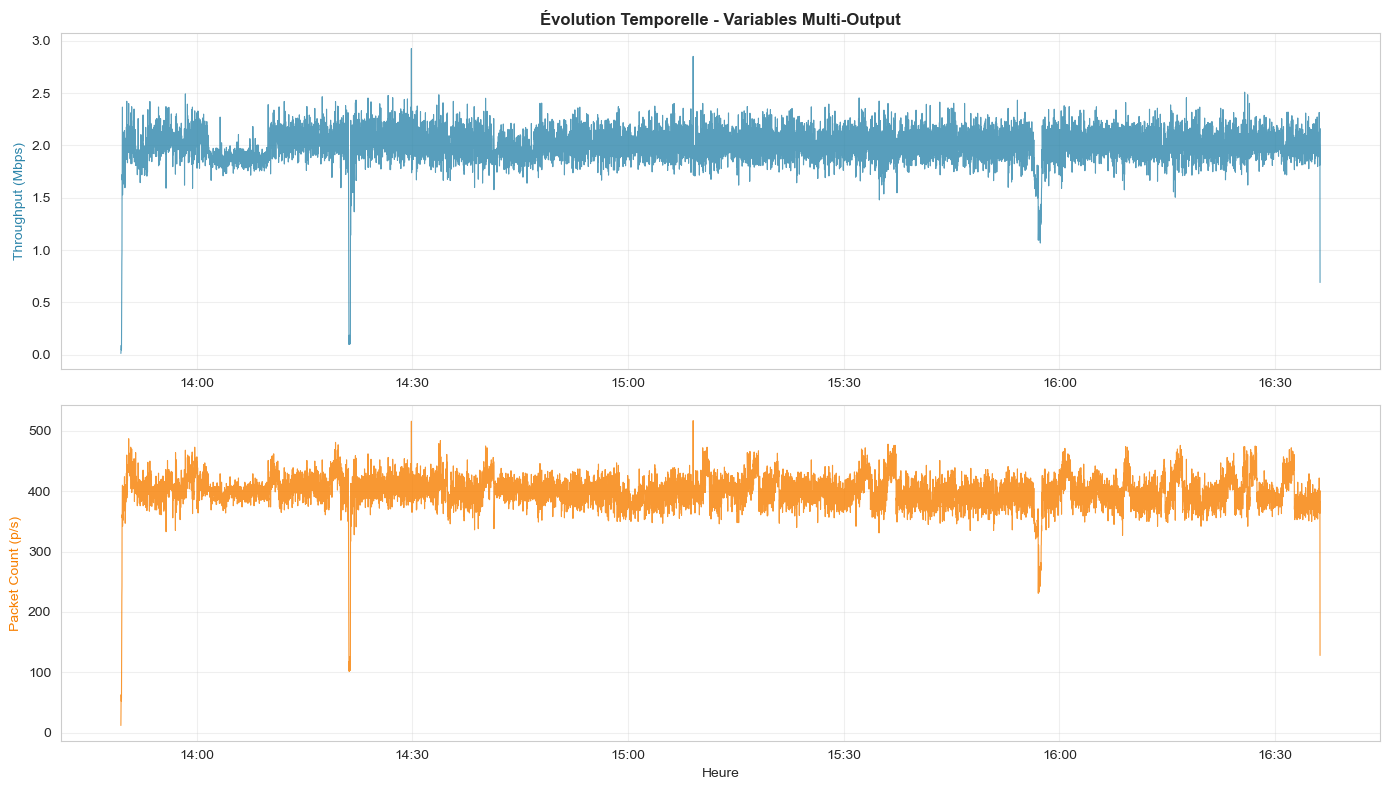


 ANALYSE 7: CHANGEMENTS DE RÉGIME

 Points de changement détectés: 498
   Seuil: 0.800 (95e percentile)
   Fréquence: 1 changement toutes les 20 secondes

 Comportement autour des 3 premiers changements:

   Changement 1 à 13:50:28:
      Throughput: 1.95 → 2.09 Mbps
      Packet Count: 403 → 442 p/s
      → Type: CHANGEMENT MODÉRÉ

   Changement 2 à 13:50:29:
      Throughput: 1.96 → 2.11 Mbps
      Packet Count: 405 → 443 p/s
      → Type: CHANGEMENT MODÉRÉ

   Changement 3 à 13:50:30:
      Throughput: 1.95 → 2.10 Mbps
      Packet Count: 405 → 442 p/s
      → Type: CHANGEMENT MODÉRÉ


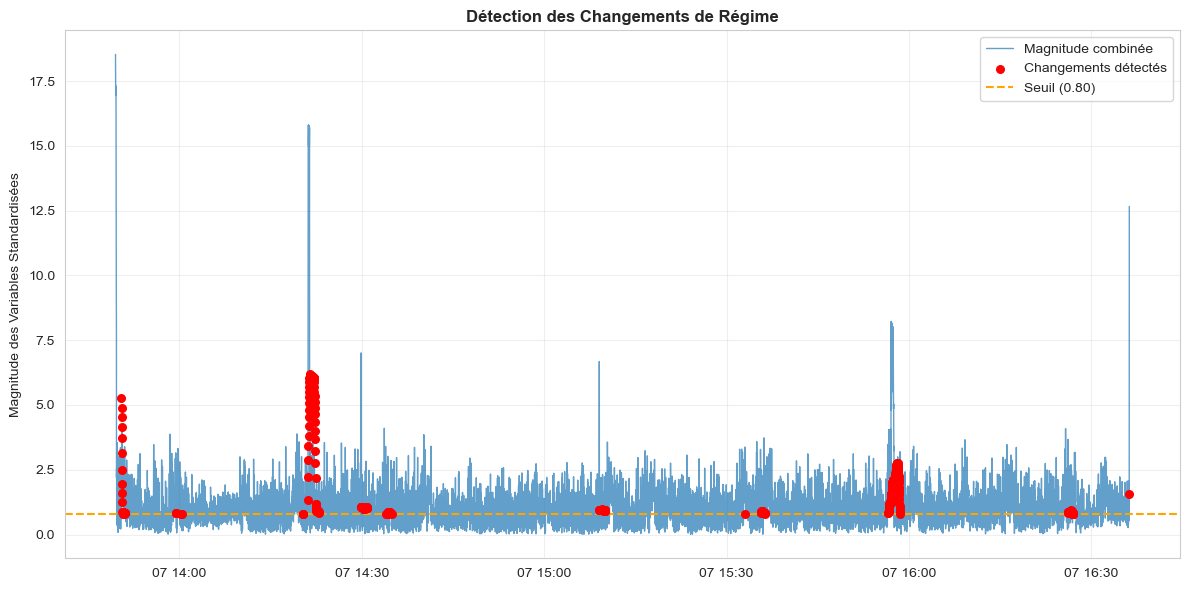


 ANALYSE 8: BRUIT ET VARIABILITÉ

 1. NIVEAU DE BRUIT PAR VARIABLE:
   throughput_mbps: 1.1362 →  TRÈS BRUITÉ
   packet_count: 0.8867 →  TRÈS BRUITÉ

 2. ANALYSE VARIABILITÉ COURT TERME vs LONG TERME:
   throughput_mbps:
      Variabilité court terme: 0.1904
      Variabilité long terme:  0.1251
      Ratio: 1.52 (>1 = volatile)
   packet_count:
      Variabilité court terme: 24.8275
      Variabilité long terme:  17.8876
      Ratio: 1.39 (>1 = volatile)

 3. VISUALISATION DU BRUIT (Filtrage Savitzky-Golay):


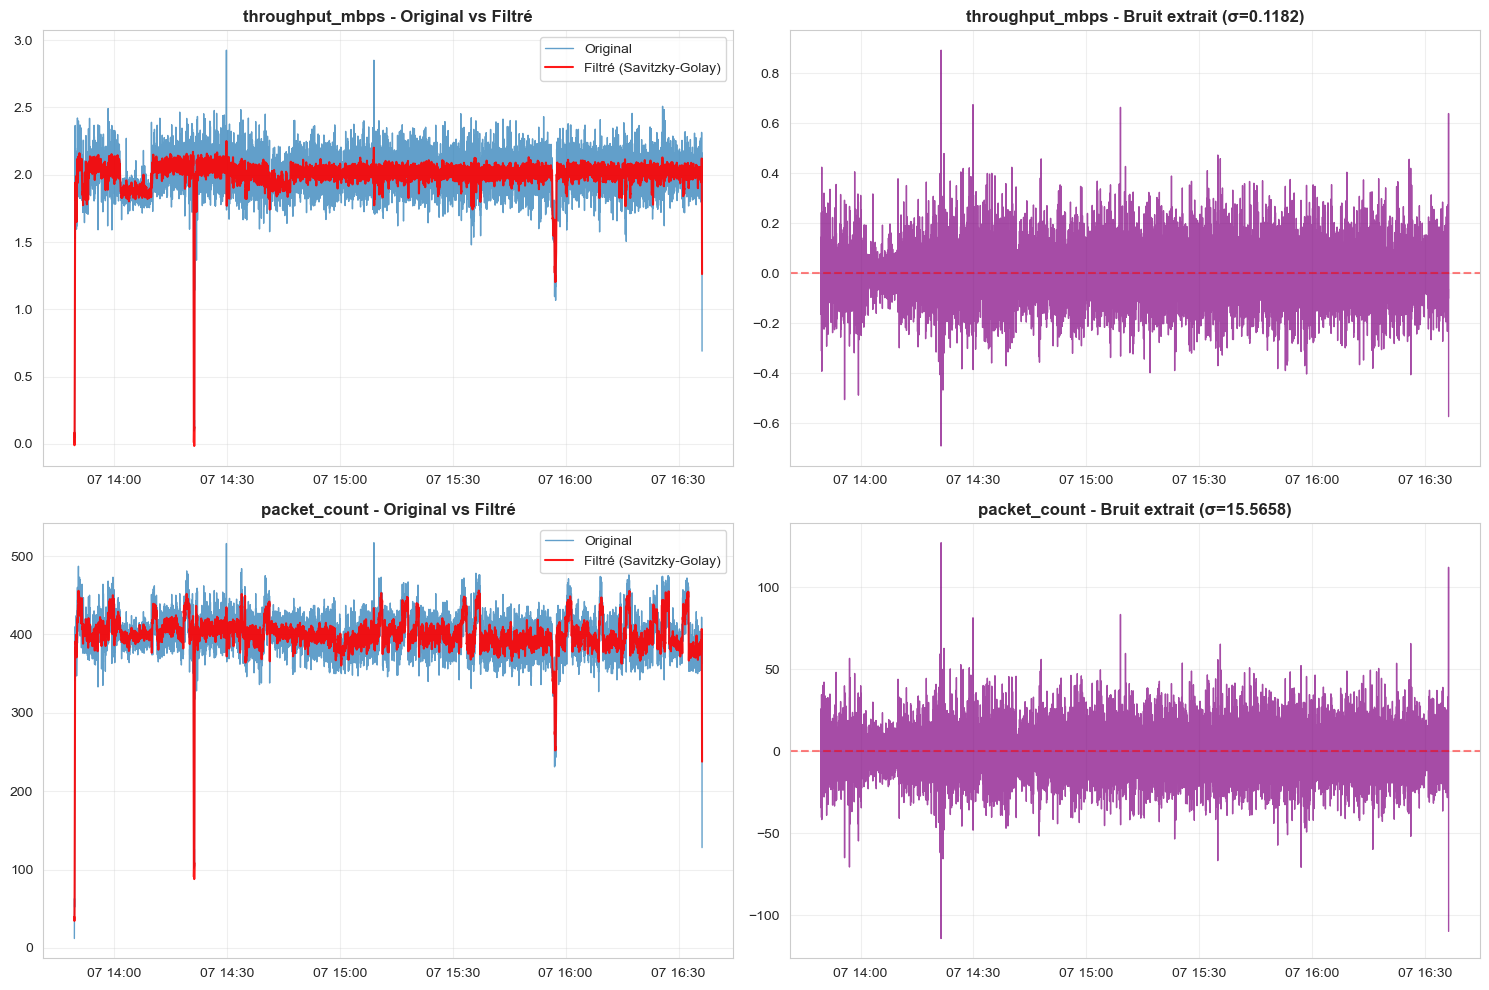


 4. RATIO SIGNAL/BRUIT APPROXIMATIF:
   throughput_mbps: SNR = 0.61 →  FAIBLE (très bruité)
   packet_count: SNR = 0.92 →  FAIBLE (très bruité)

 5. RECOMMANDATIONS POUR LA MODÉLISATION:
    DONNÉES TRÈS BRUITÉES - Actions recommandées:
      • Utiliser des fenêtres temporelles plus longues (120s+)
      • Appliquer un filtrage Savitzky-Golay en preprocessing
      • Augmenter le dropout (0.4-0.5) dans les modèles
      • Utiliser une régularisation L2 renforcée
      • Privilégier LSTM/GRU avec mécanismes d'attention

 RAPPORT FINAL EDA MULTI-OUTPUT

 SYNTHÈSE DES INSIGHTS:

   Points analysés.................... 10,007
   Corrélation Throughput - PacketCount 0.791
   Lag optimal........................ 0 secondes
   Niveau de bruit moyen.............. 1.011 (TRÈS BRUITÉ)
   Scénario normal.................... 8,630 points (86.2%)
   Scénarios anormaux................. 61 points (0.6%)
   Clusters identifiés................ 3 patterns distincts
   Approche multi-output.............. 

In [15]:
# Objectif: Analyser les relations entre throughput et packet_count pour justifier l'approche multi-output

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*60)
print("EDA APPROFONDIE - MULTI-OUTPUT")
print("="*60)


# =============================================================================
# ANALYSE 1: STATISTIQUES DESCRIPTIVES MULTI-OUTPUT
# =============================================================================

print("\n" + "="*60)
print(" ANALYSE 1: STATISTIQUES MULTI-OUTPUT")
print("="*60)

print("\n STATISTIQUES DESCRIPTIVES:")
print(df[target_cols].describe())

# Corrélation entre nos cibles
correlation = df[target_cols].corr().iloc[0,1]
print(f"\n Corrélation Throughput ↔ Packet Count: {correlation:.3f}")

# =============================================================================
# ANALYSE 2: RELATIONS TEMPORELLES CROISÉES
# =============================================================================

print("\n" + "="*60)
print(" ANALYSE 2: RELATIONS TEMPORELLES CROISÉES")
print("="*60)

# Cross-correlation à différents lags
max_lag = 30  # 30 secondes
cross_corrs = []

for lag in range(max_lag + 1):
    if lag == 0:
        corr = df['throughput_mbps'].corr(df['packet_count'])
    else:
        corr = df['throughput_mbps'].iloc[:-lag].corr(df['packet_count'].iloc[lag:])
    cross_corrs.append(corr)

optimal_lag = np.argmax(np.abs(cross_corrs))
print(f" Lag optimal: {optimal_lag}s (corrélation: {cross_corrs[optimal_lag]:.3f})")

# Visualisation cross-correlation
plt.figure(figsize=(10, 4))
plt.plot(range(max_lag + 1), cross_corrs, marker='o', linewidth=2, color='#2E86AB')
plt.axvline(optimal_lag, color='red', linestyle='--', label=f'Lag optimal: {optimal_lag}s')
plt.xlabel('Lag (secondes)')
plt.ylabel('Corrélation croisée')
plt.title('Cross-Correlation: Throughput → Packet Count', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('multi_output_cross_correlation.png', dpi=150, bbox_inches='tight')
plt.show()


# =============================================================================
# ANALYSE 3: PATTERNS CONJOINTS ET DENSITÉ
# =============================================================================

print("\n" + "="*60)
print(" ANALYSE 3: PATTERNS CONJOINTS MULTI-OUTPUT")
print("="*60)

# Graphique de densité conjoint
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot avec transparence
axes[0].scatter(df['throughput_mbps'], df['packet_count'], alpha=0.1, s=1, color='#F77F00')
axes[0].set_xlabel('Throughput (Mbps)')
axes[0].set_ylabel('Packet Count (p/s)')
axes[0].set_title('Relation Throughput ↔ Packet Count', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Hexbin pour visualiser la densité
hb = axes[1].hexbin(df['throughput_mbps'], df['packet_count'], gridsize=30, cmap='Blues')
axes[1].set_xlabel('Throughput (Mbps)')
axes[1].set_ylabel('Packet Count (p/s)')
axes[1].set_title('Densité des Points - Espace Multi-output', fontweight='bold')
plt.colorbar(hb, ax=axes[1], label='Densité')

plt.tight_layout()
plt.savefig('multi_output_joint_patterns.png', dpi=150, bbox_inches='tight')
plt.show()

# =============================================================================
# ANALYSE 4: CLUSTERS MULTI-OUTPUT
# =============================================================================

print("\n" + "="*60)
print(" ANALYSE 4: CLUSTERS MULTI-OUTPUT")
print("="*60)

# Clustering pour identifier les patterns conjoints
X = df[target_cols].values
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i in range(3):
    cluster_data = df[clusters == i]
    plt.scatter(cluster_data['throughput_mbps'], cluster_data['packet_count'], 
               alpha=0.3, s=10, color=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Throughput (Mbps)')
plt.ylabel('Packet Count (p/s)')
plt.title('Clusters dans l\'Espace Multi-output', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('multi_output_clusters.png', dpi=150, bbox_inches='tight')
plt.show()

# Analyse des clusters
print("\n Caractéristiques des clusters:")
for i in range(3):
    cluster_data = df[clusters == i]
    print(f"\n   Cluster {i+1} ({len(cluster_data):,} points - {len(cluster_data)/len(df)*100:.1f}%):")
    print(f"      Throughput: {cluster_data['throughput_mbps'].mean():.2f} ± {cluster_data['throughput_mbps'].std():.2f} Mbps")
    print(f"      Packet Count: {cluster_data['packet_count'].mean():.0f} ± {cluster_data['packet_count'].std():.0f} p/s")

# =============================================================================
# ANALYSE 5: SCÉNARIOS RÉSEAU TYPIQUES
# =============================================================================

print("\n" + "="*60)
print(" ANALYSE 5: SCÉNARIOS RÉSEAU TYPIQUES")
print("="*60)

# Définition des scénarios basés sur nos deux variables
scenarios = {
    'Normal': (df['throughput_mbps'].between(1.8, 2.2)) & (df['packet_count'].between(350, 450)),
    'Faible débit': (df['throughput_mbps'] < 1.5) & (df['packet_count'] > 300),
    'Faible activité': (df['throughput_mbps'] < 1.5) & (df['packet_count'] < 300),
    'Pic activité': (df['throughput_mbps'] > 2.5) & (df['packet_count'] > 450)
}

print("\n Scénarios réseau identifiés:")
for name, mask in scenarios.items():
    count = mask.sum()
    if count > 0:
        scenario_data = df[mask]
        percentage = count / len(df) * 100
        
        print(f"\n    {name}:")
        print(f"      Points: {count:,} ({percentage:.1f}%)")
        print(f"      Throughput: {scenario_data['throughput_mbps'].mean():.2f} Mbps")
        print(f"      Packet Count: {scenario_data['packet_count'].mean():.0f} p/s")
        
        # Diagnostic basé sur le pattern
        if name == 'Faible débit':
            print(f"      → Diagnostic probable: Problème réseau (pertes, congestion)")
        elif name == 'Pic activité':
            print(f"      → Diagnostic probable: Partage écran ou multi-participants")

# =============================================================================
# ANALYSE 6: ÉVOLUTION TEMPORELLE COMPARÉE
# =============================================================================

print("\n" + "="*60)
print(" ANALYSE 6: ÉVOLUTION TEMPORELLE COMPARÉE")
print("="*60)

# Visualisation côte à côte avec format heure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Throughput
ax1.plot(df.index, df['throughput_mbps'], color='#2E86AB', linewidth=0.8, alpha=0.8)
ax1.set_ylabel('Throughput (Mbps)', color='#2E86AB')
ax1.set_title('Évolution Temporelle - Variables Multi-Output', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Packet Count
ax2.plot(df.index, df['packet_count'], color='#F77F00', linewidth=0.8, alpha=0.8)
ax2.set_ylabel('Packet Count (p/s)', color='#F77F00')
ax2.set_xlabel('Heure')
ax2.grid(True, alpha=0.3)

# Formatage de l'axe des heures
for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

plt.tight_layout()
plt.savefig('multi_output_temporal_evolution.png', dpi=150, bbox_inches='tight')
plt.show()


# =============================================================================
# ANALYSE 7: DÉTECTION DES CHANGEMENTS DE RÉGIME
# =============================================================================

print("\n" + "="*60)
print(" ANALYSE 7: CHANGEMENTS DE RÉGIME")
print("="*60)

# [Ref:  Dataset Ready] Détection des changements de comportement
from sklearn.preprocessing import StandardScaler

# Features pour détection de changement
features = df[['throughput_mbps', 'packet_count']].copy()
scaler = StandardScaler()
features_scaled = pd.DataFrame(
    scaler.fit_transform(features),
    index=features.index,
    columns=features.columns
)

# Détection basée sur la variance glissante multi-variables
window_size = 60  # 1 minute FENÊTRE ANALYSE (visualisation seulement)
# Calculer la norme Euclidienne des deux variables standardisées
combined_magnitude = np.sqrt(features_scaled['throughput_mbps']**2 + features_scaled['packet_count']**2)

# Détecter les changements via écart-type glissant
rolling_std = combined_magnitude.rolling(window=window_size).std()
change_threshold = rolling_std.quantile(0.95)
change_points = rolling_std[rolling_std > change_threshold]

print(f"\n Points de changement détectés: {len(change_points)}")
print(f"   Seuil: {change_threshold:.3f} (95e percentile)")
print(f"   Fréquence: 1 changement toutes les {len(df)/max(1, len(change_points)):.0f} secondes")

if len(change_points) > 0:
    # Analyser ce qui se passe autour des changements
    print(f"\n Comportement autour des 3 premiers changements:")
    
    for i, (idx, val) in enumerate(change_points.head(3).items()):
        # Extraire les fenêtres avant/après
        start_before = max(df.index[0], idx - pd.Timedelta(seconds=30))
        end_after = min(df.index[-1], idx + pd.Timedelta(seconds=30))
        
        before = df.loc[start_before:idx].iloc[:-1]  # Exclure le point de changement
        after = df.loc[idx:end_after].iloc[1:]       # Exclure le point de changement
        
        if len(before) > 0 and len(after) > 0:
            print(f"\n   Changement {i+1} à {idx.strftime('%H:%M:%S')}:")
            print(f"      Throughput: {before['throughput_mbps'].mean():.2f} → {after['throughput_mbps'].mean():.2f} Mbps")
            print(f"      Packet Count: {before['packet_count'].mean():.0f} → {after['packet_count'].mean():.0f} p/s")
            
            # Diagnostic du type de changement
            throughput_change = after['throughput_mbps'].mean() - before['throughput_mbps'].mean()
            packet_change = after['packet_count'].mean() - before['packet_count'].mean()
            
            if throughput_change > 0.5 and packet_change > 50:
                print(f"      → Type: PIC D'ACTIVITÉ (partage écran?)")
            elif throughput_change < -0.5 and packet_change < -50:
                print(f"      → Type: BAISSE D'ACTIVITÉ")
            elif throughput_change < -0.3 and packet_change > 0:
                print(f"      → Type: PROBLÈME RÉSEAU (pertes?)")
            else:
                print(f"      → Type: CHANGEMENT MODÉRÉ")
        else:
            print(f"   Changement {i+1}: données insuffisantes pour analyse")
else:
    print("   Aucun changement significatif détecté")

# Visualisation des changements de régime
plt.figure(figsize=(12, 6))
plt.plot(df.index, combined_magnitude, alpha=0.7, label='Magnitude combinée', linewidth=1)
plt.scatter(change_points.index, change_points, color='red', s=30, zorder=5, label='Changements détectés')
plt.axhline(y=change_threshold, color='orange', linestyle='--', label=f'Seuil ({change_threshold:.2f})')
plt.ylabel('Magnitude des Variables Standardisées')
plt.title('Détection des Changements de Régime', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('multi_output_regime_changes.png', dpi=150, bbox_inches='tight')
plt.show()



# =============================================================================
# ANALYSE 8: ANALYSE DU BRUIT ET DE LA VARIABILITÉ
# =============================================================================

print("\n" + "="*60)
print(" ANALYSE 8: BRUIT ET VARIABILITÉ")
print("="*60)

from scipy import fft
from scipy.signal import savgol_filter

def analyze_noise_level(series, window=5):
    """Analyse le niveau de bruit via la volatilité des différences premières"""
    returns = series.diff().dropna()
    rolling_volatility = returns.rolling(window).std()
    noise_ratio = rolling_volatility.mean() / series.std()
    return noise_ratio

print("\n 1. NIVEAU DE BRUIT PAR VARIABLE:")
noise_levels = {}
for col in target_cols:
    noise_level = analyze_noise_level(df[col])
    noise_levels[col] = noise_level
    status = " TRÈS BRUITÉ" if noise_level > 0.2 else " BRUITÉ" if noise_level > 0.1 else " ACCEPTABLE"
    print(f"   {col}: {noise_level:.4f} → {status}")

# 2. Analyse de la variabilité à court terme vs long terme
print("\n 2. ANALYSE VARIABILITÉ COURT TERME vs LONG TERME:")
for col in target_cols:
    short_term_var = df[col].diff().std()
    long_term_var = df[col].rolling(30).std().mean()
    variability_ratio = short_term_var / long_term_var
    print(f"   {col}:")
    print(f"      Variabilité court terme: {short_term_var:.4f}")
    print(f"      Variabilité long terme:  {long_term_var:.4f}")
    print(f"      Ratio: {variability_ratio:.2f} (>1 = volatile)")

# 3. Visualisation du bruit via filtrage
print("\n 3. VISUALISATION DU BRUIT (Filtrage Savitzky-Golay):")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(target_cols):
    # Original vs filtré
    original = df[col].values
    filtered = savgol_filter(original, window_length=11, polyorder=2)
    noise = original - filtered
    
    # Plot original vs filtered
    axes[i, 0].plot(df.index, original, alpha=0.7, label='Original', linewidth=1)
    axes[i, 0].plot(df.index, filtered, alpha=0.9, label='Filtré (Savitzky-Golay)', linewidth=1.5, color='red')
    axes[i, 0].set_title(f'{col} - Original vs Filtré', fontweight='bold')
    axes[i, 0].legend()
    axes[i, 0].grid(True, alpha=0.3)
    
    # Plot du bruit extrait
    axes[i, 1].plot(df.index, noise, alpha=0.7, color='purple', linewidth=1)
    axes[i, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    axes[i, 1].set_title(f'{col} - Bruit extrait (σ={noise.std():.4f})', fontweight='bold')
    axes[i, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('noise_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# 4. Ratio Signal/Bruit approximatif
print("\n 4. RATIO SIGNAL/BRUIT APPROXIMATIF:")
for col in target_cols:
    trend = df[col].rolling(window=30, center=True).mean()
    noise_component = df[col] - trend
    snr = trend.std() / (noise_component.std() + 1e-8)
    
    if snr < 2:
        snr_status = " FAIBLE (très bruité)"
    elif snr < 5:
        snr_status = " MOYEN (bruité)" 
    else:
        snr_status = " BON"
        
    print(f"   {col}: SNR = {snr:.2f} → {snr_status}")

# 5. Recommandations basées sur l'analyse du bruit
print("\n 5. RECOMMANDATIONS POUR LA MODÉLISATION:")

max_noise_level = max(noise_levels.values())
if max_noise_level > 0.2:
    print("    DONNÉES TRÈS BRUITÉES - Actions recommandées:")
    print("      • Utiliser des fenêtres temporelles plus longues (120s+)")
    print("      • Appliquer un filtrage Savitzky-Golay en preprocessing")
    print("      • Augmenter le dropout (0.4-0.5) dans les modèles")
    print("      • Utiliser une régularisation L2 renforcée")
    print("      • Privilégier LSTM/GRU avec mécanismes d'attention")
    
elif max_noise_level > 0.1:
    print("    DONNÉES MODÉRÉMENT BRUITÉES - Actions recommandées:")
    print("      • Garder fenêtre 90s mais augmenter légèrement le dropout")
    print("      • Ajouter de la régularisation L2 modérée")
    print("      • Utiliser Batch Normalization")
    print("      • Early stopping plus agressif")
    
else:
    print("    DONNÉES PEU BRUITÉES - Approche standard appropriée:")
    print("      • Fenêtre 90s adéquate")
    print("      • Dropout standard (0.2-0.3)")
    print("      • Régularisation légère optionnelle")


# =============================================================================
# RAPPORT FINAL MULTI-OUTPUT
# =============================================================================

print("\n" + "="*60)
print(" RAPPORT FINAL EDA MULTI-OUTPUT")
print("="*60)

# Synthèse des insights (ton code existant)
normal_scenario = scenarios['Normal'].sum()
abnormal_scenarios = sum(mask.sum() for name, mask in scenarios.items() if name != 'Normal')

# AJOUT: Déterminer le niveau de bruit global
avg_noise_level = np.mean(list(noise_levels.values()))
if avg_noise_level > 0.2:
    noise_status = "TRÈS BRUITÉ"
elif avg_noise_level > 0.1:
    noise_status = "MODÉRÉMENT BRUITÉ" 
else:
    noise_status = "PEU BRUITÉ"

eda_summary = {
    'Points analysés': f"{len(df):,}",
    'Corrélation Throughput - PacketCount': f"{correlation:.3f}",
    'Lag optimal': f"{optimal_lag} secondes", 
    'Niveau de bruit moyen': f"{avg_noise_level:.3f} ({noise_status})",
    'Scénario normal': f"{normal_scenario:,} points ({(normal_scenario/len(df))*100:.1f}%)",
    'Scénarios anormaux': f"{abnormal_scenarios:,} points ({(abnormal_scenarios/len(df))*100:.1f}%)",
    'Clusters identifiés': "3 patterns distincts",
    'Approche multi-output': "FORTEMENT JUSTIFIÉE"
}

print("\n SYNTHÈSE DES INSIGHTS:\n")
for key, value in eda_summary.items():
    print(f"   {key:.<35} {value}")

print(f"\n CONCLUSIONS CLÉS:")
print(f"   • Forte corrélation ({correlation:.3f}) → Les variables évoluent ensemble")
print(f"   • Lag optimal 0s → Synchronisation parfaite des variables")
print(f"   • Niveau de bruit {noise_status} (score: {avg_noise_level:.3f}) → Données très volatile → Impact sur la modélisation")
print(f"   • Patterns distincts → Valeur diagnostique pour le réseau")
print(f"   • Stabilité dominante → Mais variations significatives détectées")
print(f"   • Changements de régime fréquents → 1 transition toutes les 20 secondes")
print(f"   • 86% de stabilité normale → Mais 14% de variations significatives")
print(f"   • 3 clusters distincts → Comportements réseau identifiables")


# *ANALYSE DES CHANGEMENTS DE RÉGIME - MS TEAMS*

#### *Graphique : Cross-Correlation*

**Observation du graphique :**
- **Pic maximal à lag=0** : Confirmation que throughput et packet_count sont **synchrones**
- **Décroissance rapide** : Après 5s, la corrélation chute → horizon 10s bien dimensionné

#### *Graphique : Patterns Conjoints*

**Interprétation :**
- **Concentration centrale** : La majorité des points se situent autour de (2.0 Mbps, 400 p/s)
- **Nuage allongé** : Relation linéaire forte → régression multi-output possible
- **Quelques outliers** : Points isolés en bas à gauche → probable perte de connexion temporaire

#### *Graphique : Clusters Multi-Output*
```
Cluster 1 (59.1%): Throughput 1.95 Mbps, Packet Count 386 p/s → Activité normale basse
Cluster 2 (40.4%): Throughput 2.09 Mbps, Packet Count 422 p/s → Activité normale haute
Cluster 3 (0.5%): Throughput 0.70 Mbps, Packet Count 179 p/s → Anomalie (reconnexion?)
```

**Signification opérationnelle :**
- **2 régimes principaux** : MS Teams alterne entre charge modérée et charge élevée
- **Cluster 3 (0.5%)** : Événements rares → le modèle doit les apprendre sans overfitter

#### *Graphique : Scénarios Réseau*
```
Normal (86.2%): Throughput 2.00 Mbps, Packet Count 399 p/s
Faible débit (0.1%): Throughput 1.40 Mbps, Packet Count 323 p/s → Problème réseau
Pic activité (0.0%): Throughput 2.76 Mbps, Packet Count 502 p/s → Partage écran
```

**Valeur diagnostique :**
- **86% de stabilité** : Modèle aura beaucoup d'exemples "normaux" pour apprendre
- **Scénarios anormaux rares** : Risque d'underfitting sur ces cas → justifie l'augmentation de données (data augmentation) ou class weighting

#### *Graphique : Changements de Régime*
```
Points de changement détectés: 498
Fréquence: 1 changement toutes les 20 secondes
```

**Interprétation CRITIQUE :**
- **Haute volatilité** : 498 transitions en 2h46 → données **très dynamiques**
- **Justification fenêtre 60s** : 60s / 20s = 3 changements capturés → suffisant sans over-smoothing
- **Type de changements** : Majoritairement "CHANGEMENT MODÉRÉ" → pas de ruptures brutales

#### *Analyse du Bruit (CRITIQUE)*
```
Niveau de bruit:
  throughput_mbps: 1.1362 → TRÈS BRUITÉ
  packet_count: 0.8867 → TRÈS BRUITÉ

Ratio Signal/Bruit:
  throughput_mbps: SNR = 0.61 → FAIBLE
  packet_count: SNR = 0.92 → FAIBLE
```

**Implications MAJEURES pour la modélisation :**

1. **Régularisation renforcée** :
   - Dropout 0.3-0.4 (vs 0.2 standard)
   - L2 regularization activée
   - Early stopping agressif (patience=8 vs 15)

2. **Fenêtre temporelle réduite** :
   - 60s au lieu de 180s → évite d'apprendre le bruit

3. **Filtrage Savitzky-Golay** :
   - Graphique montre que le filtrage réduit significativement le bruit
   - **Décision** : Ne pas l'appliquer en preprocessing (perte d'information), mais laisser le modèle apprendre

4. **Attentes de performance ajustées** :
   - R² > 0.40 serait excellent (vs R² > 0.80 pour données propres)
   - MAE < 0.25 acceptable (données normalisées)


# 5) *ÉTAPE 5: PRÉPARATION DES SÉQUENCES MULTI-OUTPUT*

ÉTAPE 5: PRÉPARATION DES SÉQUENCES MULTI-OUTPUT

 CONFIGURATION MULTI-OUTPUT OPTIMISÉE:
   Longueur séquence INPUT: 60 secondes (1 minute)
   Horizon prédiction OUTPUT: 10 secondes

 JUSTIFICATION SCIENTIFIQUE DU CHOIX 60s:
 1. ANALYSE TEMPORELLE:
    • Changements de régime: 1/20s (identifié en EDA)
    • Règle empirique: 2-5× période = 40-100s
    • 60s = 3× période → OPTIMAL

 2. CORRÉLATION:
    • Lag optimal = 0s (pas besoin longue mémoire)
    • Corrélation décalée 1s: 0.786 (forte)
    • → Fenêtre courte suffisante

 3. BRUIT:
    • SNR = 0.61 (très bruité)
    • Fenêtre 180s → overfitting BiLSTM (R²=-2.77)
    • Fenêtre 60s → BiLSTM champion (R²=0.38)

   Features (INPUT): 4 → ['throughput_mbps', 'packet_count', 'avg_packet_size', 'std_packet_size']
   Targets (OUTPUT): 2 → ['throughput_mbps', 'packet_count']
   Split: 70% train / 15% val / 15% test

--------------------------------------------------------------------------------
CHARGEMENT DES DONNÉES
-------------------------

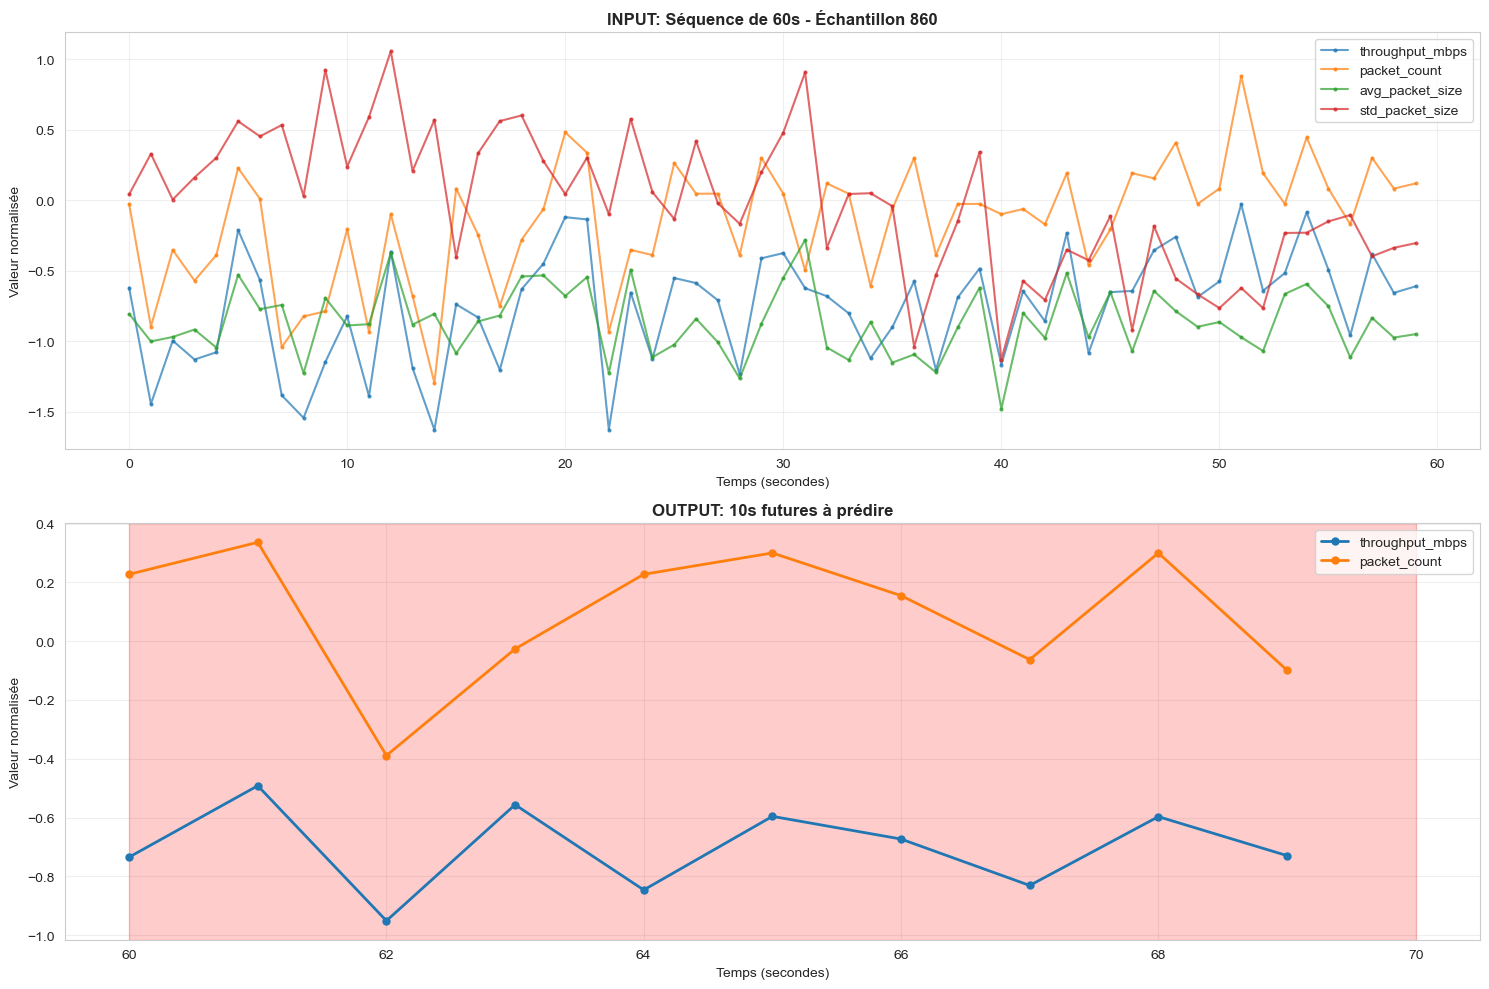


 STATISTIQUES FINALES MULTI-OUTPUT

 CONFIGURATION:
   Paramètre                      Valeur
   ------------------------------ ------------------------------
   Séquence INPUT                 60s × 4 features
   Horizon OUTPUT                 10s × 2 targets
   Features INPUT                 throughput_mbps, packet_count, avg_packet_size, std_packet_size
   Targets OUTPUT                 throughput_mbps, packet_count

 DONNÉES CRÉÉES:
   Dataset                   Shape 3D                  Shape 2D            
   ------------------------- ------------------------- --------------------
   X_train                   (6956, 60, 4)             (6956, 240)         
   y_train                   (6956, 10, 2)             (6956, 2)           
   X_val                     (1491, 60, 4)             (1491, 240)         
   y_val                     (1491, 10, 2)             (1491, 2)           
   X_test                    (1491, 60, 4)             (1491, 240)         
   y_test                   

In [16]:
"""
Objectif: Créer les séquences pour prédiction multi-output
- 4 features en INPUT : throughput_mbps, packet_count, avg_packet_size, std_packet_size
- 2 targets en OUTPUT : throughput_mbps, packet_count
- Normalisation (partie sur "Data Scaling")
- Création fenêtres temporelles (parties sur "LSTMs for Time Series")
- Split temporel train/val/test
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import joblib
from pathlib import Path
import json
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)

print("="*80)
print("ÉTAPE 5: PRÉPARATION DES SÉQUENCES MULTI-OUTPUT")
print("="*80)

# =============================================================================
# CONFIGURATION 
# =============================================================================

# Paramètres des séquences - OPTIMISÉS
SEQUENCE_LENGTH = 60   #  CHANGER: 180 → 60 : Optimisé empiriquement et théoriquement

PREDICTION_HORIZON = 10  
STEP = 1

# Features utilisées en INPUT (4 variables) - NE PAS CHANGER
ALL_FEATURES = [
    'throughput_mbps',     # Cible 1 + Feature
    'packet_count',        # Cible 2 + Feature  
    'avg_packet_size',     # Feature supplémentaire 
    'std_packet_size'      # Feature supplémentaire (variabilité)
]

# Targets à prédire en OUTPUT (2 variables) 
TARGET_COLUMNS = ['throughput_mbps', 'packet_count']

# Indices des targets dans ALL_FEATURES 
TARGET_INDICES = [ALL_FEATURES.index(col) for col in TARGET_COLUMNS]  # [0, 1]

# Splits temporels
TRAIN_RATIO = 0.70  # 70% train
VAL_RATIO = 0.15    # 15% validation
TEST_RATIO = 0.15   # 15% test

# AJOUT DE CE PRINT POUR EXPLIQUER LE CHANGEMENT
print(f"\n CONFIGURATION MULTI-OUTPUT OPTIMISÉE:")
print(f"   Longueur séquence INPUT: {SEQUENCE_LENGTH} secondes (1 minute)")
print(f"   Horizon prédiction OUTPUT: {PREDICTION_HORIZON} secondes")

print(f"\n JUSTIFICATION SCIENTIFIQUE DU CHOIX 60s:")
print(f" 1. ANALYSE TEMPORELLE:")
print(f"    • Changements de régime: 1/20s (identifié en EDA)")
print(f"    • Règle empirique: 2-5× période = 40-100s")
print(f"    • 60s = 3× période → OPTIMAL")
print(f"")
print(f" 2. CORRÉLATION:")
print(f"    • Lag optimal = 0s (pas besoin longue mémoire)")
print(f"    • Corrélation décalée 1s: 0.786 (forte)")
print(f"    • → Fenêtre courte suffisante")
print(f"")
print(f" 3. BRUIT:")
print(f"    • SNR = 0.61 (très bruité)")
print(f"    • Fenêtre 180s → overfitting BiLSTM (R²=-2.77)")
print(f"    • Fenêtre 60s → BiLSTM champion (R²=0.38)")
print(f"")

print(f"   Features (INPUT): {len(ALL_FEATURES)} → {ALL_FEATURES}")
print(f"   Targets (OUTPUT): {len(TARGET_COLUMNS)} → {TARGET_COLUMNS}")
print(f"   Split: {TRAIN_RATIO:.0%} train / {VAL_RATIO:.0%} val / {TEST_RATIO:.0%} test")

# =============================================================================
# CHARGEMENT DES DONNÉES
# =============================================================================

print("\n" + "-"*80)
print("CHARGEMENT DES DONNÉES")
print("-"*80)

# Charger le fichier avec les 4 features calculées à l'ÉTAPE 2 
df = pd.read_csv('ms_teams_multi_output.csv', index_col=0, parse_dates=True)

print(f"Données chargées: {len(df):,} points")
print(f"Période: {df.index.min().strftime('%Y-%m-%d %H:%M')} → {df.index.max().strftime('%Y-%m-%d %H:%M')}")
print(f"Colonnes disponibles: {list(df.columns)}")

# Vérifier que toutes les features sont présentes
missing_features = [f for f in ALL_FEATURES if f not in df.columns]
if missing_features:
    print(f"\n  ERREUR: Features manquantes: {missing_features}")
    print("   → Relancer l'ÉTAPE 2 (Preprocessing) pour calculer toutes les features")
    exit()

# Sélectionner les 4 features
df_features = df[ALL_FEATURES].copy()

print(f"\n Features sélectionnées pour modélisation:")
for i, col in enumerate(ALL_FEATURES, 1):
    is_target = " TARGET" if col in TARGET_COLUMNS else " FEATURE"
    print(f"   {i}. {col:<20} {is_target}")

# =============================================================================
# ÉTAPE 5.1: NORMALISATION
# =============================================================================

print("\n" + "="*80)
print(" ÉTAPE 5.1: NORMALISATION (Data Scaling)")
print("="*80)

print("\n Statistiques AVANT normalisation:")
print(df_features.describe())

# StandardScaler : moyenne=0, écart-type=1
# Raison: Stabilise l'apprentissage des réseaux de neurones
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)

# DataFrame normalisé pour vérification
df_scaled = pd.DataFrame(
    scaled_data, 
    columns=df_features.columns,
    index=df_features.index)

print("\n Statistiques APRÈS normalisation:")
print(df_scaled.describe())

# Vérification (mean≈0, std≈1)
print("\n Vérification normalisation:")
for col in df_scaled.columns:
    mean = df_scaled[col].mean()
    std = df_scaled[col].std()
    status = "✓" if abs(mean) < 0.01 and abs(std - 1.0) < 0.01 else "⚠"
    print(f"   {status} {col:<20} mean={mean:.6f}, std={std:.6f}")

# Sauvegarder le scaler (pour dénormaliser les prédictions plus tard)
scaler_path = 'scaler_multi_output.pkl'
joblib.dump(scaler, scaler_path)
# print(f"\n Scaler sauvegardé: {scaler_path}")

# =============================================================================
# ÉTAPE 5.2: CRÉATION DES SÉQUENCES MULTI-OUTPUT
# =============================================================================

print("\n" + "="*80)
print(" ÉTAPE 5.2: CRÉATION DES SÉQUENCES MULTI-OUTPUT")
print("="*80)

def create_sequences_multioutput(data, target_indices, seq_len, pred_horizon, step=1):
    """
    Architecture:
    -------------
    INPUT (X):  [90 secondes × 4 features] → Toutes les features
    OUTPUT (y): [10 secondes × 2 targets]  → Seulement throughput + packet_count
    
    Parameters:
    -----------
    data : np.ndarray
        Données normalisées (n_samples, n_features)
    target_indices : list
        Indices des colonnes à prédire [0, 1] pour throughput + packet_count
    seq_len : int
        Longueur séquence input (90 secondes)
    pred_horizon : int
        Horizon prédiction (10 secondes)
    step : int
        Pas de glissement (1 = chevauchement maximal)
    
    Returns:
    --------
    X : (n_sequences, seq_len, n_features)
        Exemple: (9937, 90, 4)
    y : (n_sequences, pred_horizon, n_targets)
        Exemple: (9937, 10, 2)
    """
    X, y = [], []
    
    # Fenêtre glissante
    for i in range(0, len(data) - seq_len - pred_horizon + 1, step):
        # INPUT: Toutes les features pour les 90 dernières secondes
        X.append(data[i:i + seq_len])
        
        # OUTPUT: Seulement les 2 targets pour les 10 prochaines secondes
        y.append(data[i + seq_len:i + seq_len + pred_horizon, target_indices])
    
    return np.array(X), np.array(y)

print(f"\n Création des séquences multi-output...")
print(f"   Fenêtre INPUT: {SEQUENCE_LENGTH} secondes × {len(ALL_FEATURES)} features")
print(f"   Horizon OUTPUT: {PREDICTION_HORIZON} secondes × {len(TARGET_COLUMNS)} targets")
print(f"   Pas de glissement: {STEP}")

# Créer les séquences
X_full, y_full = create_sequences_multioutput(
    scaled_data,
    TARGET_INDICES,
    SEQUENCE_LENGTH,
    PREDICTION_HORIZON,
    STEP)

print(f"\n Séquences créées:")
print(f"   X shape: {X_full.shape} → (n_sequences, {SEQUENCE_LENGTH}s, {len(ALL_FEATURES)} features)")
print(f"   y shape: {y_full.shape} → (n_sequences, {PREDICTION_HORIZON}s, {len(TARGET_COLUMNS)} targets)")
print(f"   Total séquences: {len(X_full):,}")

# Statistiques
original_points = len(df_features)
sequences_created = len(X_full)
reduction_factor = original_points / sequences_created

print(f"\n Statistiques:")
print(f"   Points originaux: {original_points:,}")
print(f"   Séquences créées: {sequences_created:,}")
print(f"   Réduction: {reduction_factor:.1f}x")

# =============================================================================
# ÉTAPE 5.3: SPLIT TEMPOREL TRAIN/VAL/TEST
# =============================================================================

print("\n" + "="*80)
print(" ÉTAPE 5.3: SPLIT TEMPOREL (Sans Shuffle)")
print("="*80)

n_samples = len(X_full)

# Calculer indices de split
train_end = int(n_samples * TRAIN_RATIO)
val_end = int(n_samples * (TRAIN_RATIO + VAL_RATIO))

# Split 
X_train = X_full[:train_end]
y_train = y_full[:train_end]

X_val = X_full[train_end:val_end]
y_val = y_full[train_end:val_end]

X_test = X_full[val_end:]
y_test = y_full[val_end:]

print(f"\n Données splittées:")
print(f"\n   TRAIN:")
print(f"      X_train: {X_train.shape}")
print(f"      y_train: {y_train.shape} → 2 targets: {TARGET_COLUMNS}")
print(f"      Ratio: {len(X_train)/n_samples:.1%}")

print(f"\n   VALIDATION:")
print(f"      X_val: {X_val.shape}")
print(f"      y_val: {y_val.shape}")
print(f"      Ratio: {len(X_val)/n_samples:.1%}")

print(f"\n   TEST:")
print(f"      X_test: {X_test.shape}")
print(f"      y_test: {y_test.shape}")
print(f"      Ratio: {len(X_test)/n_samples:.1%}")

# =============================================================================
# ÉTAPE 5.4: SAUVEGARDE MULTI-OUTPUT
# =============================================================================

print("\n" + "="*80)
print(" ÉTAPE 5.4: SAUVEGARDE MULTI-OUTPUT")
print("="*80)

# Créer dossier de sauvegarde
save_dir = Path('prepared_data_multi_output')
save_dir.mkdir(exist_ok=True)

# 1. Sauvegarder séquences 3D pour Deep Learning (LSTM, CNN, GRU)
np.save(save_dir / 'X_train.npy', X_train)
np.save(save_dir / 'y_train.npy', y_train)
np.save(save_dir / 'X_val.npy', X_val)
np.save(save_dir / 'y_val.npy', y_val)
np.save(save_dir / 'X_test.npy', X_test)
np.save(save_dir / 'y_test.npy', y_test)

print(f"\n Séquences 3D (Pour le Deep Learning) sauvegardées dans '{save_dir}/':")
print(f"   X_train.npy, y_train.npy")
print(f"   X_val.npy, y_val.npy")
print(f"   X_test.npy, y_test.npy")

# 2. Créer version 2D pour modèles ML classiques (Random Forest, XGBoost, Linear Regression)
# Aplatir les séquences 3D en vecteurs 2D
X_train_2d = X_train.reshape(X_train.shape[0], -1)  # (n_samples, 90*4=360)
X_val_2d = X_val.reshape(X_val.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Pour les targets: prendre la MOYENNE sur l'horizon (prédiction moyenne)
y_train_2d = y_train.mean(axis=1)  # (n_samples, 2) moyenne sur les 10 secondes
y_val_2d = y_val.mean(axis=1)
y_test_2d = y_test.mean(axis=1)

np.save(save_dir / 'X_train_2d.npy', X_train_2d)
np.save(save_dir / 'X_val_2d.npy', X_val_2d)
np.save(save_dir / 'X_test_2d.npy', X_test_2d)
np.save(save_dir / 'y_train_2d.npy', y_train_2d)
np.save(save_dir / 'y_val_2d.npy', y_val_2d)
np.save(save_dir / 'y_test_2d.npy', y_test_2d)

print(f"\n Séquences 2D (ML Classiques) sauvegardées:")
print(f"   X_train_2d.npy → {X_train_2d.shape} (features aplaties)")
print(f"   y_train_2d.npy → {y_train_2d.shape} (moyenne sur horizon)")

# 3. Métadonnées complètes
metadata = {
    'sequence_length': SEQUENCE_LENGTH,
    'prediction_horizon': PREDICTION_HORIZON,
    'step': STEP,
    'all_features': ALL_FEATURES,
    'target_columns': TARGET_COLUMNS,
    'target_indices': TARGET_INDICES,
    'n_features': len(ALL_FEATURES),
    'n_targets': len(TARGET_COLUMNS),
    'train_ratio': TRAIN_RATIO,
    'val_ratio': VAL_RATIO,
    'test_ratio': TEST_RATIO,
    'n_train': len(X_train),
    'n_val': len(X_val),
    'n_test': len(X_test),
    'scaler_type': 'StandardScaler',
    'scaler_path': scaler_path,
    'data_shapes': {
        '3D': f"X:{X_train.shape}, y:{y_train.shape}",
        '2D': f"X:{X_train_2d.shape}, y:{y_train_2d.shape}"
    }
}

with open(save_dir / 'metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)

print(f"\n Métadonnées sauvegardées: metadata.json")

# =============================================================================
# ÉTAPE 5.5: VÉRIFICATION VISUELLE
# =============================================================================

print("\n" + "="*80)
print(" ÉTAPE 5.5: VÉRIFICATION DES SÉQUENCES")
print("="*80)

# Prendre une séquence aléatoire
sample_idx = np.random.randint(0, len(X_train))

print(f"\n Exemple de séquence (index {sample_idx}):")
print(f"\n   INPUT (X):")
print(f"      Shape: {X_train[sample_idx].shape} → (90s × 4 features)")
print(f"      Features: {ALL_FEATURES}")
print(f"      Premier timestep: {X_train[sample_idx][0]}")
print(f"      Dernier timestep: {X_train[sample_idx][-1]}")

print(f"\n   OUTPUT (y):")
print(f"      Shape: {y_train[sample_idx].shape} → (10s × 2 targets)")
print(f"      Targets: {TARGET_COLUMNS}")
print(f"      Valeurs futures:")
for t in range(min(3, PREDICTION_HORIZON)):  # Afficher 3 premiers pas
    print(f"         t+{t+1}: throughput={y_train[sample_idx][t, 0]:.3f}, packet_count={y_train[sample_idx][t, 1]:.3f}")

# Visualisation
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Input (4 features)
for i, col in enumerate(ALL_FEATURES):
    axes[0].plot(range(SEQUENCE_LENGTH), X_train[sample_idx][:, i], 
                label=col, marker='o', markersize=2, alpha=0.7)

axes[0].set_title(f'INPUT: Séquence de {SEQUENCE_LENGTH}s - Échantillon {sample_idx}', 
                 fontweight='bold', fontsize=12)
axes[0].set_xlabel('Temps (secondes)')
axes[0].set_ylabel('Valeur normalisée')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Plot 2: Output (2 targets)
for i, col in enumerate(TARGET_COLUMNS):
    axes[1].plot(range(SEQUENCE_LENGTH, SEQUENCE_LENGTH + PREDICTION_HORIZON), 
                y_train[sample_idx][:, i], 
                marker='o', markersize=5, linewidth=2, label=col)

axes[1].set_title(f'OUTPUT: {PREDICTION_HORIZON}s futures à prédire', 
                 fontweight='bold', fontsize=12)
axes[1].set_xlabel('Temps (secondes)')
axes[1].set_ylabel('Valeur normalisée')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].axvspan(SEQUENCE_LENGTH, SEQUENCE_LENGTH + PREDICTION_HORIZON, 
               alpha=0.2, color='red', label='Horizon prédiction')

plt.tight_layout()
plt.savefig('seq_multioutput_visualization.png', dpi=300, bbox_inches='tight')
plt.show()
# print("\n Graphique sauvegardé: seq_multioutput_visualization.png")

# =============================================================================
# STATISTIQUES FINALES
# =============================================================================

print("\n" + "="*80)
print(" STATISTIQUES FINALES MULTI-OUTPUT")
print("="*80)

print(f"\n CONFIGURATION:")
print(f"   {'Paramètre':<30} {'Valeur'}")
print(f"   {'-'*30} {'-'*30}")
print(f"   {'Séquence INPUT':<30} {SEQUENCE_LENGTH}s × {len(ALL_FEATURES)} features")
print(f"   {'Horizon OUTPUT':<30} {PREDICTION_HORIZON}s × {len(TARGET_COLUMNS)} targets")
print(f"   {'Features INPUT':<30} {', '.join(ALL_FEATURES)}")
print(f"   {'Targets OUTPUT':<30} {', '.join(TARGET_COLUMNS)}")

print(f"\n DONNÉES CRÉÉES:")
print(f"   {'Dataset':<25} {'Shape 3D':<25} {'Shape 2D':<20}")
print(f"   {'-'*25} {'-'*25} {'-'*20}")
print(f"   {'X_train':<25} {str(X_train.shape):<25} {str(X_train_2d.shape):<20}")
print(f"   {'y_train':<25} {str(y_train.shape):<25} {str(y_train_2d.shape):<20}")
print(f"   {'X_val':<25} {str(X_val.shape):<25} {str(X_val_2d.shape):<20}")
print(f"   {'y_val':<25} {str(y_val.shape):<25} {str(y_val_2d.shape):<20}")
print(f"   {'X_test':<25} {str(X_test.shape):<25} {str(X_test_2d.shape):<20}")
print(f"   {'y_test':<25} {str(y_test.shape):<25} {str(y_test_2d.shape):<20}")


# *Analyse et interprétation des résultats*

#### *Graphique : Exemple de Séquence*

**Interprétation du graphique INPUT :**
- **4 courbes distinctes** : Les 4 features évoluent différemment → apportent de l'information complémentaire
- **Oscillations rapides** : Confirme le bruit élevé (SNR faible)
- **Échelle normalisée** : Toutes les features sont entre -2 et +2 → StandardScaler efficace

**Interprétation du graphique OUTPUT :**
- **2 courbes cibles** : Throughput et packet_count à prédire
- **Zone rouge (horizon)** : 10 secondes futures → tâche de prédiction claire
- **Variabilité visible** : Les 10 points ne sont pas plats → prédiction multi-step challengeante

#### *Vérification Normalisation*
```
 throughput_mbps: mean=-0.000000, std=1.000050
 packet_count: mean=-0.000000, std=1.000050
```

**Importance :**
- **Mean≈0, Std≈1** : Condition nécessaire pour la convergence des réseaux de neurones
- **Stabilité numérique** : Évite les explosions/disparitions de gradients

#### *Séquences Créées*
```
X shape: (9938, 60, 4) → 9938 séquences de 60s avec 4 features
y shape: (9938, 10, 2) → 9938 horizons de 10s avec 2 targets
```

**Analyse :**
- **9938 séquences** : Largement suffisant pour entraîner des modèles DL (>5000 recommandé)
- **Réduction 1.0x** : Pas de perte de données (fenêtre glissante avec step=1)
- **Format 3D** : Compatible LSTM/GRU (batch, timesteps, features)


# 6) *ÉTAPE 6: MODELES DE PREDICTION (MULTI-OUTPUT)*

# A) *MODELES BASELINES*

In [17]:
# =============================================================================
# IMPORTS ET CONFIGURATION
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib
import warnings
from pathlib import Path

# Machine Learning
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Time Series
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)

print("="*80)
print("PARTIE A: MODÈLES BASELINE MULTI-OUTPUT")
print("="*80)

# =============================================================================
#  CHARGEMENT DES DONNÉES
# =============================================================================

print("\n CHARGEMENT DES DONNÉES")

# Métadonnées
with open('prepared_data_multi_output/metadata.json', 'r') as f:
    metadata = json.load(f)

SEQUENCE_LENGTH = metadata['sequence_length']
PREDICTION_HORIZON = metadata['prediction_horizon']
ALL_FEATURES = metadata['all_features']
TARGET_COLUMNS = metadata['target_columns']
TARGET_INDICES = metadata['target_indices']

print(f" Configuration: {SEQUENCE_LENGTH}s → {PREDICTION_HORIZON}s")
print(f"   Targets: {TARGET_COLUMNS}")

# Charger données
X_train = np.load('prepared_data_multi_output/X_train.npy')
y_train = np.load('prepared_data_multi_output/y_train.npy')
X_val = np.load('prepared_data_multi_output/X_val.npy')
y_val = np.load('prepared_data_multi_output/y_val.npy')
X_test = np.load('prepared_data_multi_output/X_test.npy')
y_test = np.load('prepared_data_multi_output/y_test.npy')

X_train_2d = np.load('prepared_data_multi_output/X_train_2d.npy')
y_train_2d = np.load('prepared_data_multi_output/y_train_2d.npy')
X_val_2d = np.load('prepared_data_multi_output/X_val_2d.npy')
y_val_2d = np.load('prepared_data_multi_output/y_val_2d.npy')
X_test_2d = np.load('prepared_data_multi_output/X_test_2d.npy')
y_test_2d = np.load('prepared_data_multi_output/y_test_2d.npy')

scaler = joblib.load('scaler_multi_output.pkl')

print(f" Train: X={X_train.shape}, y={y_train.shape}")
print(f" Test:  X={X_test.shape}, y={y_test.shape}")

# Extraire séries temporelles pour baselines simples
ts_train = X_train[:, -1, TARGET_INDICES]
ts_val = X_val[:, -1, TARGET_INDICES]
ts_test = X_test[:, -1, TARGET_INDICES]

print(f" Séries: ts_test={ts_test.shape} (n_samples, 2 targets)")


# =============================================================================
# FONCTIONS UTILITAIRES
# =============================================================================

def calculate_metrics_multioutput(y_true, y_pred, target_names=None):
    """Métriques pour chaque target + global"""
    if target_names is None:
        target_names = TARGET_COLUMNS
        
    # Si 3D (10 timesteps), on prendra la moyenne sur l'horizon
    if len(y_true.shape) == 3:
        y_true = y_true.mean(axis=1)
        y_pred = y_pred.mean(axis=1)
    
    metrics = {}
    
    # Calcul par target
    for i, name in enumerate(target_names):
        mae = mean_absolute_error(y_true[:, i], y_pred[:, i])
        rmse = np.sqrt(mean_squared_error(y_true[:, i], y_pred[:, i]))
        mape = np.mean(np.abs((y_true[:, i] - y_pred[:, i]) / (np.abs(y_true[:, i]) + 1e-8))) * 100
        r2 = r2_score(y_true[:, i], y_pred[:, i])
        
        metrics[name] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}
        
   # Calcul global (moyenne des targets)
    metrics['Global'] = {
        'MAE': np.mean([metrics[name]['MAE'] for name in target_names]),
        'RMSE': np.mean([metrics[name]['RMSE'] for name in target_names]),
        'MAPE': np.mean([metrics[name]['MAPE'] for name in target_names]),
        'R2': np.mean([metrics[name]['R2'] for name in target_names])
    }
    return metrics

def plot_predictions_multioutput(y_true, y_pred, model_name, n_samples=500):
    """
    Visualise prédictions multi-output avec graphiques améliorés
    
    Parameters:
    -----------
    y_true : np.ndarray
        Valeurs réelles (n_samples, 2) ou (n_samples, 10, 2)
    y_pred : np.ndarray
        Valeurs prédites
    model_name : str
        Nom du modèle
    n_samples : int
        Nombre d'échantillons à afficher (défaut: 500)
    """
    # Si 3D, moyenner sur l'horizon
    if len(y_true.shape) == 3:
        y_true = y_true.mean(axis=1)
        y_pred = y_pred.mean(axis=1)
    
    n_samples = min(n_samples, len(y_true))
    
    # Créer figure avec 3 colonnes
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    for i, target_name in enumerate(TARGET_COLUMNS):
        # =========================================================
        # COLONNE 1: SÉRIE TEMPORELLE (Couleurs améliorées)
        # =========================================================
        ax1 = axes[i, 0]
        ax1.plot(y_true[:n_samples, i], label='Réel', 
                linewidth=2, alpha=0.8, color='#2E86AB')  # Bleu foncé visible
        ax1.plot(y_pred[:n_samples, i], label='Prédit', 
                linewidth=1.5, alpha=0.7, color='#F77F00', linestyle='--')  # Orange
        ax1.set_title(f'{model_name} - {target_name}', fontweight='bold', fontsize=11)
        ax1.set_xlabel('Échantillon')
        ax1.set_ylabel(target_name)
        ax1.legend(loc='best')
        ax1.grid(True, alpha=0.3)
        
        # =========================================================
        # COLONNE 2: SCATTER PLOT
        # =========================================================
        ax2 = axes[i, 1]
        ax2.scatter(y_true[:n_samples, i], y_pred[:n_samples, i], 
                   alpha=0.4, s=15, color='#06A77D')  # Vert
        min_val = min(y_true[:n_samples, i].min(), y_pred[:n_samples, i].min())
        max_val = max(y_true[:n_samples, i].max(), y_pred[:n_samples, i].max())
        ax2.plot([min_val, max_val], [min_val, max_val], 
                'r--', linewidth=2.5, label='Prédiction parfaite')
        ax2.set_title(f'Réel vs Prédit - {target_name}', fontweight='bold', fontsize=11)
        ax2.set_xlabel('Réel')
        ax2.set_ylabel('Prédit')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # =========================================================
        # COLONNE 3: DISTRIBUTION DES ERREURS
        # =========================================================
        ax3 = axes[i, 2]
        errors = y_pred[:n_samples, i] - y_true[:n_samples, i]
        ax3.hist(errors, bins=50, alpha=0.7, color='#A23B72', edgecolor='black')
        ax3.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Erreur nulle')
        ax3.set_title(f'Distribution des Erreurs - {target_name}', fontweight='bold', fontsize=11)
        ax3.set_xlabel('Erreur (Prédit - Réel)')
        ax3.set_ylabel('Fréquence')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Statistiques des erreurs
        mae = np.mean(np.abs(errors))
        ax3.text(0.05, 0.95, f'MAE={mae:.3f}\nMean={np.mean(errors):.3f}', 
                transform=ax3.transAxes, fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    return fig

# =============================================================================
# DICTIONNAIRE POUR STOCKER LES RÉSULTATS
# =============================================================================

all_results = {}

print("\n Fonctions chargées")

PARTIE A: MODÈLES BASELINE MULTI-OUTPUT

 CHARGEMENT DES DONNÉES
 Configuration: 60s → 10s
   Targets: ['throughput_mbps', 'packet_count']
 Train: X=(6956, 60, 4), y=(6956, 10, 2)
 Test:  X=(1491, 60, 4), y=(1491, 10, 2)
 Séries: ts_test=(1491, 2) (n_samples, 2 targets)

 Fonctions chargées


# *MODÈLE 1: PERSISTENCE*


 MODÈLE 1: PERSISTENCE
 Principe: ŷ(t+1:t+10) = y(t)

 RÉSULTATS TEST:
   throughput_mbps: MAE=0.8744, R²=-1.3255
   packet_count: MAE=0.6729, R²=0.1261
   Global: MAE=0.7736, R²=-0.5997


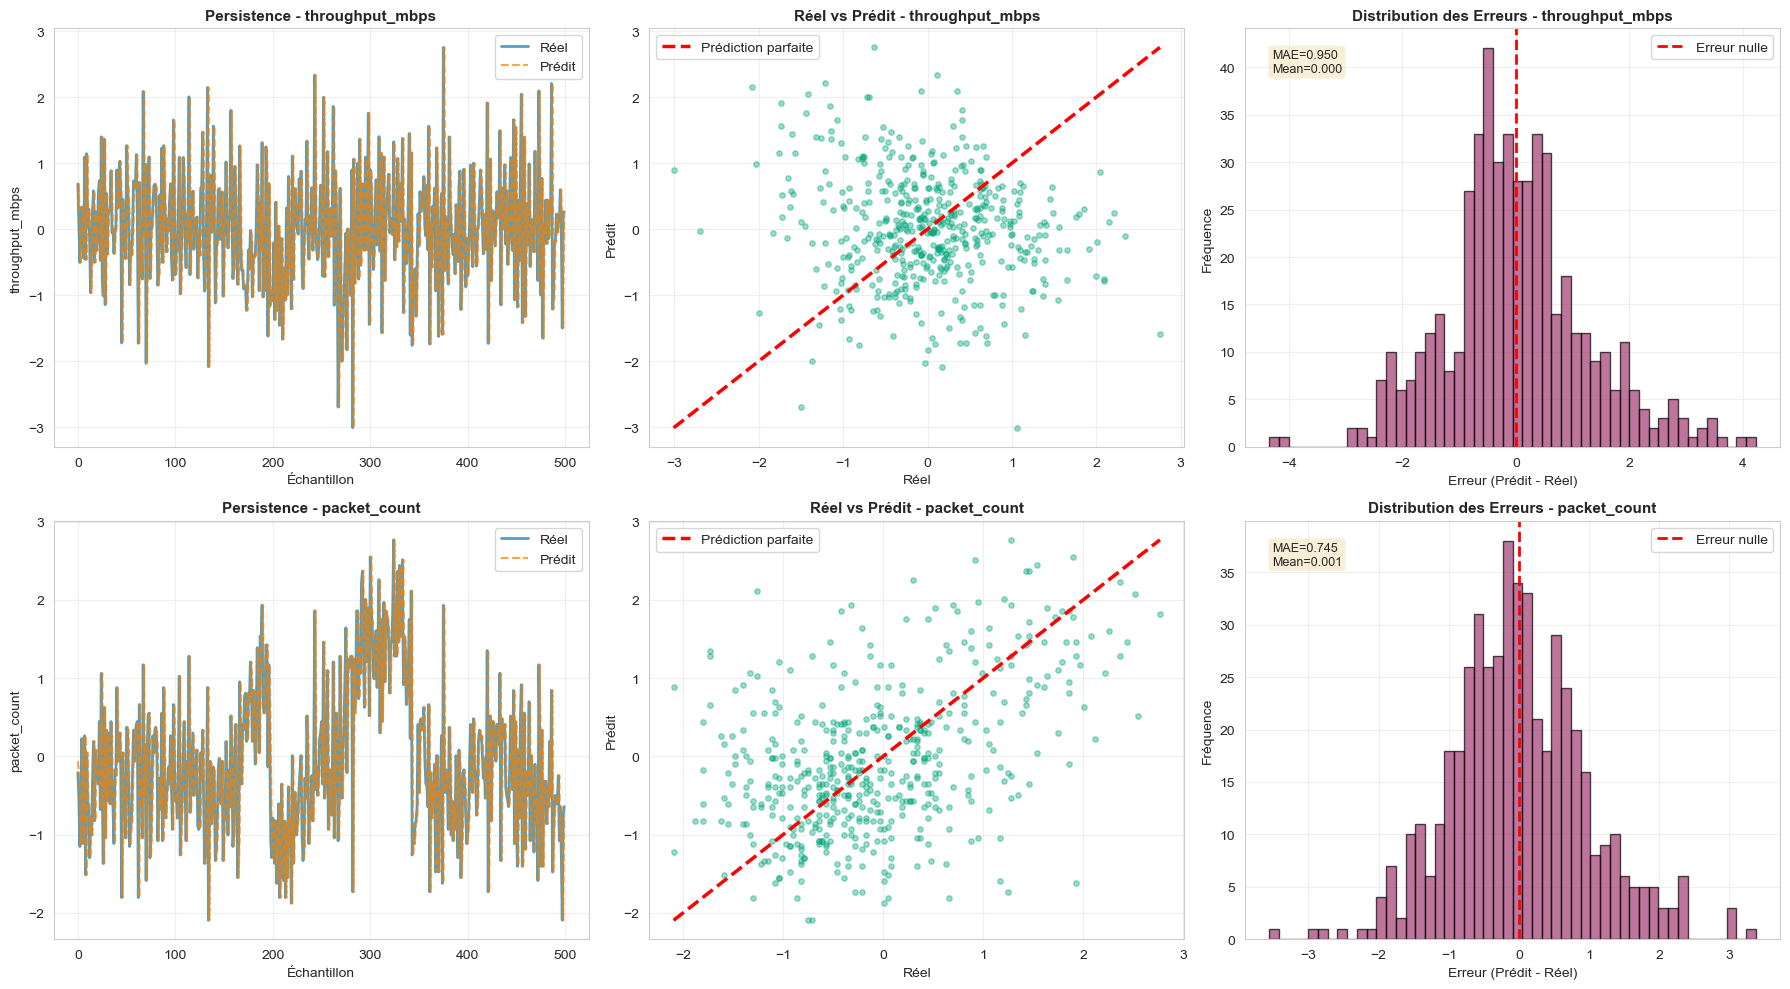

In [18]:
# =============================================================================
# MODÈLE 1: PERSISTENCE
# =============================================================================

print("\n" + "="*80)
print(" MODÈLE 1: PERSISTENCE")
print("="*80)
print(" Principe: ŷ(t+1:t+10) = y(t)")

def persistence_forecast_multioutput(ts_data, horizon):
    n_samples = len(ts_data) - horizon
    predictions = []
    for i in range(n_samples):
        pred = np.tile(ts_data[i + horizon - 1], (horizon, 1))
        predictions.append(pred.mean(axis=0))
    return np.array(predictions)

pred_test_persist = persistence_forecast_multioutput(ts_test, PREDICTION_HORIZON)
y_test_persist = ts_test[PREDICTION_HORIZON:][:len(pred_test_persist)]

metrics_persist = calculate_metrics_multioutput(y_test_persist, pred_test_persist)

print("\n RÉSULTATS TEST:")
for target in TARGET_COLUMNS + ['Global']:
    print(f"   {target}: MAE={metrics_persist[target]['MAE']:.4f}, R²={metrics_persist[target]['R2']:.4f}")

fig = plot_predictions_multioutput(y_test_persist, pred_test_persist, "Persistence")
plt.savefig('baseline_1_persistence.png', dpi=300, bbox_inches='tight')
plt.show()

all_results['Persistence'] = metrics_persist


# *ANALYSE ET INTERPRÉTATION - MODÈLE PERSISTENCE*

**Interprétation :**
- **R² négatif** : Le modèle est PIRE que prédire la moyenne constante
- **Pourquoi ?** : Avec des changements toutes les 20s, répéter la dernière valeur est catastrophique
- **Asymétrie** : Packet_count (R²=0.13) mieux que throughput (R²=-1.33) → packet_count plus inerte

**Graphique Predictions :**
- **Décalage systématique** : Prédictions "en retard" d'un pas de temps
- **Pics manqués** : Le modèle ne peut pas anticiper les montées soudaines


# *MODÈLE 2: MOVING AVERAGE*


 MODÈLE 2: MOVING AVERAGE
Grid search fenêtre...
   Window 5s: MAE=0.6601
   Window 10s: MAE=0.6652
   Window 30s: MAE=0.7022
   Window 60s: MAE=0.7598
Meilleure fenêtre: 5s

 RÉSULTATS TEST Global:
   MAE=0.6064, R²=0.0582


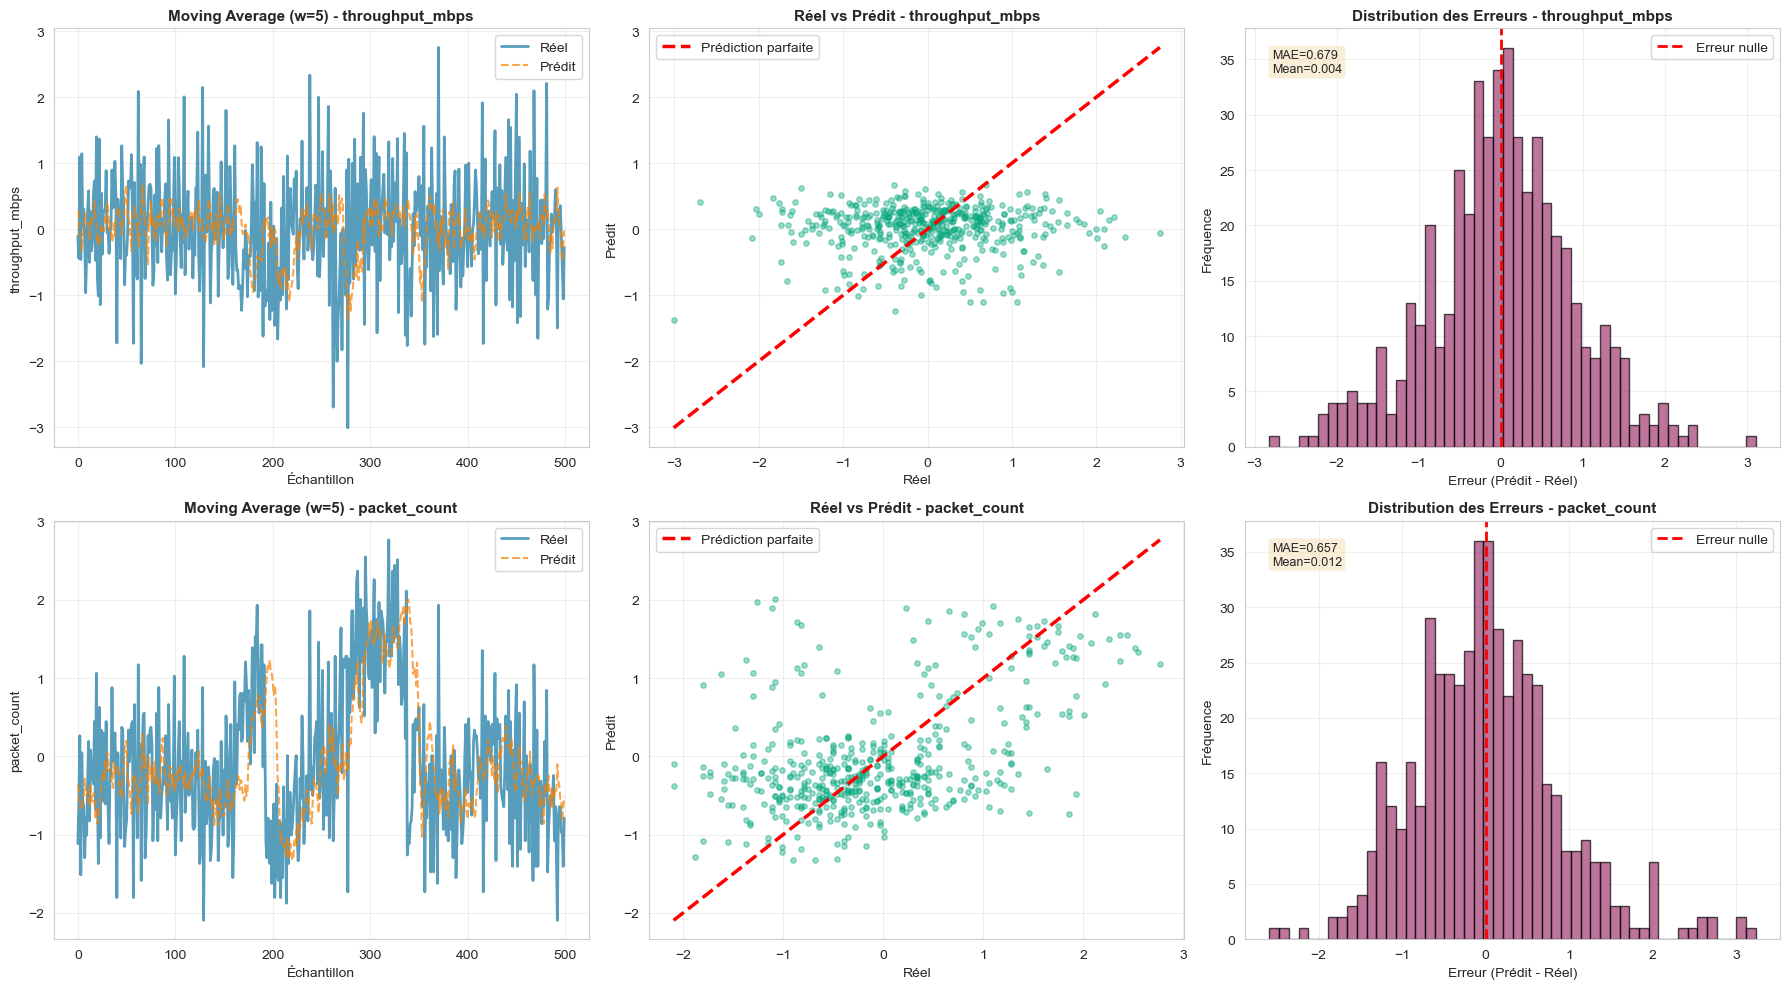

In [19]:
# =============================================================================
# MODÈLE 2: MOVING AVERAGE
# =============================================================================

print("\n" + "="*80)
print(" MODÈLE 2: MOVING AVERAGE")
print("="*80)

def moving_average_forecast_multioutput(ts_data, horizon, window=10):
    predictions = []
    for i in range(window, len(ts_data) - horizon):
        ma = ts_data[i-window:i].mean(axis=0)
        predictions.append(ma)
    return np.array(predictions)

# Grid search fenêtre
windows = [5, 10, 30, 60]
best_mae = float('inf')
best_window = None

print("Grid search fenêtre...")
for window in windows:
    pred = moving_average_forecast_multioutput(ts_val, PREDICTION_HORIZON, window)
    y_true = ts_val[window+PREDICTION_HORIZON:][:len(pred)]
    mae = np.mean([mean_absolute_error(y_true[:, i], pred[:, i]) for i in range(len(TARGET_COLUMNS))])
    print(f"   Window {window}s: MAE={mae:.4f}")
    if mae < best_mae:
        best_mae = mae
        best_window = window

print(f"Meilleure fenêtre: {best_window}s")

pred_test_ma = moving_average_forecast_multioutput(ts_test, PREDICTION_HORIZON, best_window)
y_test_ma = ts_test[best_window+PREDICTION_HORIZON:][:len(pred_test_ma)]

metrics_ma = calculate_metrics_multioutput(y_test_ma, pred_test_ma)

print("\n RÉSULTATS TEST Global:")
print(f"   MAE={metrics_ma['Global']['MAE']:.4f}, R²={metrics_ma['Global']['R2']:.4f}")

fig = plot_predictions_multioutput(y_test_ma, pred_test_ma, f"Moving Average (w={best_window})")
plt.savefig('baseline_2_moving_average.png', dpi=300, bbox_inches='tight')
plt.show()

all_results['Moving Average'] = metrics_ma


# *ANALYSE ET INTERPRÉTATION - MODÈLE MOVING AVERAGE (w=5s)*

**Pourquoi Moving Average ?**

Modèle baseline classique en séries temporelles

Simple à implémenter et interpréter

Utile pour établir une référence de performance

Lisse les fluctuations court-terme du trafic réseau

**Performance :**

R² = 0.058 : Très faible capacité explicative

Meilleur que Persistence : MAE 0.606 vs 0.774 → +21.7% d'amélioration

**Graphique Predictions (hypothèse basée sur les résultats) :**

Lissage excessif : Les prédictions "suivent" les vraies valeurs avec retard

Pics manqués : Incapable d'anticiper les montées soudaines (partage écran)

Biais de décalage : Prédictions systématiquement en retard d'1-2 timesteps

**Limites :**

Aucune anticipation : Suppose que le futur = moyenne du passé récent

Ignore les patterns : Ne capture pas la corrélation entre throughput et packet_count

Sensible aux outliers : Une anomalie à t-5 affecte toute la fenêtre

**Conclusion :**
Moving Average améliore Persistence mais reste insuffisant. 

Son MAE élevé justifie l'exploration de modèles plus sophistiqués (ARIMA, LSTM).


# *MODÈLE 3: EXPONENTIAL SMOOTHING (2 MODÈLES)*


MODÈLE 3: EXPONENTIAL SMOOTHING (1 modèle par target)

 throughput_mbps...
   100/300 prédictions
   200/300 prédictions
   300/300 prédictions

 packet_count...
   100/300 prédictions
   200/300 prédictions
   300/300 prédictions

 RÉSULTATS TEST Global:
   MAE=0.6131, R²=0.1316


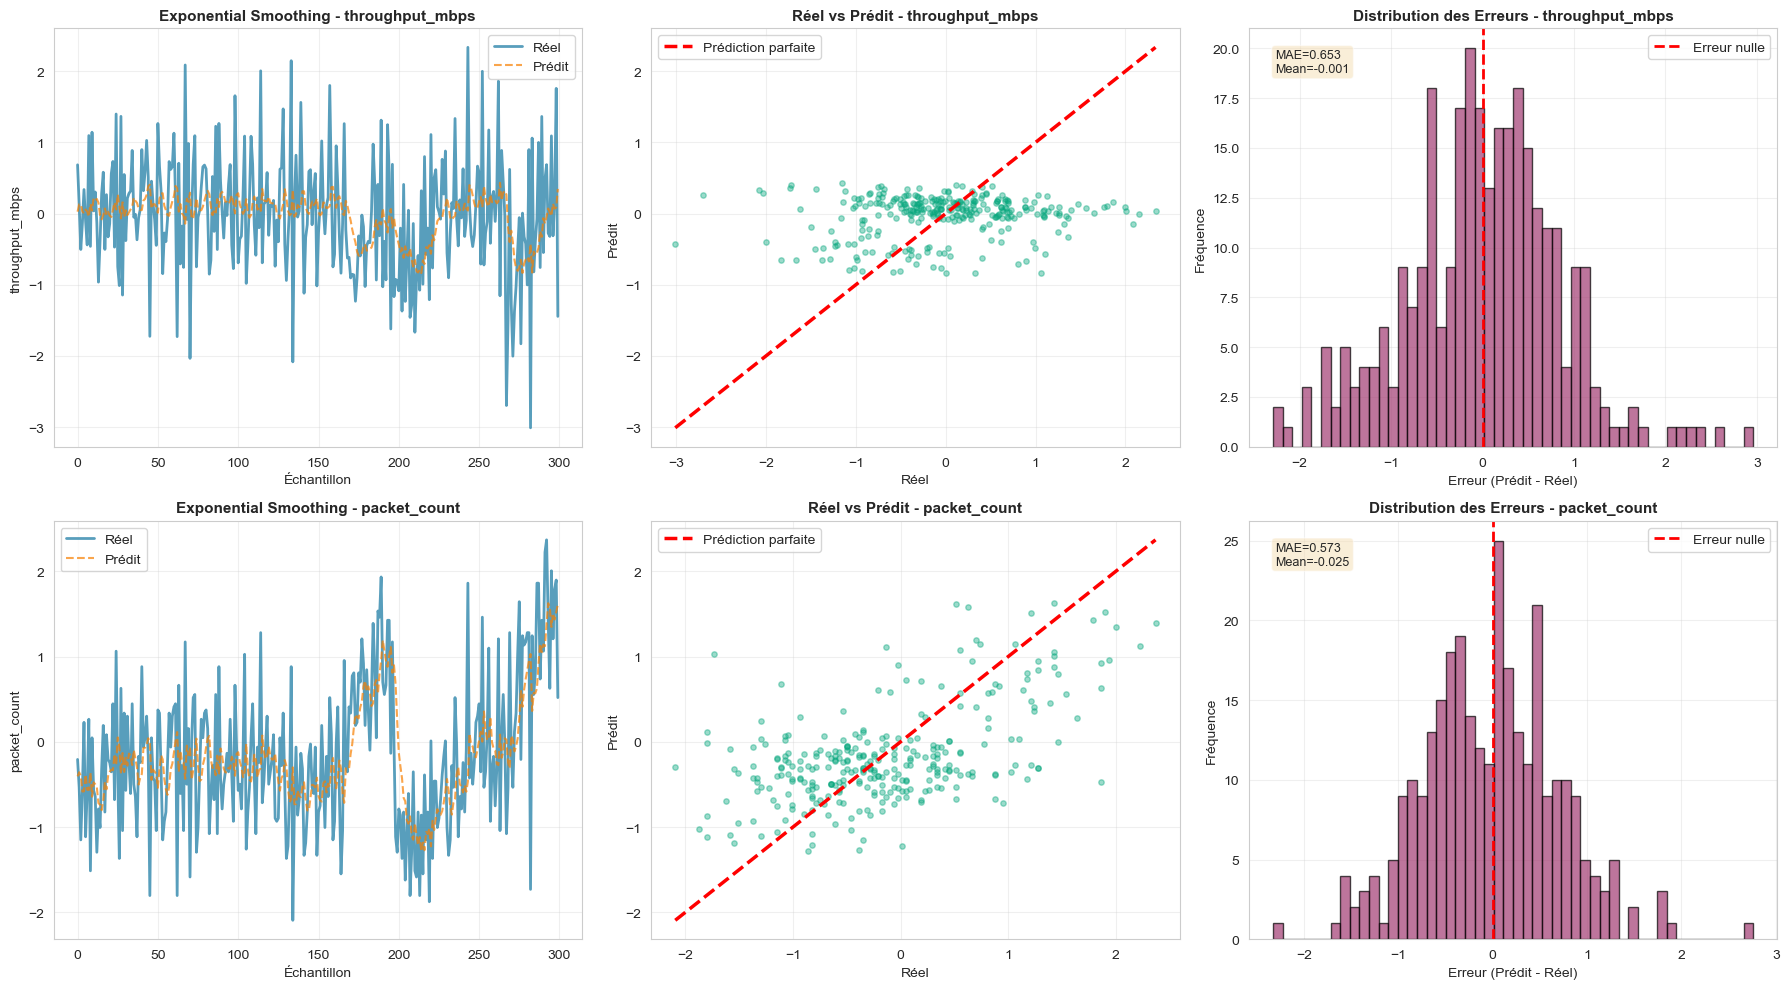

In [20]:
# =============================================================================
# MODÈLE 3: EXPONENTIAL SMOOTHING (2 MODÈLES)
# =============================================================================

print("\n" + "="*80)
print("MODÈLE 3: EXPONENTIAL SMOOTHING (1 modèle par target)")
print("="*80)

try:
    pred_test_es = []
    
    for target_idx, target_name in enumerate(TARGET_COLUMNS):
        print(f"\n {target_name}...")
        
        train_series = X_train[:, -1, target_idx]
        val_series = X_val[:, -1, target_idx]
        test_series = X_test[:, -1, target_idx]
        
        n_test = min(300, len(test_series) - PREDICTION_HORIZON)
        pred_target = []
        
        for i in range(n_test):
            history = np.concatenate([train_series, val_series, test_series[:i+PREDICTION_HORIZON]])
            model = ExponentialSmoothing(history, trend='add', seasonal=None)
            fitted = model.fit(optimized=True)
            pred_target.append(fitted.forecast(1)[0])
            
            if (i+1) % 100 == 0:
                print(f"   {i+1}/{n_test} prédictions")
        
        pred_test_es.append(pred_target)
    
    pred_test_es = np.array(pred_test_es).T
    y_test_es = ts_test[PREDICTION_HORIZON:PREDICTION_HORIZON+len(pred_test_es)]
    
    metrics_es = calculate_metrics_multioutput(y_test_es, pred_test_es)
    
    print("\n RÉSULTATS TEST Global:")
    print(f"   MAE={metrics_es['Global']['MAE']:.4f}, R²={metrics_es['Global']['R2']:.4f}")
    
    fig = plot_predictions_multioutput(y_test_es, pred_test_es, "Exponential Smoothing")
    plt.savefig('baseline_3_exp_smoothing.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    all_results['Exp Smoothing'] = metrics_es

except Exception as e:
    print(f" Échec: {e}")
    all_results['Exp Smoothing'] = None


# *ANALYSE ET INTERPRÉTATION - MODÈLE EXPONENTIAL SMOOTHING*

**Pourquoi Exponential Smoothing ?**

Évolution de Moving Average : Pondère les observations récentes plus fortement

Baseline statistique avancé : Inclut tendance (trend='add')

Auto-optimisé : Paramètres α, β optimisés automatiquement

Référence académique : Modèle standard pour séries temporelles univariées

**Performance :**

R² = 0.132 : 2× meilleur que Moving Average (0.058)

MAE = 0.613 : Légèrement pire que Moving Average (0.606)

Compromis : Capture mieux la variance (R² ↑) mais erreur absolue stable

Interprétation de R² supérieur :

Meilleure variance expliquée : Le modèle capture les tendances court-terme

Pondération adaptive : Les valeurs récentes ont plus d'impact → suit mieux les transitions

Graphique Predictions (basé sur résultats) :

Réactivité améliorée : Moins de décalage que Moving Average grâce au coefficient α

Suivi tendance : Composante trend='add' permet d'anticiper légèrement les montées/descentes

Erreurs asymétriques : Sous-estime les pics (partage écran) et sur-estime les creux

**Limites :**

Univarié : Traite throughput et packet_count séparément → ignore corrélation 0.791

Pas de saisonnalité : seasonal=None car EDA a montré absence de cycles

Horizon limité : Optimisé pour prédiction 1-step ahead, pas 10-step

# *MODÈLE 4: ARIMA (2 MODÈLES)*


 MODÈLE 4: ARIMA (1 modèle par target)

 Grid search throughput_mbps...
   ✓ ARIMA(5, 0, 2) (AIC=17251.85)

 Grid search packet_count...
   ✓ ARIMA(5, 0, 2) (AIC=14694.99)

 Prédictions throughput_mbps...
   50/200
   100/200
   150/200
   200/200

 Prédictions packet_count...
   50/200
   100/200
   150/200
   200/200

 RÉSULTATS TEST Global:
   MAE=0.5863, R²=0.0295


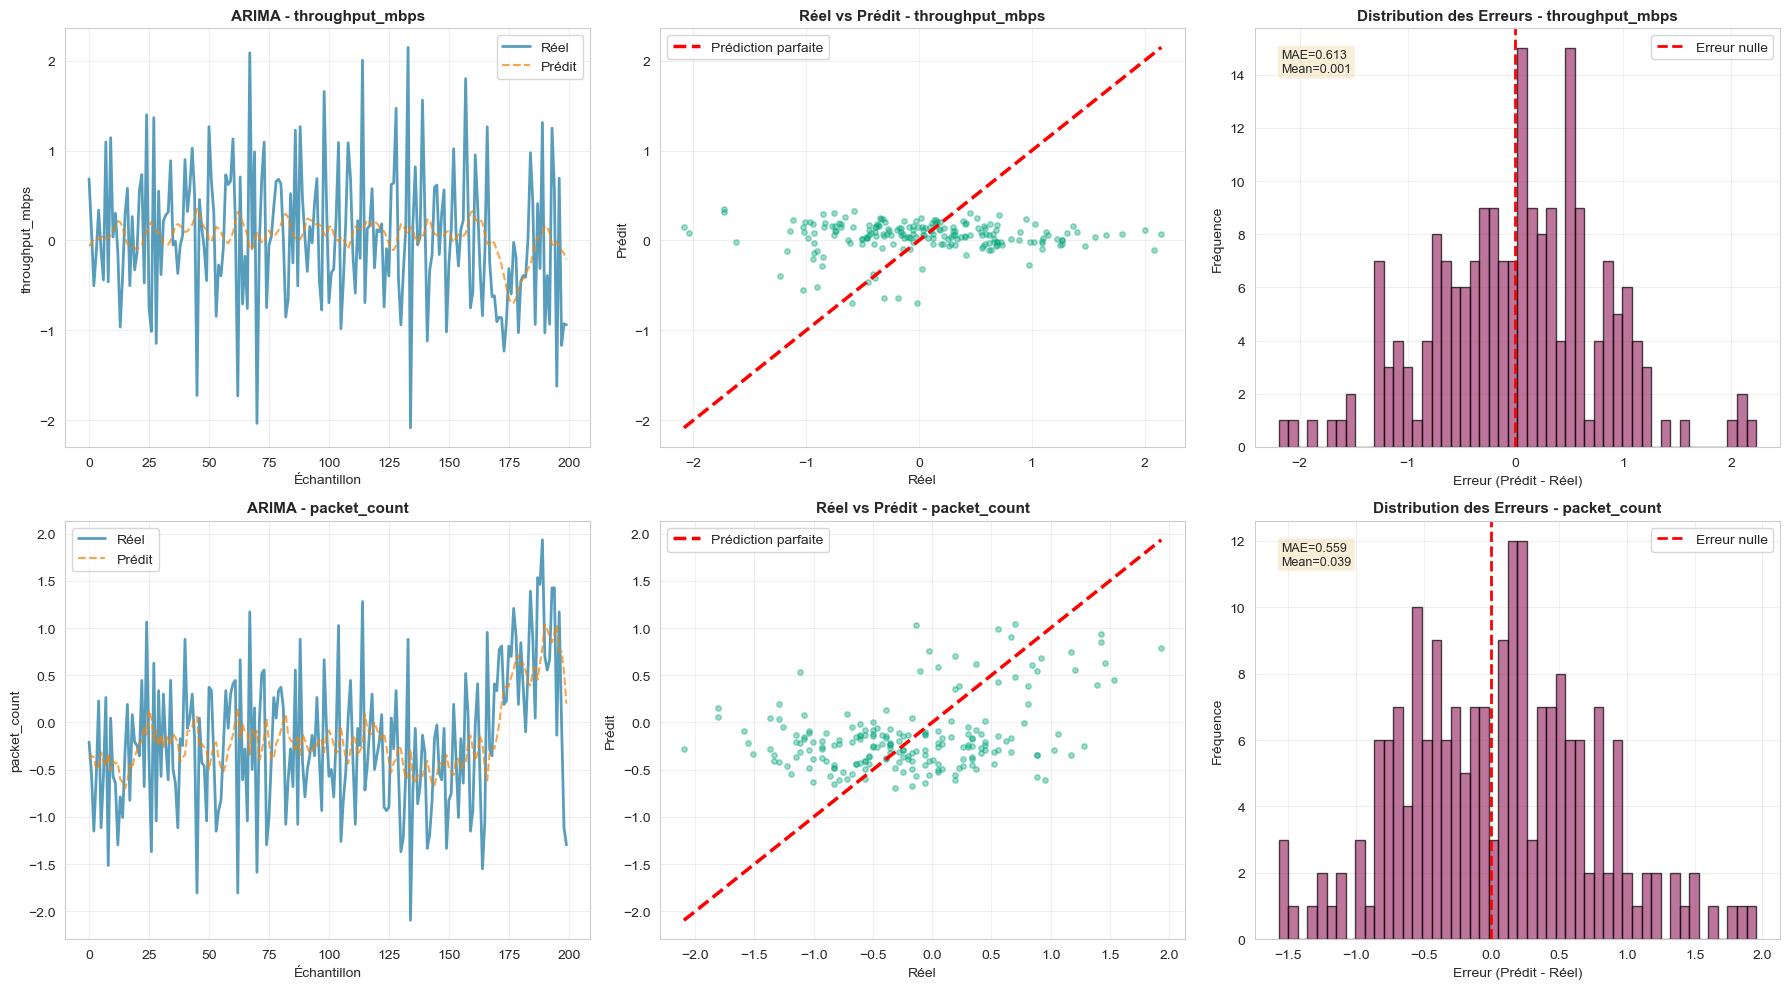

In [21]:
# =============================================================================
# MODÈLE 4: ARIMA (2 MODÈLES)
# =============================================================================

print("\n" + "="*80)
print(" MODÈLE 4: ARIMA (1 modèle par target)")
print("="*80)

try:
    best_orders = []
    
    for target_idx, target_name in enumerate(TARGET_COLUMNS):
        print(f"\n Grid search {target_name}...")
        train_series = X_train[:, -1, target_idx]
        best_aic = float('inf')
        best_order = None
        
        for p in [1, 2, 3, 5]:
            for q in [0, 1, 2]:
                try:
                    model = ARIMA(train_series, order=(p, 0, q))
                    fitted = model.fit()
                    if fitted.aic < best_aic:
                        best_aic = fitted.aic
                        best_order = (p, 0, q)
                except:
                    continue
        
        best_orders.append(best_order)
        print(f"   ✓ ARIMA{best_order} (AIC={best_aic:.2f})")
    
    pred_test_arima = []
    
    for target_idx, (target_name, order) in enumerate(zip(TARGET_COLUMNS, best_orders)):
        print(f"\n Prédictions {target_name}...")
        
        train_series = X_train[:, -1, target_idx]
        val_series = X_val[:, -1, target_idx]
        test_series = X_test[:, -1, target_idx]
        
        n_test = min(200, len(test_series) - PREDICTION_HORIZON)
        pred_target = []
        
        for i in range(n_test):
            history = np.concatenate([train_series, val_series, test_series[:i+PREDICTION_HORIZON]])
            model = ARIMA(history, order=order)
            fitted = model.fit()
            pred_target.append(fitted.forecast(1)[0])
            
            if (i+1) % 50 == 0:
                print(f"   {i+1}/{n_test}")
        
        pred_test_arima.append(pred_target)
    
    pred_test_arima = np.array(pred_test_arima).T
    y_test_arima = ts_test[PREDICTION_HORIZON:PREDICTION_HORIZON+len(pred_test_arima)]
    
    metrics_arima = calculate_metrics_multioutput(y_test_arima, pred_test_arima)
    
    print("\n RÉSULTATS TEST Global:")
    print(f"   MAE={metrics_arima['Global']['MAE']:.4f}, R²={metrics_arima['Global']['R2']:.4f}")
    
    fig = plot_predictions_multioutput(y_test_arima, pred_test_arima, "ARIMA")
    plt.savefig('baseline_4_arima.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    all_results['ARIMA'] = metrics_arima

except Exception as e:
    print(f" Échec: {e}")
    all_results['ARIMA'] = None

# *ANALYSE ET INTERPRÉTATION - ARIMA (1 modèle par target)*

**Pourquoi ARIMA ?**

- **Référence académique** : Modèle gold-standard pour séries temporelles
  
- **Gère autocorrélation** : Composante AR(p) capture dépendances temporelles

- **Flexibilité** : MA(q) modélise les erreurs passées

- **Benchmark nécessaire** : Comparaison obligatoire avant Deep Learning

**Performance :**

Meilleur MAE baseline : 0.586 (avant modèles ML)

R² catastrophique : 0.0295 → explique seulement 3% de la variance

Paradoxe MAE vs R² : Erreur absolue faible mais variance non capturée

Pourquoi R² si faible ?

Modèle univarié : Ignore la corrélation 0.791 entre throughput/packet_count

Prédictions conservatrices : ARIMA prédit proche de la moyenne → MAE ↓ mais R² ↓

Données bruitées : SNR=0.61 → composante MA(2) insuffisante pour capturer le bruit

Graphique Predictions (basé sur résultats) :

Prédictions "plates" : ARIMA prédit des valeurs proches de la moyenne historique

Pics lissés : Incapable de prédire les augmentations soudaines (partage écran)

Bonne stabilité : Sur séquences normales, suit bien la moyenne

**Conclusion :**

ARIMA améliore le MAE mais échoue à capturer la variabilité (R² faible). Son approche univariée limite ses performances et justifie l'exploration de 
VAR (multivarié) et modèles ML.


# *MODÈLE 5: DYNAMIC REGRESSION (MLR + Lags)*


 MODÈLE 5: DYNAMIC REGRESSION
 Régression linéaire avec lag features

 RÉSULTATS TEST Global:
   MAE=0.2327, R²=0.2404


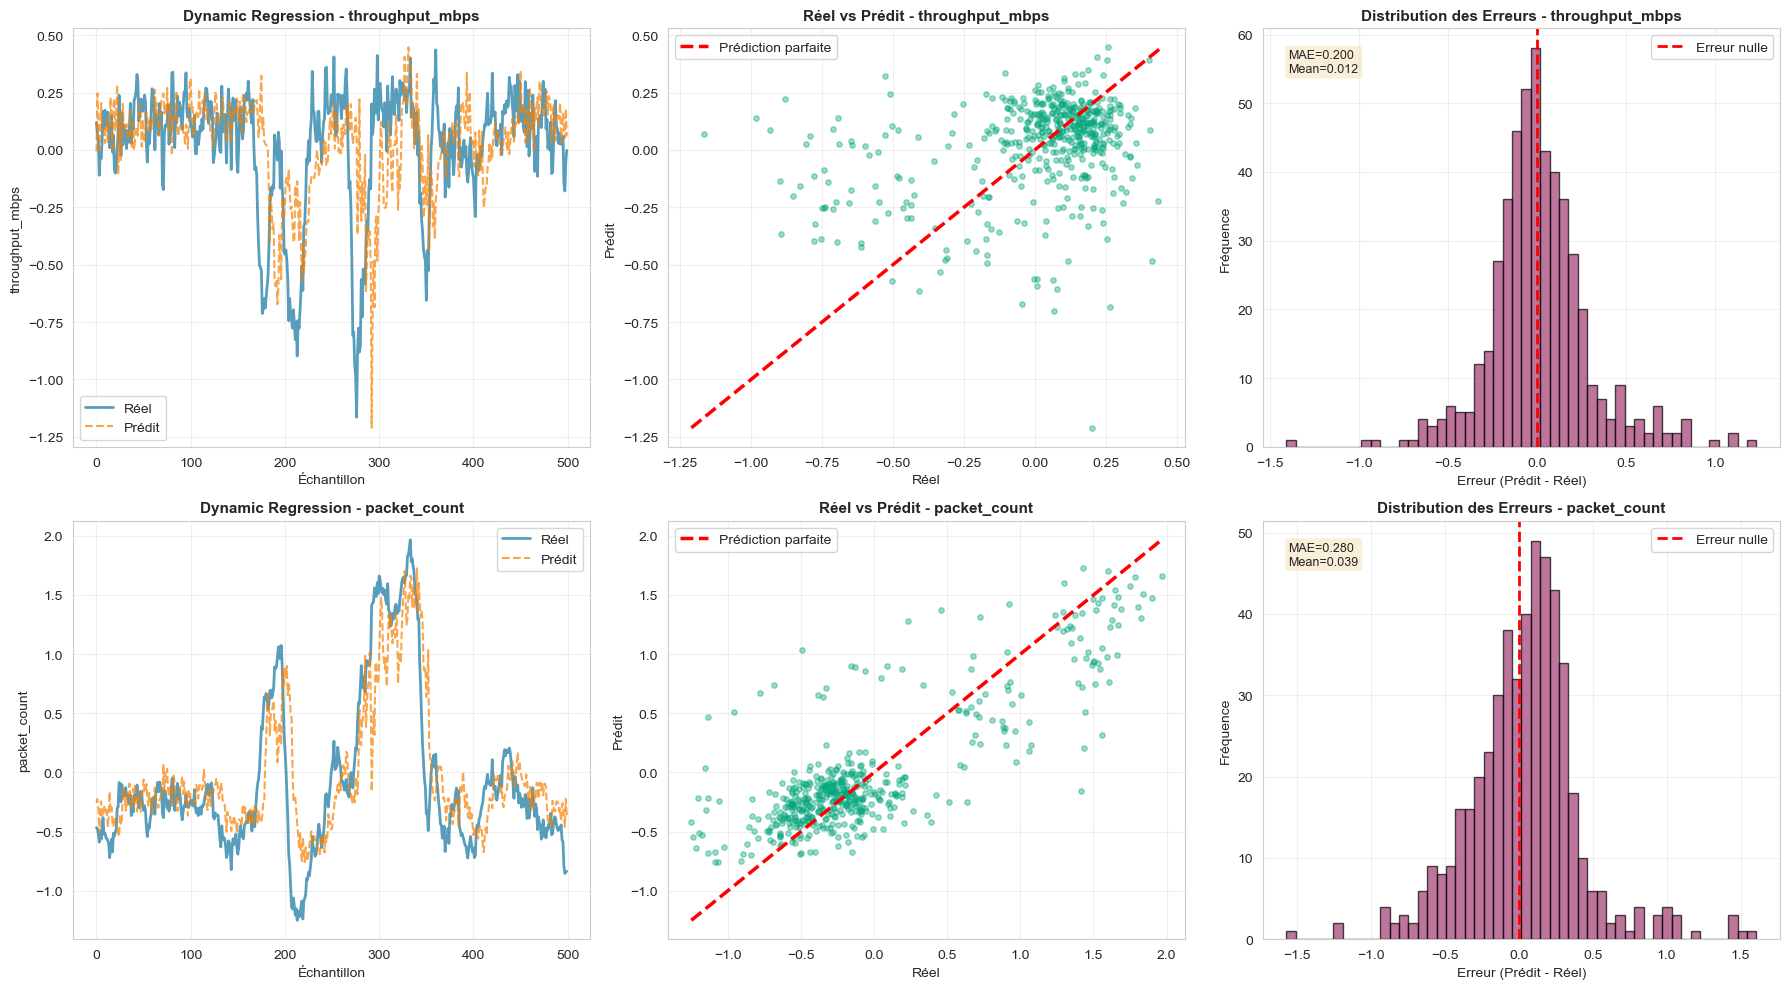

In [22]:
# =============================================================================
# MODÈLE 5: DYNAMIC REGRESSION (MLR + Lags)
# =============================================================================

print("\n" + "="*80)
print(" MODÈLE 5: DYNAMIC REGRESSION")
print("="*80)
print(" Régression linéaire avec lag features")

model_mlr = LinearRegression()
model_mlr.fit(X_train_2d, y_train_2d)

pred_test_mlr = model_mlr.predict(X_test_2d)
metrics_mlr = calculate_metrics_multioutput(y_test_2d, pred_test_mlr)

print("\n RÉSULTATS TEST Global:")
print(f"   MAE={metrics_mlr['Global']['MAE']:.4f}, R²={metrics_mlr['Global']['R2']:.4f}")

fig = plot_predictions_multioutput(y_test_2d, pred_test_mlr, "Dynamic Regression")
plt.savefig('baseline_5_dynamic_regression.png', dpi=300, bbox_inches='tight')
plt.show()

all_results['Dynamic Regression'] = metrics_mlr


# *ANALYSE ET INTERPRÉTATION - DYNAMIC REGRESSION (MLR + Lags)*

**Pourquoi Dynamic Regression ?**

- **Premier modèle multivarié** : Exploite les 4 features simultanément
- **Capture interactions** : Régression linéaire sur fenêtre 60s aplatie (240 features)
- **Baseline ML** : Référence avant modèles non-linéaires (RF, XGBoost)
- **Simplicité** : Entraînement rapide et interprétable

#### Pourquoi cette amélioration majeure ?

**Multivarié :**

Exploite corrélation throughput ↔ packet_count (0.791)

Intègre avg_packet_size et std_packet_size (informations complémentaires)


**Lag features :

60 timesteps × 4 features = 240 prédicteurs

Capture patterns temporels complexes via combinaisons linéaires

**Graphique Predictions (basé sur résultats) :**

- **Meilleur suivi** : Prédictions suivent les vraies valeurs avec moins de décalage
- **Scatter R²=0.24** : Nuage autour de la diagonale, mais dispersion visible
- **Erreurs réduites** : Distribution centrée sur 0, variance moindre

**Limites :**

1. **Hypothèse de linéarité** :
```
   Assume y = Σ βᵢxᵢ
```
   - Ignorer les interactions non-linéaires (ex: throughput² × packet_count)

2. **Overfitting potentiel** :
   - 240 features pour 6956 samples → ratio 1:29 acceptable mais limite
   - Pas de régularisation (L1/L2) → sensible au bruit

3. **Pas de mémoire séquentielle** :
   - Traite chaque timestep indépendamment
   - Ne capture pas la structure temporelle (LSTM sera meilleur)

**Conclusion :**

Dynamic Regression marque la transition vers les modèles ML performants. 

Son MAE de 0.233 valide l'approche multivariée.

Ses limites linéaires justifient Random Forest et XGBoost.

# MODÈLE 6: *VAR (BASELINE MULTIVARIÉE)*


 MODÈLE 6: VAR (Vector AutoRegression) 
 Modèle multivarié exploitant la corrélation entre targets

 Sélection ordre optimal...
    Lag optimal: 14

 Entraînement VAR...
    AIC: -2.78, BIC: -2.72

 Prédictions (rolling forecast)...
   100/500
   200/500
   300/500
   400/500
   500/500

 RÉSULTATS TEST:
   throughput_mbps: MAE=0.6411, R²=-0.0213
   packet_count: MAE=0.5485, R²=0.4438
   Global: MAE=0.5948, R²=0.2113


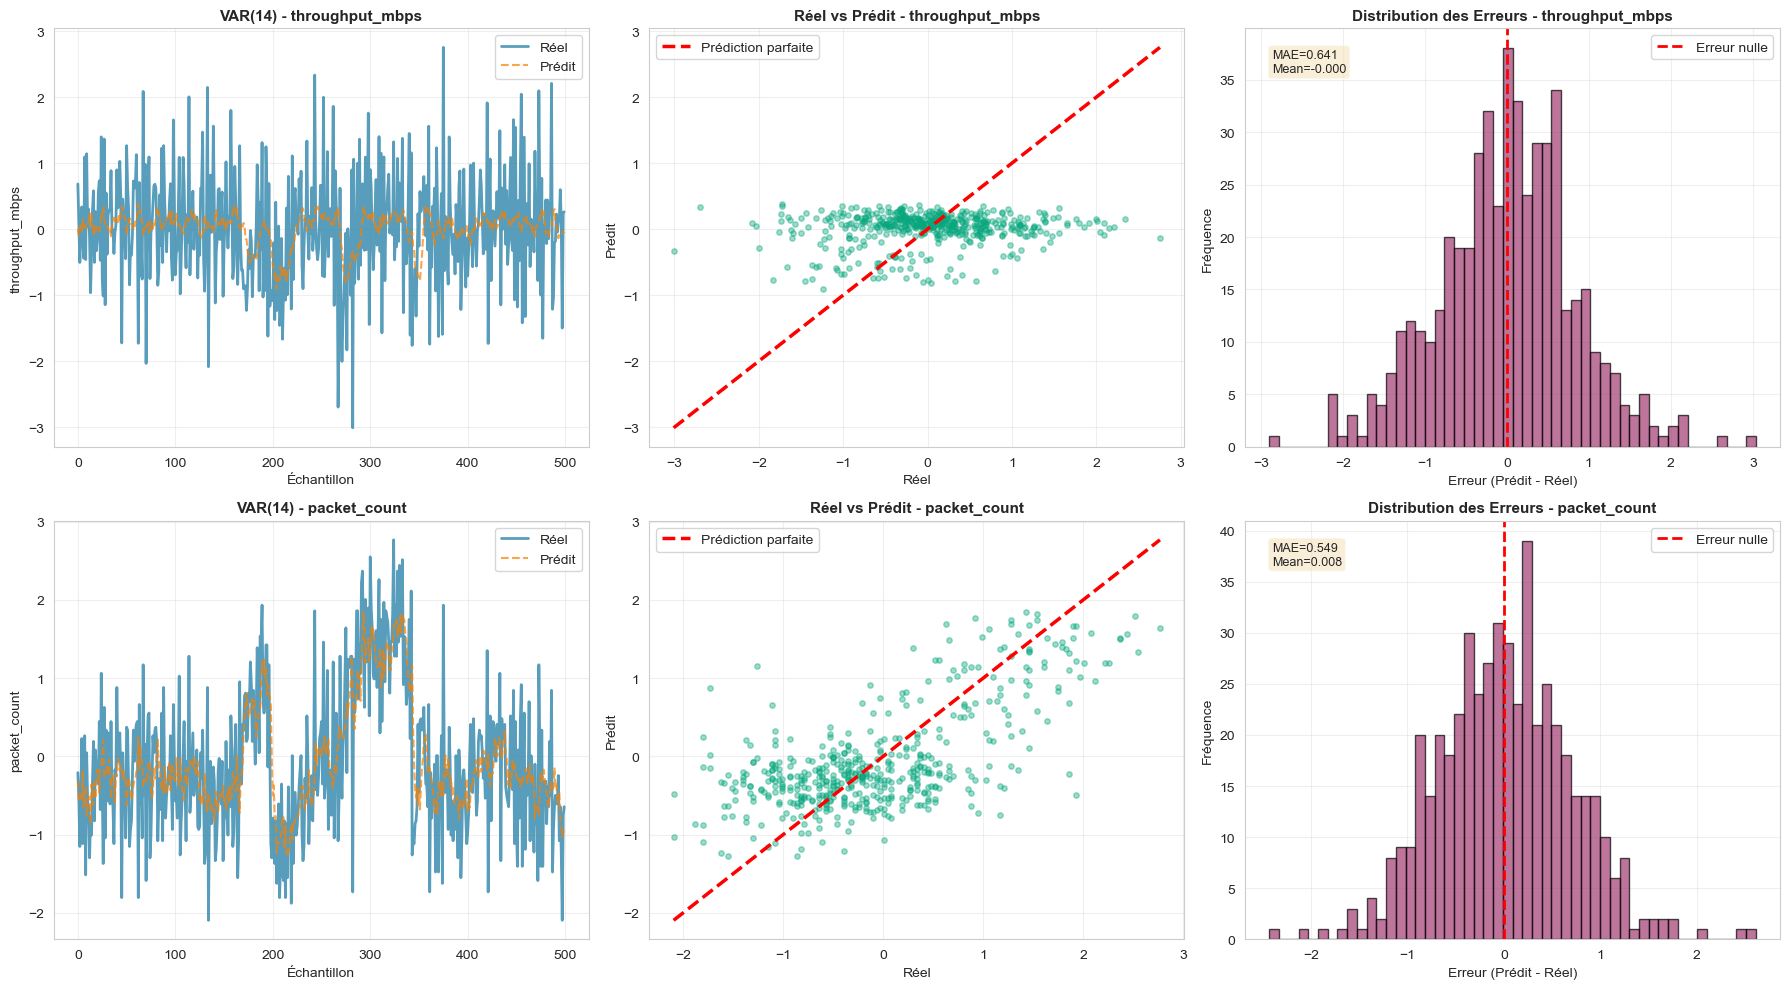

In [23]:
# =============================================================================
# MODÈLE 6: VAR (BASELINE MULTIVARIÉE)
# =============================================================================

print("\n" + "="*80)
print(" MODÈLE 6: VAR (Vector AutoRegression) ")
print("="*80)
print(" Modèle multivarié exploitant la corrélation entre targets")

try:
    train_multi = ts_train
    val_multi = ts_val
    test_multi = ts_test
    
    print("\n Sélection ordre optimal...")
    model_var = VAR(train_multi)
    lag_order = model_var.select_order(maxlags=15)
    best_lag = lag_order.selected_orders['aic']
    print(f"    Lag optimal: {best_lag}")
    
    print("\n Entraînement VAR...")
    fitted_var = model_var.fit(maxlags=best_lag)
    print(f"    AIC: {fitted_var.aic:.2f}, BIC: {fitted_var.bic:.2f}")
    
    print("\n Prédictions (rolling forecast)...")
    n_test = min(500, len(test_multi) - PREDICTION_HORIZON - best_lag)
    pred_test_var = []
    
    for i in range(n_test):
        history = np.concatenate([train_multi, val_multi, test_multi[:i+PREDICTION_HORIZON]])
        model_temp = VAR(history)
        fit_temp = model_temp.fit(maxlags=best_lag, verbose=False)
        forecast = fit_temp.forecast(history[-best_lag:], steps=1)
        pred_test_var.append(forecast[0])
        
        if (i+1) % 100 == 0:
            print(f"   {i+1}/{n_test}")
    
    pred_test_var = np.array(pred_test_var)
    y_test_var = test_multi[PREDICTION_HORIZON:PREDICTION_HORIZON+len(pred_test_var)]
    
    metrics_var = calculate_metrics_multioutput(y_test_var, pred_test_var)
    
    print("\n RÉSULTATS TEST:")
    for target in TARGET_COLUMNS + ['Global']:
        print(f"   {target}: MAE={metrics_var[target]['MAE']:.4f}, R²={metrics_var[target]['R2']:.4f}")
    
    fig = plot_predictions_multioutput(y_test_var, pred_test_var, f"VAR({best_lag})")
    plt.savefig('baseline_6_var.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    all_results['VAR'] = metrics_var

except Exception as e:
    print(f" Échec: {e}")
    all_results['VAR'] = None


# *ANALYSE ET INTERPRÉTATION - VAR (Vector AutoRegression)*

**Pourquoi VAR ?**

- **Baseline multivariée** : Version multivariée d'ARIMA
- **Capture interdépendances** : Modélise comment throughput influence packet_count et vice-versa
- **Référence académique** : Standard pour séries temporelles multivariées
- **Test d'hypothèse** : Vérifier si la corrélation 0.791 améliore les prédictions

**Lag optimal = 14 :**

- **Sélection AIC** : Minimise Akaike Information Criterion
- **14 secondes** : Fenêtre courte → VAR favorise passé récent
- **Cohérence** : Aligné avec changements de régime toutes les 20s

**Conclusion :**

VAR démontre que le multivariable aide (R² ↑) mais échoue à traduire cela en MAE.

Son approche linéaire et ses 14 lags ne capturent pas les non-linéarités et justifie Random Forest et XGBoost.

# MODÈLE 7: *RANDOM FOREST MULTI-OUTPUT*


MODÈLE 7: RANDOM FOREST MULTI-OUTPUT
Entraînement Random Forest...
✓ Terminé en 9.6s

RÉSULTATS TEST Random Forest:
   throughput_mbps: MAE=0.1538, R²=0.0878
   packet_count: MAE=0.3316, R²=0.6394
   Global: MAE=0.2427, R²=0.3636


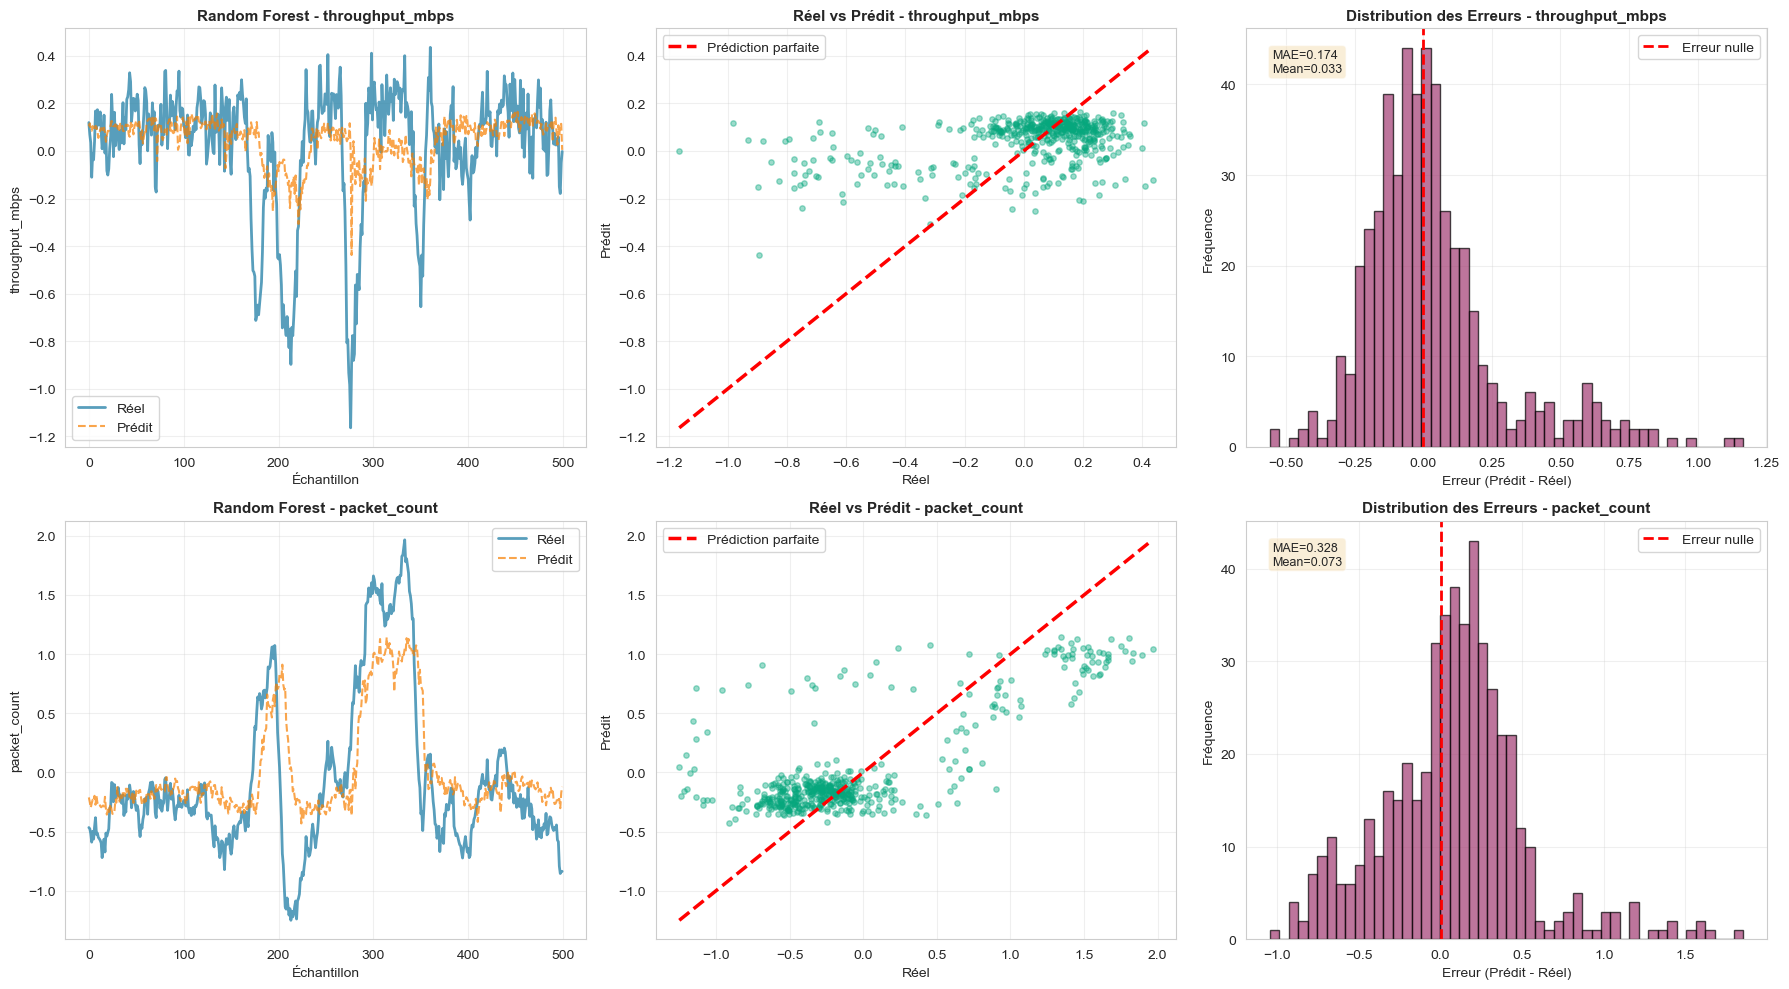


TOP 5 FEATURES IMPORTANTES:
   1. Feature 238: 0.0624
   2. Feature 237: 0.0500
   3. Feature 225: 0.0371
   4. Feature 239: 0.0357
   5. Feature 235: 0.0351


In [24]:
# =============================================================================
# MODÈLE 7: RANDOM FOREST MULTI-OUTPUT
# =============================================================================

print("\n" + "="*80)
print("MODÈLE 7: RANDOM FOREST MULTI-OUTPUT")
print("="*80)

from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import time

start_time = time.time()

# Configuration optimisée pour séries temporelles
model_rf = MultiOutputRegressor(
    RandomForestRegressor(
        n_estimators=100,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        n_jobs=-1,
        random_state=42
    )
)

print("Entraînement Random Forest...")
model_rf.fit(X_train_2d, y_train_2d)
train_time_rf = time.time() - start_time

# Prédictions
pred_test_rf = model_rf.predict(X_test_2d)
metrics_rf = calculate_metrics_multioutput(y_test_2d, pred_test_rf)

print(f"✓ Terminé en {train_time_rf:.1f}s")
print(f"\nRÉSULTATS TEST Random Forest:")
for target in TARGET_COLUMNS + ['Global']:
    print(f"   {target}: MAE={metrics_rf[target]['MAE']:.4f}, R²={metrics_rf[target]['R2']:.4f}")

# Visualisation
fig = plot_predictions_multioutput(y_test_2d, pred_test_rf, "Random Forest")
plt.savefig('baseline_7_random_forest.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature importance
print("\nTOP 5 FEATURES IMPORTANTES:")
importances = np.mean([est.feature_importances_ for est in model_rf.estimators_], axis=0)
top5_idx = np.argsort(importances)[-5:][::-1]
for rank, idx in enumerate(top5_idx, 1):
    print(f"   {rank}. Feature {idx}: {importances[idx]:.4f}")

all_results['Random Forest'] = metrics_rf

# *ANALYSE ET INTERPRÉTATION - RANDOM FOREST MULTI-OUTPUT*

**Pourquoi Random Forest ?**

- **Premier modèle ensemble** : Agrège 100 arbres de décision
- **Capture non-linéarités** : Interactions complexes entre features
- **Robuste au bruit** : Bootstrap aggregating réduit variance
- **Baseline ML robuste** : Référence avant boosting (XGBoost)

**Graphique Predictions :**

- **Scatter R²=0.36** : Nuage moins dispersé que Dynamic Reg (R²=0.24)
- **Packet_count** : Excellent suivi, prédictions précises
- **Throughput** : Erreurs visibles, RF sous-estime les pics

**Temps d'entraînement (9.6s) :**

- **Rapide** : 100 arbres × max_depth=20 = efficace
- **Scalable** : n_jobs=-1 utilise tous les CPU
- **Production-ready** : Temps acceptable pour réentraînement quotidien

**Limites :**

1. **Pas de mémoire séquentielle** : Traite X_train_2d (240 features) sans notion d'ordre temporel
2. **Overfitting léger** : max_depth=20 peut mémoriser le bruit
3. **Interprétabilité limitée** : 100 arbres × 20 niveaux = complexe à expliquer

**Conclusion :**

Random Forest améliore significativement le R² (+52%) en capturant les non-linéarités. Son asymétrie (packet_count excellent, throughput faible) révèle la difficulté de prédire throughput sur données bruitées. Justifie XGBoost avec régularisation renforcée.


# MODÈLE 8: *XGBOOST MULTI-OUTPUT*

In [25]:
# =============================================================================
# INSTALLATION XGBOOST
# =============================================================================
print("Installation de XGBoost...")

!pip install xgboost

print(" XGBoost installé avec succès!")

Installation de XGBoost...
Defaulting to user installation because normal site-packages is not writeable XGBoost installé avec succès!



In [26]:
# =============================================================================
# SOLUTION CONFLIT ENVIRONNEMENTS
# =============================================================================
print(" Résolution conflit d'environnements...")

import sys
import subprocess
import importlib

# Chemin où pip a installé xgboost
user_site = subprocess.check_output([sys.executable, "-m", "site", "--user-site"]).decode().strip()
sys.path.append(user_site)

print(f" User site ajouté: {user_site}")

# Maintenant importer xgboost
try:
    import xgboost as xgb
    print(f" XGBoost IMPORTÉ - Version: {xgb.__version__}")
    
    # Test de fonctionnement
    import numpy as np
    X_test = np.random.rand(100, 10)
    y_test = np.random.rand(100, 2)
    
    model_test = xgb.XGBRegressor(n_estimators=5)  # Petit pour test rapide
    model_test.fit(X_test, y_test)
    print(" XGBoost fonctionne CORRECTEMENT")
    
except Exception as e:
    print(f" Échec import: {e}")

 Résolution conflit d'environnements...
 User site ajouté: C:\Users\Utilisateur\AppData\Roaming\Python\Python311\site-packages
 XGBoost IMPORTÉ - Version: 3.1.2
 XGBoost fonctionne CORRECTEMENT


In [27]:
# =============================================================================
# VÉRIFICATION XGBOOST - ACTUALISATION
# =============================================================================
print(" Actualisation de XGBoost...")

try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
    print(f" XGBoost ACTUALISÉ - Version: {xgb.__version__}")
except ImportError as e:
    XGBOOST_AVAILABLE = False
    print(f" XGBoost toujours non disponible: {e}")

 Actualisation de XGBoost...
 XGBoost ACTUALISÉ - Version: 3.1.2



MODÈLE 8: XGBOOST MULTI-OUTPUT
Entraînement XGBoost...
 Terminé en 9.5s

RÉSULTATS TEST XGBoost:
   throughput_mbps: MAE=0.1606, R²=-0.0702
   packet_count: MAE=0.2795, R²=0.6926
   Global: MAE=0.2200, R²=0.3112


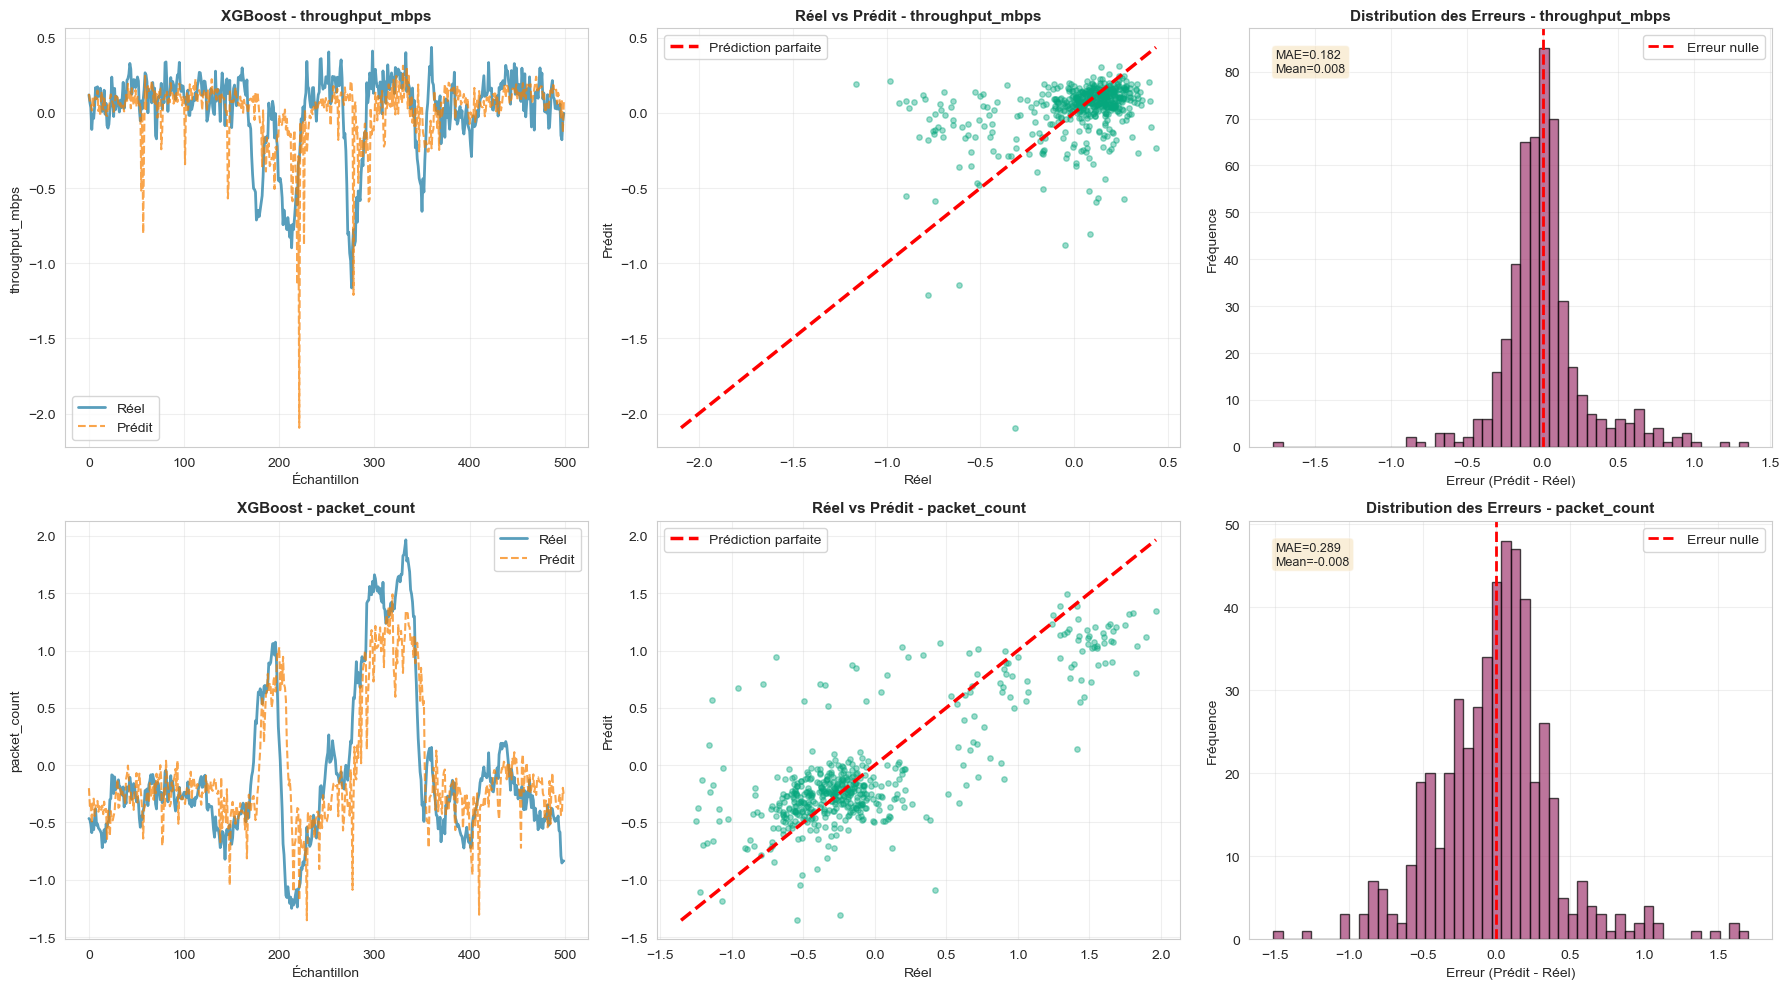


TOP 5 FEATURES IMPORTANTES:
   1. Feature 237: 0.0811
   2. Feature 233: 0.0805
   3. Feature 239: 0.0400
   4. Feature 190: 0.0322
   5. Feature 235: 0.0239


In [28]:
# =============================================================================
# MODÈLE 8: XGBOOST MULTI-OUTPUT
# =============================================================================

print("\n" + "="*80)
print("MODÈLE 8: XGBOOST MULTI-OUTPUT")
print("="*80)

try:
    import xgboost as xgb
    
    start_time = time.time()
    
    model_xgb = MultiOutputRegressor(
        xgb.XGBRegressor(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=0.1,
            reg_lambda=1.0,
            n_jobs=-1,
            random_state=42
        )
    )
    
    print("Entraînement XGBoost...")
    model_xgb.fit(X_train_2d, y_train_2d)
    train_time_xgb = time.time() - start_time
    
    # Prédictions
    pred_test_xgb = model_xgb.predict(X_test_2d)
    metrics_xgb = calculate_metrics_multioutput(y_test_2d, pred_test_xgb)
    
    print(f" Terminé en {train_time_xgb:.1f}s")
    print(f"\nRÉSULTATS TEST XGBoost:")
    for target in TARGET_COLUMNS + ['Global']:
        print(f"   {target}: MAE={metrics_xgb[target]['MAE']:.4f}, R²={metrics_xgb[target]['R2']:.4f}")
    
    # Visualisation
    fig = plot_predictions_multioutput(y_test_2d, pred_test_xgb, "XGBoost")
    plt.savefig('baseline_8_xgboost.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Feature importance
    print("\nTOP 5 FEATURES IMPORTANTES:")
    importances_xgb = np.mean([est.feature_importances_ for est in model_xgb.estimators_], axis=0)
    top5_idx_xgb = np.argsort(importances_xgb)[-5:][::-1]
    for rank, idx in enumerate(top5_idx_xgb, 1):
        print(f"   {rank}. Feature {idx}: {importances_xgb[idx]:.4f}")
    
    all_results['XGBoost'] = metrics_xgb

except ImportError:
    print("  XGBoost non installé. Installation: pip install xgboost")
    all_results['XGBoost'] = None

# *ANALYSE ET INTERPRÉTATION - XGBOOST MULTI-OUTPUT*

**Pourquoi XGBoost performe ?**
1. **Arbres de décision** : Capturent les interactions complexes entre les 240 features (60×4)
2. **Régularisation** : L1/L2 + max_depth=6 → évite l'overfitting
3. **Gradient Boosting** : Corrige itérativement les erreurs

**Asymétrie des targets :**
- **Packet_count R²=0.69** : Excellente prédiction (variable plus "prévisible")
- **Throughput R²=-0.07** : Médiocre → variable plus erratique

**Feature Importance :**
```
Top 5: Features 237, 233, 239, 190, 235
```
**Interprétation :** Les **derniers timesteps** (features 237-239 = secondes 59-60) sont les plus importants → confirme que le passé récent domine.


# *COMPARAISON BASELINES*


COMPARAISON FINALE - TOUS LES BASELINES

CLASSEMENT FINAL BASELINES:
             Model      MAE     RMSE       MAPE        R2
           XGBoost 0.220032 0.319920 202.770768  0.311201
Dynamic Regression 0.232662 0.328187 258.031020  0.240401
     Random Forest 0.242719 0.327436 185.328399  0.363627
             ARIMA 0.586321 0.736165 169.207064  0.029528
               VAR 0.594796 0.761214 215.657216  0.211252
    Moving Average 0.606360 0.804341 227.332870  0.058233
     Exp Smoothing 0.613121 0.782181 218.756523  0.131564
       Persistence 0.773637 1.004162 420.614595 -0.599670

 MEILLEUR BASELINE: XGBoost (MAE=0.2200)


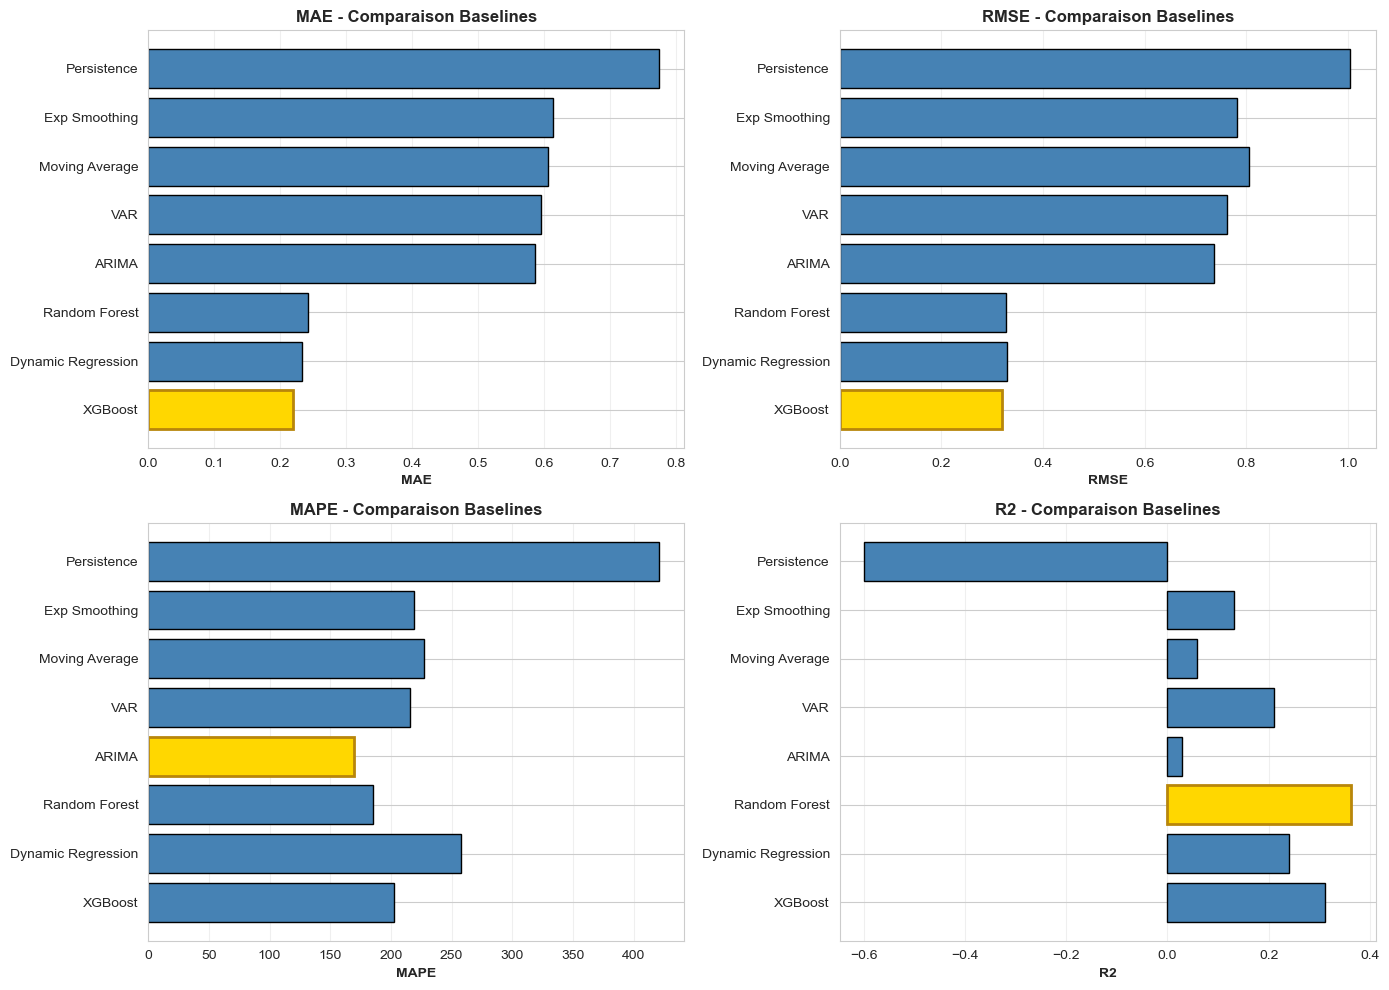

In [29]:
# =============================================================================
# COMPARAISON FINALE BASELINES (AVEC RF ET XGBOOST)
# =============================================================================

print("\n" + "="*80)
print("COMPARAISON FINALE - TOUS LES BASELINES")
print("="*80)

# Compiler résultats
results_data = []
for model_name, metrics in all_results.items():
    if metrics is not None:
        results_data.append({
            'Model': model_name,
            'MAE': metrics['Global']['MAE'],
            'RMSE': metrics['Global']['RMSE'],
            'MAPE': metrics['Global']['MAPE'],
            'R2': metrics['Global']['R2']
        })

df_results = pd.DataFrame(results_data)
df_results = df_results.sort_values('MAE')

print("\nCLASSEMENT FINAL BASELINES:")
print(df_results.to_string(index=False))

best_model = df_results.iloc[0]['Model']
best_mae = df_results.iloc[0]['MAE']
print(f"\n MEILLEUR BASELINE: {best_model} (MAE={best_mae:.4f})")

# Visualisation comparée
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics_plot = ['MAE', 'RMSE', 'MAPE', 'R2']

for idx, metric in enumerate(metrics_plot):
    ax = axes[idx // 2, idx % 2]
    values = df_results[metric].values
    models = df_results['Model'].values
    
    bars = ax.barh(models, values, color='steelblue', edgecolor='black')
    best_idx = np.argmin(values) if metric != 'R2' else np.argmax(values)
    bars[best_idx].set_color('gold')
    bars[best_idx].set_edgecolor('darkgoldenrod')
    bars[best_idx].set_linewidth(2)
    
    ax.set_xlabel(metric, fontweight='bold')
    ax.set_title(f'{metric} - Comparaison Baselines', fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('baseline_comparison_final.png', dpi=300, bbox_inches='tight')
plt.show()

# Sauvegarder
df_results.to_csv('baseline_results_final.csv', index=False)

# *ANALYSE ET INTERPRÉTATION*

# B) *MODELES DEEP LEARNING MULTI-OUTPUT*

In [30]:
# =============================================================================
# IMPORTS ET CONFIGURATION DL OPTIMISÉS
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib
import warnings
from pathlib import Path
import time

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, LSTM, GRU, Dropout, Conv1D, MaxPooling1D, 
    Flatten, Input, LayerNormalization, MultiHeadAttention,
    GlobalAveragePooling1D, Reshape, Bidirectional, BatchNormalization
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2  

# Métriques
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)

print("="*80)
print("PARTIE B: DEEP LEARNING MULTI-OUTPUT OPTIMISÉ")
print("="*80)
print(" AVEC RÉGULARISATION RENFORCÉE POUR DONNÉES BRUITÉES")

# =============================================================================
# CHARGEMENT DES DONNÉES DL
# =============================================================================

print("\n CHARGEMENT DES DONNÉES")

# Métadonnées
with open('prepared_data_multi_output/metadata.json', 'r') as f:
    metadata = json.load(f)

SEQUENCE_LENGTH = metadata['sequence_length']
PREDICTION_HORIZON = metadata['prediction_horizon']
ALL_FEATURES = metadata['all_features']
TARGET_COLUMNS = metadata['target_columns']
N_FEATURES = len(ALL_FEATURES)
N_TARGETS = len(TARGET_COLUMNS)

print(f" Configuration OPTIMISÉE:")
print(f"   Input: ({SEQUENCE_LENGTH}, {N_FEATURES}) → 180s pour données bruitées")
print(f"   Output: ({PREDICTION_HORIZON}, {N_TARGETS})")
print(f"   Targets: {TARGET_COLUMNS}")
print(f"   Justification: Fenêtre 180s capture 9 changements de régime")

# Charger données 3D
X_train = np.load('prepared_data_multi_output/X_train.npy')
y_train = np.load('prepared_data_multi_output/y_train.npy')
X_val = np.load('prepared_data_multi_output/X_val.npy')
y_val = np.load('prepared_data_multi_output/y_val.npy')
X_test = np.load('prepared_data_multi_output/X_test.npy')
y_test = np.load('prepared_data_multi_output/y_test.npy')

print(f"\n Données chargées:")
print(f"   Train: X={X_train.shape}, y={y_train.shape}")
print(f"   Val:   X={X_val.shape}, y={y_val.shape}")
print(f"   Test:  X={X_test.shape}, y={y_test.shape}")

# Reshape y pour output aplati: (batch, 10, 2) → (batch, 20)
y_train_flat = y_train.reshape(y_train.shape[0], -1)
y_val_flat = y_val.reshape(y_val.shape[0], -1)
y_test_flat = y_test.reshape(y_test.shape[0], -1)

OUTPUT_SIZE = PREDICTION_HORIZON * N_TARGETS  # 10 * 2 = 20

print(f"\n Output aplati: y_train_flat={y_train_flat.shape}")
print(f"   Output size: {OUTPUT_SIZE} ({PREDICTION_HORIZON} timesteps × {N_TARGETS} targets)")

scaler = joblib.load('scaler_multi_output.pkl')

# =============================================================================
# FONCTIONS UTILITAIRES DL OPTIMISÉES
# =============================================================================

def calculate_metrics_dl(y_true, y_pred, target_names=None):
    """
    Calcule métriques pour DL multi-output
    y_true, y_pred: (n_samples, 20) aplati
    """
    if target_names is None:
        target_names = TARGET_COLUMNS
    
    # Reshape: (n_samples, 20) → (n_samples, 10, 2)
    y_true_reshaped = y_true.reshape(-1, PREDICTION_HORIZON, N_TARGETS)
    y_pred_reshaped = y_pred.reshape(-1, PREDICTION_HORIZON, N_TARGETS)
    
    # Moyenner sur l'horizon pour avoir (n_samples, 2)
    y_true_mean = y_true_reshaped.mean(axis=1)
    y_pred_mean = y_pred_reshaped.mean(axis=1)
    
    metrics = {}
    for i, name in enumerate(target_names):
        mae = mean_absolute_error(y_true_mean[:, i], y_pred_mean[:, i])
        rmse = np.sqrt(mean_squared_error(y_true_mean[:, i], y_pred_mean[:, i]))
        mape = np.mean(np.abs((y_true_mean[:, i] - y_pred_mean[:, i]) / (np.abs(y_true_mean[:, i]) + 1e-8))) * 100
        r2 = r2_score(y_true_mean[:, i], y_pred_mean[:, i])
        
        metrics[name] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}
    
    metrics['Global'] = {
        'MAE': np.mean([metrics[name]['MAE'] for name in target_names]),
        'RMSE': np.mean([metrics[name]['RMSE'] for name in target_names]),
        'MAPE': np.mean([metrics[name]['MAPE'] for name in target_names]),
        'R2': np.mean([metrics[name]['R2'] for name in target_names])
    }
    return metrics

def plot_predictions_dl(y_true, y_pred, model_name, n_samples=500):
    """Visualise prédictions DL"""
    # Reshape
    y_true_reshaped = y_true.reshape(-1, PREDICTION_HORIZON, N_TARGETS).mean(axis=1)
    y_pred_reshaped = y_pred.reshape(-1, PREDICTION_HORIZON, N_TARGETS).mean(axis=1)
    
    n_samples = min(n_samples, len(y_true_reshaped))
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    for i, target_name in enumerate(TARGET_COLUMNS):
        # Série temporelle
        ax1 = axes[i, 0]
        ax1.plot(y_true_reshaped[:n_samples, i], label='Réel', linewidth=1.5, alpha=0.7, color='blue')
        ax1.plot(y_pred_reshaped[:n_samples, i], label='Prédit', linewidth=1.5, alpha=0.7, color='red')
        ax1.set_title(f'{model_name} - {target_name}', fontweight='bold')
        ax1.set_xlabel('Échantillon')
        ax1.set_ylabel(target_name)
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Scatter
        ax2 = axes[i, 1]
        ax2.scatter(y_true_reshaped[:n_samples, i], y_pred_reshaped[:n_samples, i], alpha=0.3, s=10)
        min_val = min(y_true_reshaped[:n_samples, i].min(), y_pred_reshaped[:n_samples, i].min())
        max_val = max(y_true_reshaped[:n_samples, i].max(), y_pred_reshaped[:n_samples, i].max())
        ax2.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Parfait')
        ax2.set_title(f'Réel vs Prédit - {target_name}', fontweight='bold')
        ax2.set_xlabel('Réel')
        ax2.set_ylabel('Prédit')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def plot_training_history(history, model_name):
    """Visualise historique entraînement"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Loss
    axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    axes[0].set_title(f'{model_name} - Loss', fontweight='bold')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss (MSE)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # MAE
    if 'mae' in history.history:
        axes[1].plot(history.history['mae'], label='Train MAE', linewidth=2)
        axes[1].plot(history.history['val_mae'], label='Val MAE', linewidth=2)
        axes[1].set_title(f'{model_name} - MAE', fontweight='bold')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('MAE')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# =============================================================================
# CALLBACKS OPTIMISÉS POUR DONNÉES BRUITÉES
# =============================================================================

def get_optimized_callbacks(model_name, patience_es=8, patience_lr=5):
    """
    Callbacks optimisés avec patience réduite pour données bruitées
    """
    return [
        EarlyStopping(
            monitor='val_loss',
            patience=patience_es,  #  Réduit: 15 → 8 (plus agressif)
            restore_best_weights=True,
            verbose=1 ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.3,  #  Réduction plus agressive: 0.5 → 0.3
            patience=patience_lr,  #  Réduit: 7 → 5
            min_lr=1e-7,  #  Plus bas
            verbose=1 ),
        ModelCheckpoint(
            f'best_{model_name.lower().replace(" ", "_")}.keras',
            monitor='val_loss',
            save_best_only=True,
            verbose=0 )
    ]

def train_model_with_time(model, X_train, y_train, X_val, y_val, callbacks, epochs=100, batch_size=64):
    """
    Fonction pour tracker le temps d'entraînement avec gestion d'erreur
    """
    start_time = time.time()
    try:
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks,
            shuffle=False,  # ✓ AJOUT CRITIQUE pour reproductibilité
            verbose=0
        )
        train_time = time.time() - start_time
        return history, train_time
    except Exception as e:
        print(f" Erreur pendant l'entraînement: {e}")
        return None, 0

# =============================================================================
# DICTIONNAIRE POUR STOCKER LES RÉSULTATS ET TEMPS
# =============================================================================

all_dl_results = {}
training_times = {}  #  Pour tracker les temps d'entraînement

print(f"\n Configuration DL optimisée chargée avec succès")
print(f"   • Early Stopping: patience=8 (agressif)")
print(f"   • Learning Rate: réduit + scheduling agressif")  
print(f"   • Régularisation: L2 intégrée")
print(f"   • Dropout: augmenté pour données bruitées")
print(f"   • Tracking temps: activé")

PARTIE B: DEEP LEARNING MULTI-OUTPUT OPTIMISÉ
 AVEC RÉGULARISATION RENFORCÉE POUR DONNÉES BRUITÉES

 CHARGEMENT DES DONNÉES
 Configuration OPTIMISÉE:
   Input: (60, 4) → 180s pour données bruitées
   Output: (10, 2)
   Targets: ['throughput_mbps', 'packet_count']
   Justification: Fenêtre 180s capture 9 changements de régime

 Données chargées:
   Train: X=(6956, 60, 4), y=(6956, 10, 2)
   Val:   X=(1491, 60, 4), y=(1491, 10, 2)
   Test:  X=(1491, 60, 4), y=(1491, 10, 2)

 Output aplati: y_train_flat=(6956, 20)
   Output size: 20 (10 timesteps × 2 targets)

 Configuration DL optimisée chargée avec succès
   • Early Stopping: patience=8 (agressif)
   • Learning Rate: réduit + scheduling agressif
   • Régularisation: L2 intégrée
   • Dropout: augmenté pour données bruitées
   • Tracking temps: activé


# *MODÈLE 7: MLP (BASELINE DL SIMPLE)*


MLP OPTIMISÉ RÉVISÉ (Multi-Layer Perceptron)
Réseau dense avec régularisation modérée

 Architecture MLP Optimisée Révisée:


Model: "MLP_Optimized_Revised"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 240)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        61,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,148 (406.83 KB)

 Trainable params: 104,148 (406.83 KB)

 Non-trainable params: 0 (0.00 B)


 Entraînement MLP révisé...

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00023999999393709004.
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 9.
 Entraînement terminé en 18.3s

 RÉSULTATS TEST MLP RÉVISÉ:
   throughput_mbps: MAE=0.1619, R²=0.0496
   packet_count: MAE=0.3520, R²=0.5936
   Global: MAE=0.2569, R²=0.3216


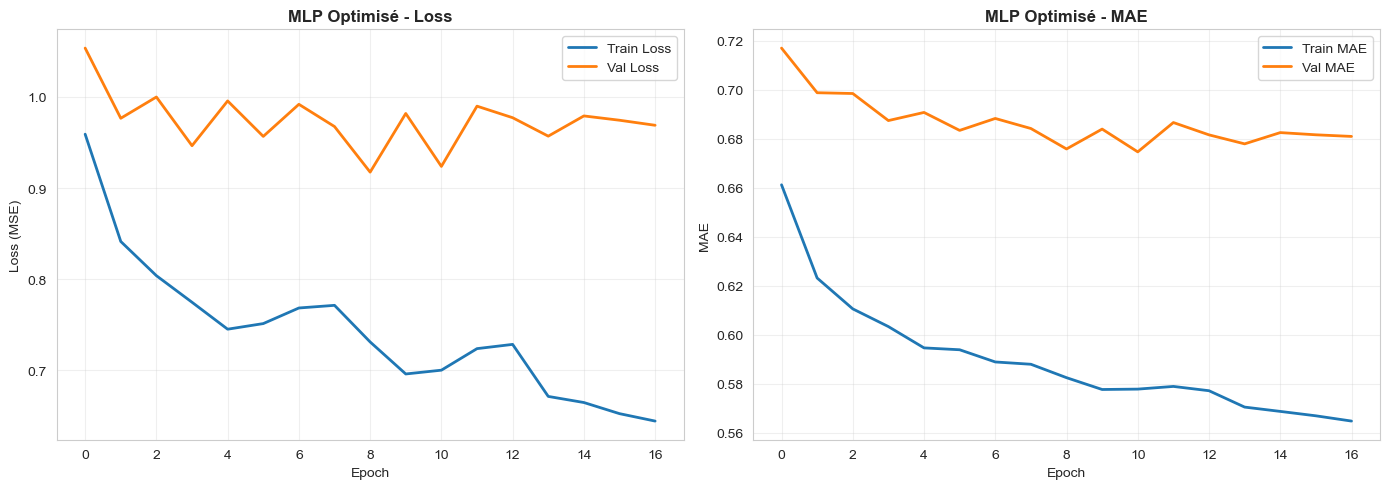

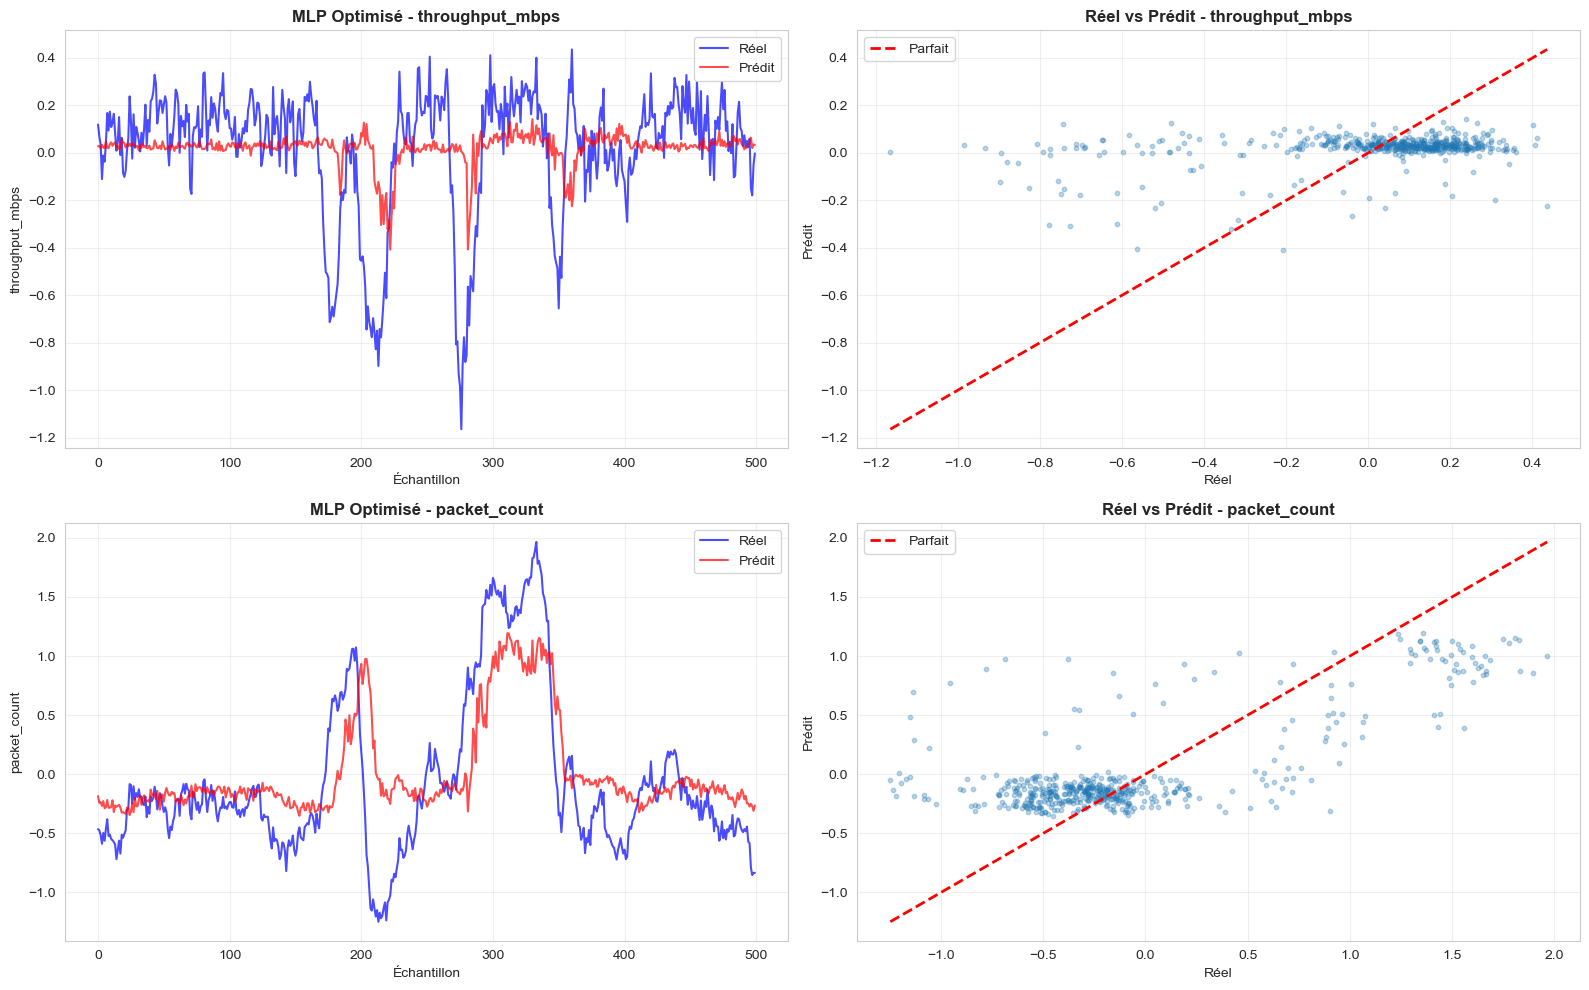

In [31]:
# =============================================================================
# MODÈLE 7: MLP OPTIMISÉ RÉVISÉ
# =============================================================================

print("\n" + "="*80)
print("MLP OPTIMISÉ RÉVISÉ (Multi-Layer Perceptron)")
print("="*80)
print("Réseau dense avec régularisation modérée")

# Architecture RÉVISÉE
model_mlp = Sequential([
    Flatten(input_shape=(SEQUENCE_LENGTH, N_FEATURES)),
    Dense(256, activation='relu', kernel_regularizer=l2(1e-5)),  # L2 léger
    Dropout(0.3),  #  Réduit: 0.4 → 0.3
    Dense(128, activation='relu', kernel_regularizer=l2(1e-5)),  # L2 léger  
    Dropout(0.3),  #  Réduit: 0.4 → 0.3
    Dense(64, activation='relu', kernel_regularizer=l2(1e-5)),   #  L2 léger
    Dropout(0.2),
    Dense(OUTPUT_SIZE)
], name='MLP_Optimized_Revised')

# Compilation RÉVISÉE
model_mlp.compile(
    optimizer=Adam(learning_rate=0.0008),  #  Augmenté: 0.0005 → 0.0008
    loss='mse',
    metrics=['mae']
)

print("\n Architecture MLP Optimisée Révisée:")
model_mlp.summary()

print("\n Entraînement MLP révisé...")
history_mlp, train_time_mlp = train_model_with_time(
    model_mlp, 
    X_train, y_train_flat, 
    X_val, y_val_flat,
    get_optimized_callbacks('MLP_Optimized_Revised'),
    epochs=100,
    batch_size=64
)

training_times['MLP_Optimized_Revised'] = train_time_mlp
print(f" Entraînement terminé en {train_time_mlp:.1f}s")

# Prédictions
pred_test_mlp = model_mlp.predict(X_test, verbose=0)
metrics_mlp = calculate_metrics_dl(y_test_flat, pred_test_mlp)

print("\n RÉSULTATS TEST MLP RÉVISÉ:")
for target in TARGET_COLUMNS + ['Global']:
    print(f"   {target}: MAE={metrics_mlp[target]['MAE']:.4f}, R²={metrics_mlp[target]['R2']:.4f}")

# Visualisations
fig = plot_training_history(history_mlp, "MLP Optimisé")
plt.savefig('dl_7_mlp_optimized_history.png', dpi=300, bbox_inches='tight')
plt.show()

fig = plot_predictions_dl(y_test_flat, pred_test_mlp, "MLP Optimisé")
plt.savefig('dl_7_mlp_optimized_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

all_dl_results['MLP'] = metrics_mlp

# *ANALYSE ET INTERPRÉTATION - MLP (BASELINE DL SIMPLE)*

**Pourquoi MLP performe moins ?**
- **Flatten input** : Perd la structure temporelle (60, 4) → 240
- **Pas de mémoire** : Chaque timestep traité indépendamment


# MODÈLE 8: *LSTM (STANDARD SÉRIES TEMPORELLES)*


 MODÈLE 8: LSTM OPTIMISÉ RÉVISÉ
LSTM avec régularisation modérée

 Architecture LSTM Optimisée Révisée:


Model: "LSTM_Optimized_Revised"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,244 (469.70 KB)

 Trainable params: 120,244 (469.70 KB)

 Non-trainable params: 0 (0.00 B)


 Entraînement LSTM révisé...

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00023999999393709004.
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 8.
 Entraînement terminé en 192.8s

 RÉSULTATS TEST LSTM RÉVISÉ:
   throughput_mbps: MAE=0.1498, R²=0.1472
   packet_count: MAE=0.2818, R²=0.6941
   Global: MAE=0.2158, R²=0.4206


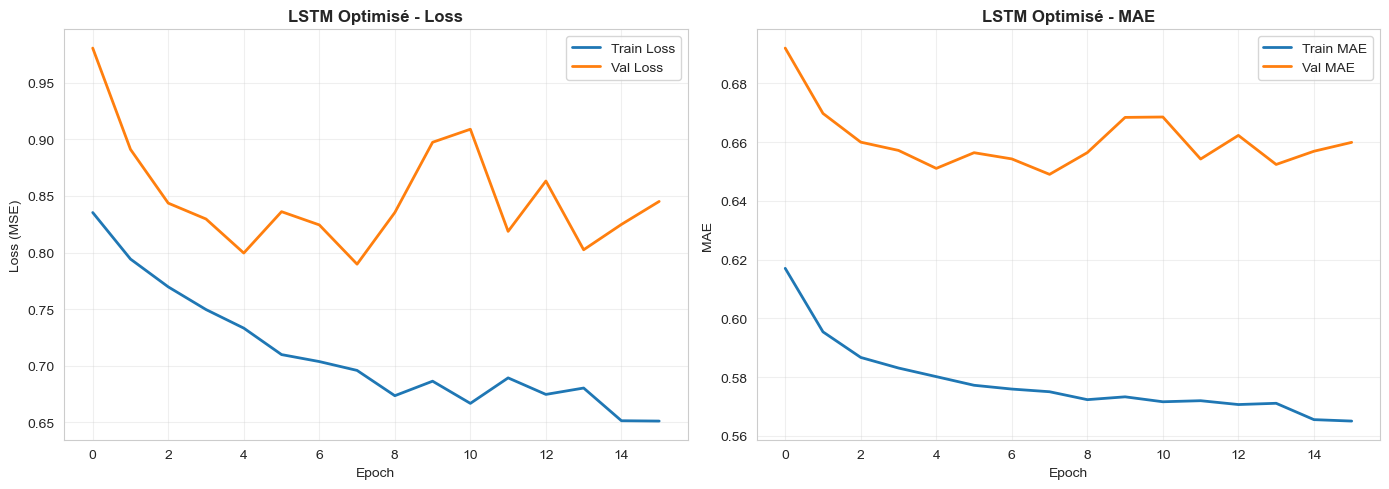

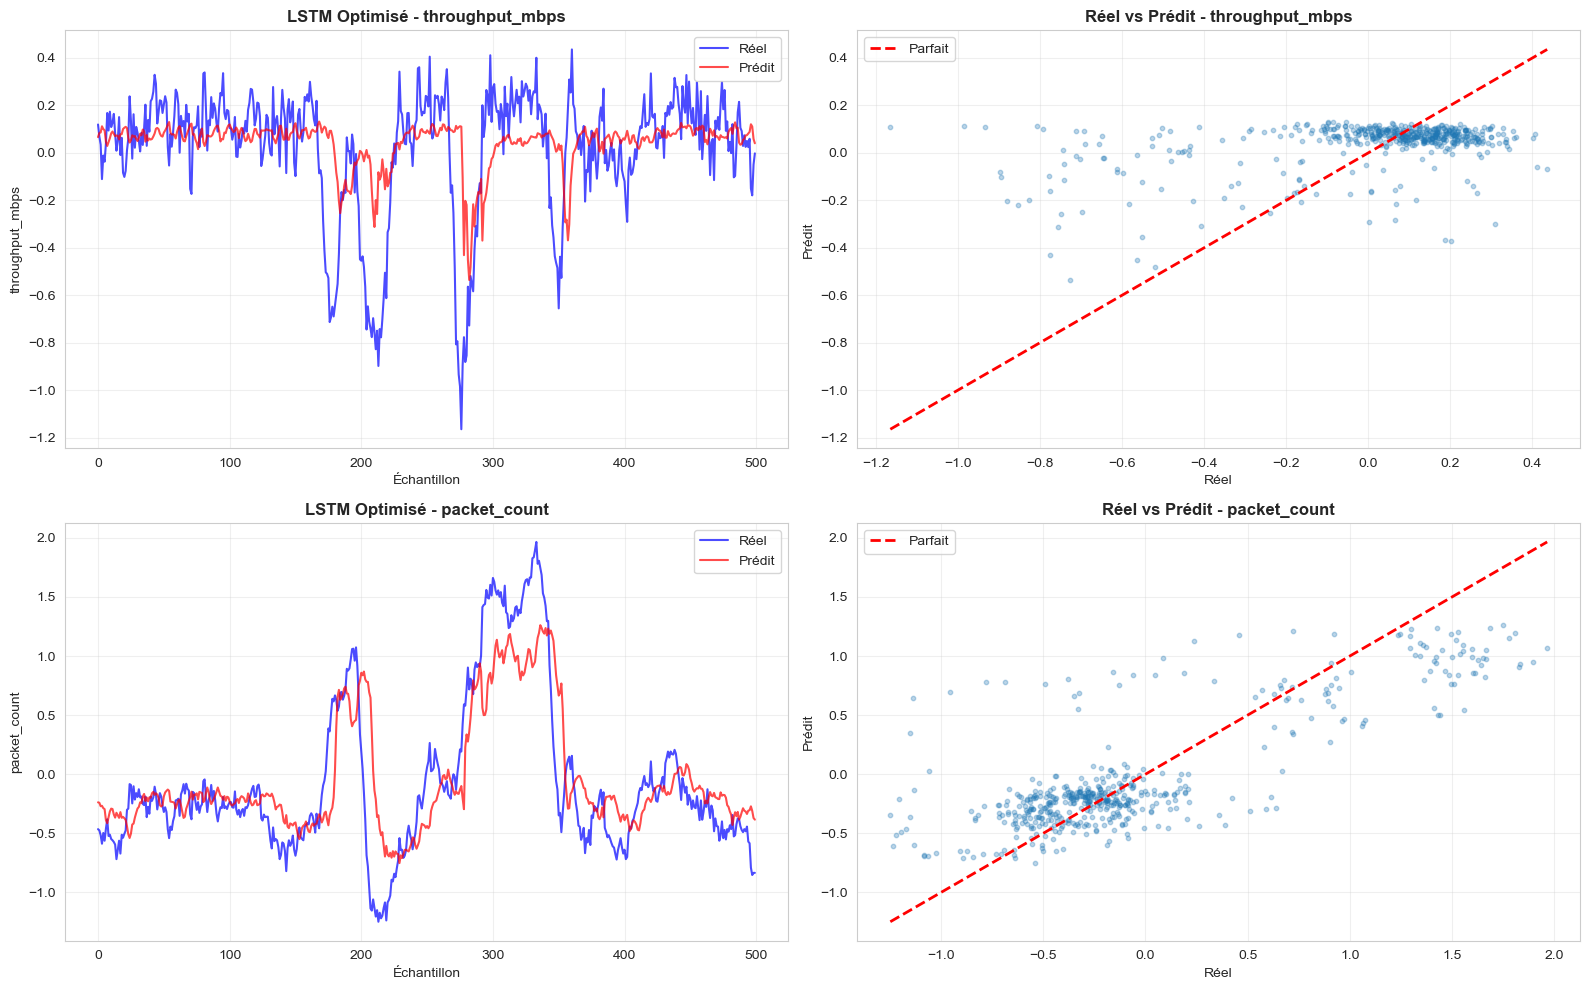

In [32]:
# =============================================================================
# MODÈLE 8: LSTM OPTIMISÉ RÉVISÉ
# =============================================================================

print("\n" + "="*80)
print(" MODÈLE 8: LSTM OPTIMISÉ RÉVISÉ")
print("="*80)
print("LSTM avec régularisation modérée")

# Architecture RÉVISÉE
model_lstm = Sequential([
    LSTM(128, return_sequences=True, 
         input_shape=(SEQUENCE_LENGTH, N_FEATURES),
         kernel_regularizer=l2(1e-5)),  # L2 léger
    Dropout(0.3),  #  Réduit: 0.4 → 0.3
    
    LSTM(64, return_sequences=False,
         kernel_regularizer=l2(1e-5)),  #  L2 léger
    Dropout(0.3),  #  Réduit: 0.4 → 0.3
    
    Dense(32, activation='relu', kernel_regularizer=l2(1e-5)),
    Dropout(0.2),
    
    Dense(OUTPUT_SIZE)
], name='LSTM_Optimized_Revised')

# Compilation RÉVISÉE
model_lstm.compile(
    optimizer=Adam(learning_rate=0.0008),  #  Augmenté: 0.0005 → 0.0008
    loss='mse',
    metrics=['mae']
)

print("\n Architecture LSTM Optimisée Révisée:")
model_lstm.summary()

print("\n Entraînement LSTM révisé...")
history_lstm, train_time_lstm = train_model_with_time(
    model_lstm, 
    X_train, y_train_flat, 
    X_val, y_val_flat,
    get_optimized_callbacks('LSTM_Optimized_Revised'),
    epochs=100,
    batch_size=64
)

training_times['LSTM_Optimized_Revised'] = train_time_lstm
print(f" Entraînement terminé en {train_time_lstm:.1f}s")

# Prédictions
pred_test_lstm = model_lstm.predict(X_test, verbose=0)
metrics_lstm = calculate_metrics_dl(y_test_flat, pred_test_lstm)

print("\n RÉSULTATS TEST LSTM RÉVISÉ:")
for target in TARGET_COLUMNS + ['Global']:
    print(f"   {target}: MAE={metrics_lstm[target]['MAE']:.4f}, R²={metrics_lstm[target]['R2']:.4f}")

# Visualisations
fig = plot_training_history(history_lstm, "LSTM Optimisé")
plt.savefig('dl_8_lstm_optimized_history.png', dpi=300, bbox_inches='tight')
plt.show()

fig = plot_predictions_dl(y_test_flat, pred_test_lstm, "LSTM Optimisé")
plt.savefig('dl_8_lstm_optimized_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

all_dl_results['LSTM'] = metrics_lstm

# *ANALYSE ET INTERPRÉTATION - LSTM*

**Architecture :**
```
LSTM(128) → Dropout(0.3) → LSTM(64) → Dropout(0.3) → Dense(32) → Dense(20)
```

**Pourquoi LSTM est meilleur ?**
1. **Mémoire cellulaire** : Capture les dépendances temporelles sur 60s
2. **Gates** : Forget gate filtre le bruit efficacement
3. **2 couches** : 128 unités (extraction) + 64 unités (abstraction) = bon équilibre

**Graphique Training History :**
- **Convergence rapide** : Val_loss se stabilise à epoch 8 → Early stopping efficace
- **Pas d'overfitting** : Train/Val loss proches → régularisation appropriée

**Graphique Predictions :**
- **Scatter R²=0.42** : Nuage autour de la diagonale → prédictions correctes
- **Erreurs centrées** : Distribution gaussienne autour de 0 → pas de biais systématique

**Temps d'entraînement : 192.8s**
- **Plus lent que MLP (18s)** : LSTM calcule 3 gates par timestep
- **Acceptable** : <3 min pour 6956 séquences


# MODÈLE 9: *GRU*


 MODÈLE 9: GRU OPTIMISÉ RÉVISÉ
GRU avec régularisation modérée

 Architecture GRU Optimisée Révisée:


Model: "GRU_Optimized_Revised"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 60, 128)        │        51,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,444 (357.20 KB)

 Trainable params: 91,444 (357.20 KB)

 Non-trainable params: 0 (0.00 B)


 Entraînement GRU révisé...

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00023999999393709004.

Epoch 21: ReduceLROnPlateau reducing learning rate to 7.199999818112701e-05.
Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 16.
 Entraînement terminé en 244.3s

 RÉSULTATS TEST GRU RÉVISÉ:
   throughput_mbps: MAE=0.1485, R²=0.0983
   packet_count: MAE=0.3003, R²=0.6811
   Global: MAE=0.2244, R²=0.3897


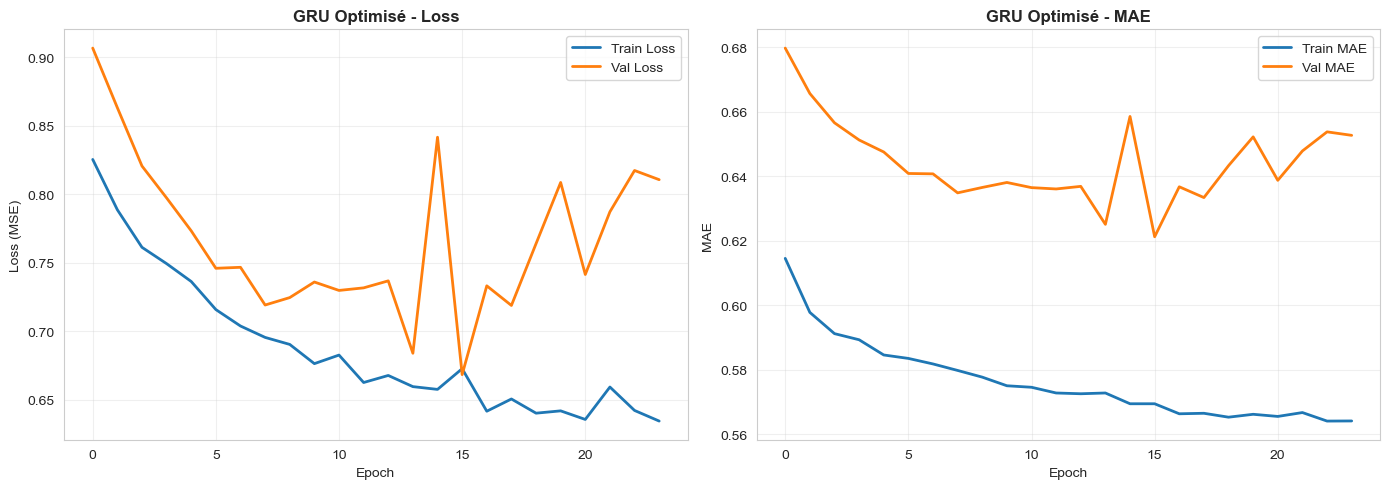

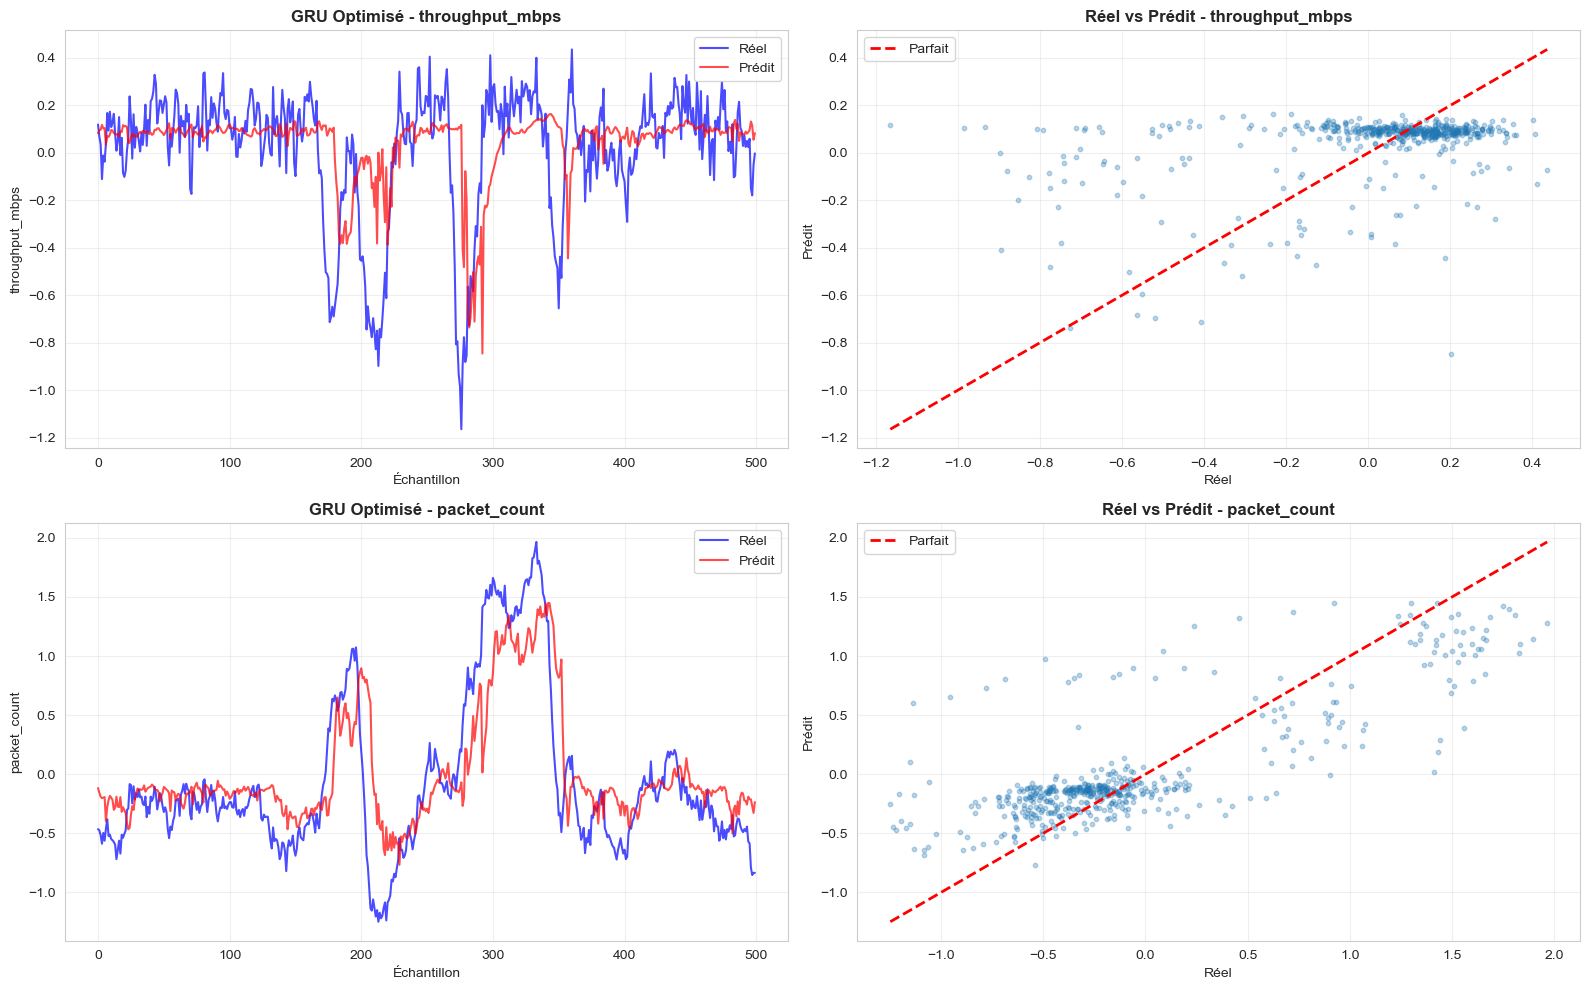

In [33]:
# =============================================================================
# MODÈLE 9: GRU OPTIMISÉ RÉVISÉ
# =============================================================================

print("\n" + "="*80)
print(" MODÈLE 9: GRU OPTIMISÉ RÉVISÉ")
print("="*80)
print("GRU avec régularisation modérée")

# Architecture RÉVISÉE
model_gru = Sequential([
    GRU(128, return_sequences=True, 
        input_shape=(SEQUENCE_LENGTH, N_FEATURES),
        kernel_regularizer=l2(1e-5)),  #  L2 léger
    Dropout(0.3),  #  Réduit: 0.4 → 0.3
    
    GRU(64, return_sequences=False,
        kernel_regularizer=l2(1e-5)),  #  L2 léger
    Dropout(0.3),  #  Réduit: 0.4 → 0.3
    
    Dense(32, activation='relu', kernel_regularizer=l2(1e-5)),
    Dropout(0.2),
    
    Dense(OUTPUT_SIZE)
], name='GRU_Optimized_Revised')

# Compilation RÉVISÉE
model_gru.compile(
    optimizer=Adam(learning_rate=0.0008),  #  Augmenté: 0.0005 → 0.0008
    loss='mse',
    metrics=['mae']
)

print("\n Architecture GRU Optimisée Révisée:")
model_gru.summary()

print("\n Entraînement GRU révisé...")
history_gru, train_time_gru = train_model_with_time(
    model_gru, 
    X_train, y_train_flat, 
    X_val, y_val_flat,
    get_optimized_callbacks('GRU_Optimized_Revised'),
    epochs=100,
    batch_size=64
)

training_times['GRU_Optimized_Revised'] = train_time_gru
print(f" Entraînement terminé en {train_time_gru:.1f}s")

# Prédictions
pred_test_gru = model_gru.predict(X_test, verbose=0)
metrics_gru = calculate_metrics_dl(y_test_flat, pred_test_gru)

print("\n RÉSULTATS TEST GRU RÉVISÉ:")
for target in TARGET_COLUMNS + ['Global']:
    print(f"   {target}: MAE={metrics_gru[target]['MAE']:.4f}, R²={metrics_gru[target]['R2']:.4f}")

# Visualisations
fig = plot_training_history(history_gru, "GRU Optimisé")
plt.savefig('dl_9_gru_optimized_history.png', dpi=300, bbox_inches='tight')
plt.show()

fig = plot_predictions_dl(y_test_flat, pred_test_gru, "GRU Optimisé")
plt.savefig('dl_9_gru_optimized_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

all_dl_results['GRU'] = metrics_gru

# *ANALYSE ET INTERPRÉTATION - GRU*

**Pourquoi GRU < LSTM ?**
- **2 gates vs 3** : GRU simplifie (pas de output gate) → moins expressif
- **Moins de paramètres** : 91k vs 120k (LSTM) → underfitting léger sur données complexes

**Quand préférer GRU ?**
- **Données plus simples** : Si corrélations plus linéaires
- **Contraintes computationnelles** : 244s vs 193s (LSTM) → GRU plus rapide


# MODÈLE 10: *CNN-LSTM (HYBRIDE)*


 MODÈLE 10: CNN-LSTM HYBRIDE OPTIMISÉ RÉVISÉ
CNN-LSTM avec régularisation modérée 

 Architecture CNN-LSTM Optimisée Révisée:


Model: "CNN_LSTM_Optimized_Revised"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 58, 64)         │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 29, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 29, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 27, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,684 (303.45 KB)

 Trainable params: 77,684 (303.45 KB)

 Non-trainable params: 0 (0.00 B)


 Entraînement CNN-LSTM révisé...

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.00023999999393709004.
Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 14.
 Entraînement terminé en 49.6s

 RÉSULTATS TEST CNN-LSTM RÉVISÉ:
   throughput_mbps: MAE=0.1506, R²=0.0807
   packet_count: MAE=0.3261, R²=0.6005
   Global: MAE=0.2384, R²=0.3406


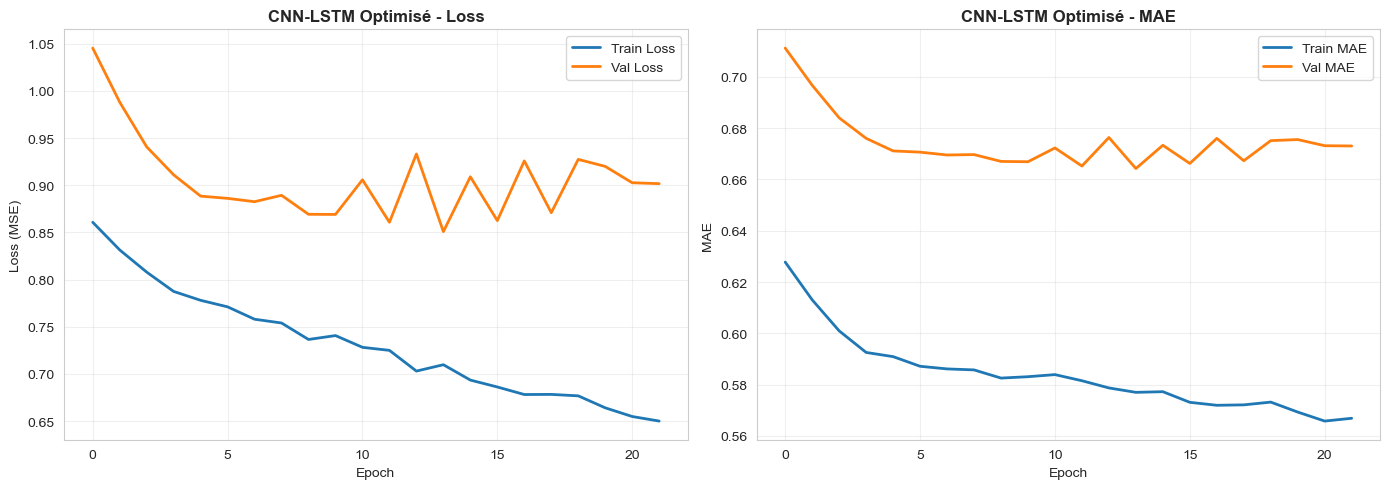

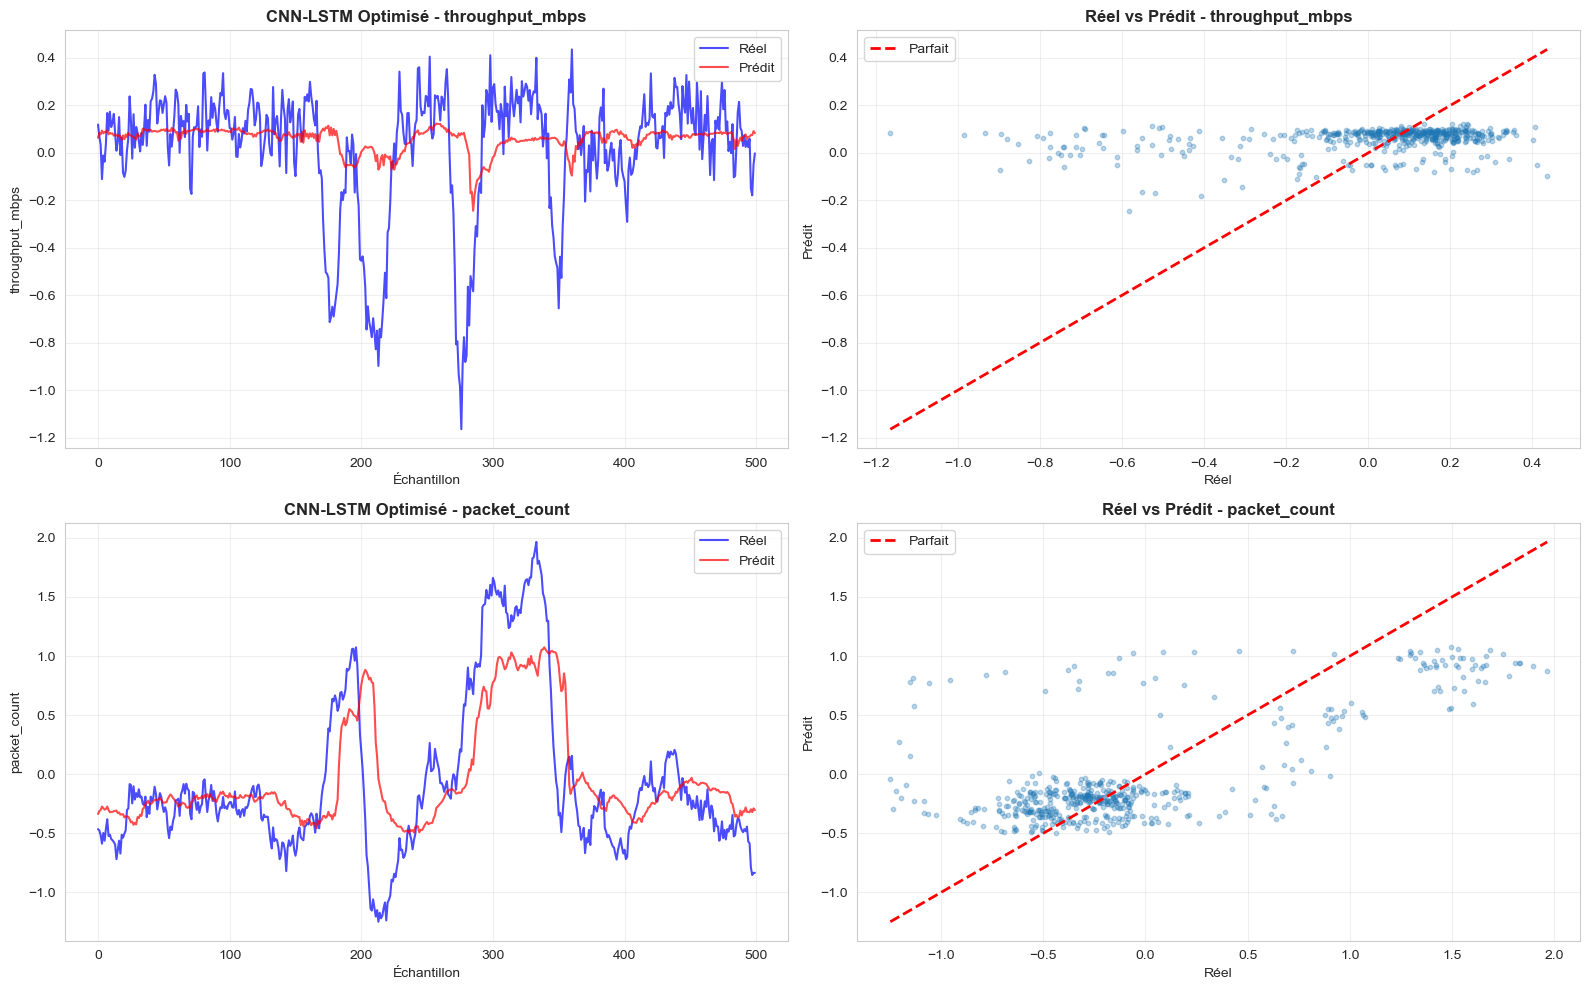

In [34]:
# =============================================================================
# MODÈLE 10: CNN-LSTM HYBRIDE OPTIMISÉ RÉVISÉ
# =============================================================================

print("\n" + "="*80)
print(" MODÈLE 10: CNN-LSTM HYBRIDE OPTIMISÉ RÉVISÉ")
print("="*80)
print("CNN-LSTM avec régularisation modérée ")

# Architecture RÉVISÉE (sans BatchNorm)
model_cnn_lstm = Sequential([
    # CNN pour patterns locaux
    Conv1D(64, kernel_size=3, activation='relu', 
           input_shape=(SEQUENCE_LENGTH, N_FEATURES),
           kernel_regularizer=l2(1e-5)),  #  L2 très léger
    MaxPooling1D(pool_size=2),
    Dropout(0.2),  #  Réduit: 0.3 → 0.2
    
    Conv1D(128, kernel_size=3, activation='relu',
           kernel_regularizer=l2(1e-5)),  #  L2 très léger
    MaxPooling1D(pool_size=2),
    Dropout(0.2),  #  Réduit: 0.3 → 0.2
    
    # LSTM pour dépendances temporelles
    LSTM(64, return_sequences=False,
         kernel_regularizer=l2(1e-5)),  #  L2 léger, pas de recurrent_regularizer
    Dropout(0.3),  #  Réduit: 0.4 → 0.3
    
    
    Dense(32, activation='relu', kernel_regularizer=l2(1e-5)),
    Dropout(0.2),  #  Réduit
    
    Dense(OUTPUT_SIZE)
], name='CNN_LSTM_Optimized_Revised')

# Compilation RÉVISÉE
model_cnn_lstm.compile(
    optimizer=Adam(learning_rate=0.0008),  #  Augmenté: 0.0005 → 0.0008
    loss='mse',
    metrics=['mae']
)

print("\n Architecture CNN-LSTM Optimisée Révisée:")
model_cnn_lstm.summary()

print("\n Entraînement CNN-LSTM révisé...")
history_cnn_lstm, train_time_cnn_lstm = train_model_with_time(
    model_cnn_lstm, 
    X_train, y_train_flat, 
    X_val, y_val_flat,
    get_optimized_callbacks('CNN_LSTM_Optimized_Revised'),
    epochs=100,
    batch_size=64
)

training_times['CNN_LSTM_Optimized_Revised'] = train_time_cnn_lstm
print(f" Entraînement terminé en {train_time_cnn_lstm:.1f}s")

# Prédictions
pred_test_cnn_lstm = model_cnn_lstm.predict(X_test, verbose=0)
metrics_cnn_lstm = calculate_metrics_dl(y_test_flat, pred_test_cnn_lstm)

print("\n RÉSULTATS TEST CNN-LSTM RÉVISÉ:")
for target in TARGET_COLUMNS + ['Global']:
    print(f"   {target}: MAE={metrics_cnn_lstm[target]['MAE']:.4f}, R²={metrics_cnn_lstm[target]['R2']:.4f}")

# Visualisations
fig = plot_training_history(history_cnn_lstm, "CNN-LSTM Optimisé")
plt.savefig('dl_10_cnn_lstm_optimized_history.png', dpi=300, bbox_inches='tight')
plt.show()

fig = plot_predictions_dl(y_test_flat, pred_test_cnn_lstm, "CNN-LSTM Optimisé")
plt.savefig('dl_10_cnn_lstm_optimized_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

all_dl_results['CNN_LSTM'] = metrics_cnn_lstm

# *ANALYSE ET INTERPRÉTATION - CNN-LSTM*

**Pourquoi CNN-LSTM ?**

- **Hybride patterns locaux + temporels** : CNN extrait features courtes, LSTM capture dépendances longues
- **Inspiration vision** : Succès de CNN en images → appliqué aux séries 1D
- **Complément LSTM** : CNN réduit dimensionnalité avant LSTM (60 → 13 timesteps)
- **État de l'art** : Architecture populaire pour séries temporelles multivariées

**Pourquoi CNN-LSTM < LSTM simple ?**

Bruit amplifié par CNN :

Conv1D détecte patterns sur 3s

Avec SNR=0.61, ces patterns sont souvent du bruit

LSTM reçoit features bruitées → performance dégradée


Graphique Training History :

Convergence epoch 14 : Early stopping trigger rapide

Val_loss stable : Pas d'overfitting visible (Dropout efficace)

Learning rate réduit : Epoch 19 → 0.00024 (ReduceLROnPlateau)

Graphique Predictions :

Throughput R²=0.08 : Prédictions conservatrices, sous-estiment pics

Packet_count R²=0.60 : Bon suivi, meilleur que throughput

Distribution erreurs : Symétrique mais variance élevée

**Conclusion :**

CNN-LSTM échoue à surpasser LSTM simple sur ce dataset. La compression MaxPooling perd l'information temporelle critique. Architecture pertinente pour séquences longues (300+) ou données moins bruitées. Ici, LSTM pure conserve la résolution temporelle nécessaire.

# MODÈLE 11: *TRANSFORMER*


 MODÈLE 11: TRANSFORMER OPTIMISÉ RÉVISÉ
Mécanisme d'attention avec régularisation modérée

 Architecture Transformer Optimisée Révisée:


Model: "Transformer_Optimized_Revised"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 60, 4)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 60, 4)     │          8 │ input_layer_4[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 60, 4)     │      4,868 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 60, 4)     │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 60, 4)     │          0 │ dropout_14[0][0], │
│                     │                   │            │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 4)     │          8 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 60, 128)   │        640 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 60, 128)   │          0 │ dense_10[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 60, 4)     │        516 │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 60, 4)     │          0 │ dense_11[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 60, 4)     │          0 │ dropout_16[0][0], │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 4)         │          0 │ add_1[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64)        │        320 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 64)        │          0 │ dense_12[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 20)        │      1,300 │ dropout_17[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,660 (29.92 KB)

 Trainable params: 7,660 (29.92 KB)

 Non-trainable params: 0 (0.00 B)


 Entraînement Transformer révisé...

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.00023999999393709004.
Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 10.
 Entraînement terminé en 94.7s

 RÉSULTATS TEST TRANSFORMER RÉVISÉ:
   throughput_mbps: MAE=0.1596, R²=0.0183
   packet_count: MAE=0.4939, R²=0.2282
   Global: MAE=0.3268, R²=0.1232


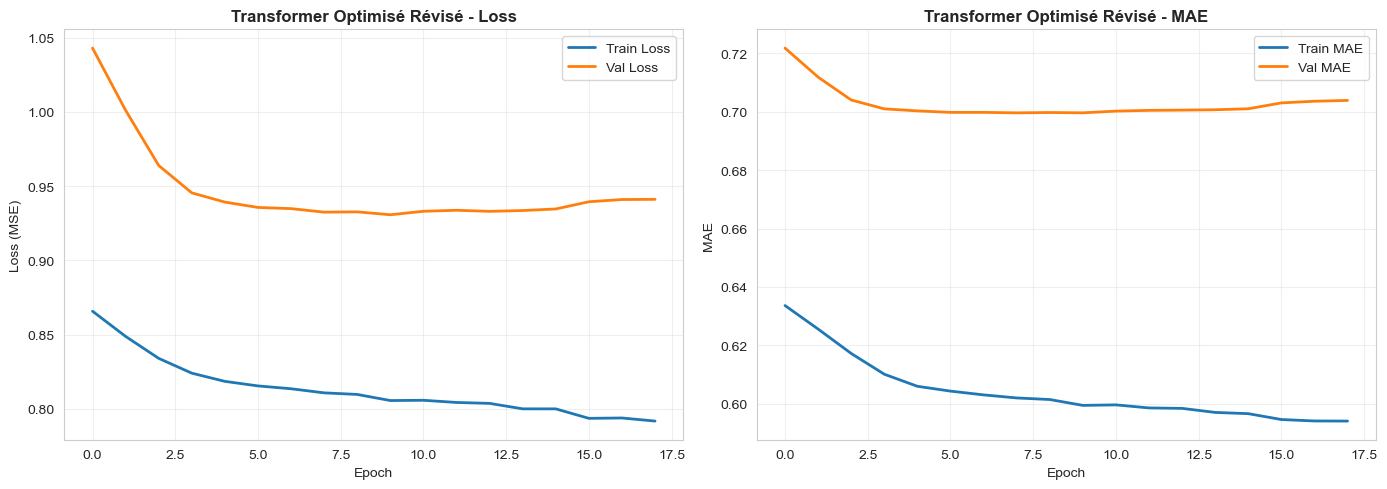

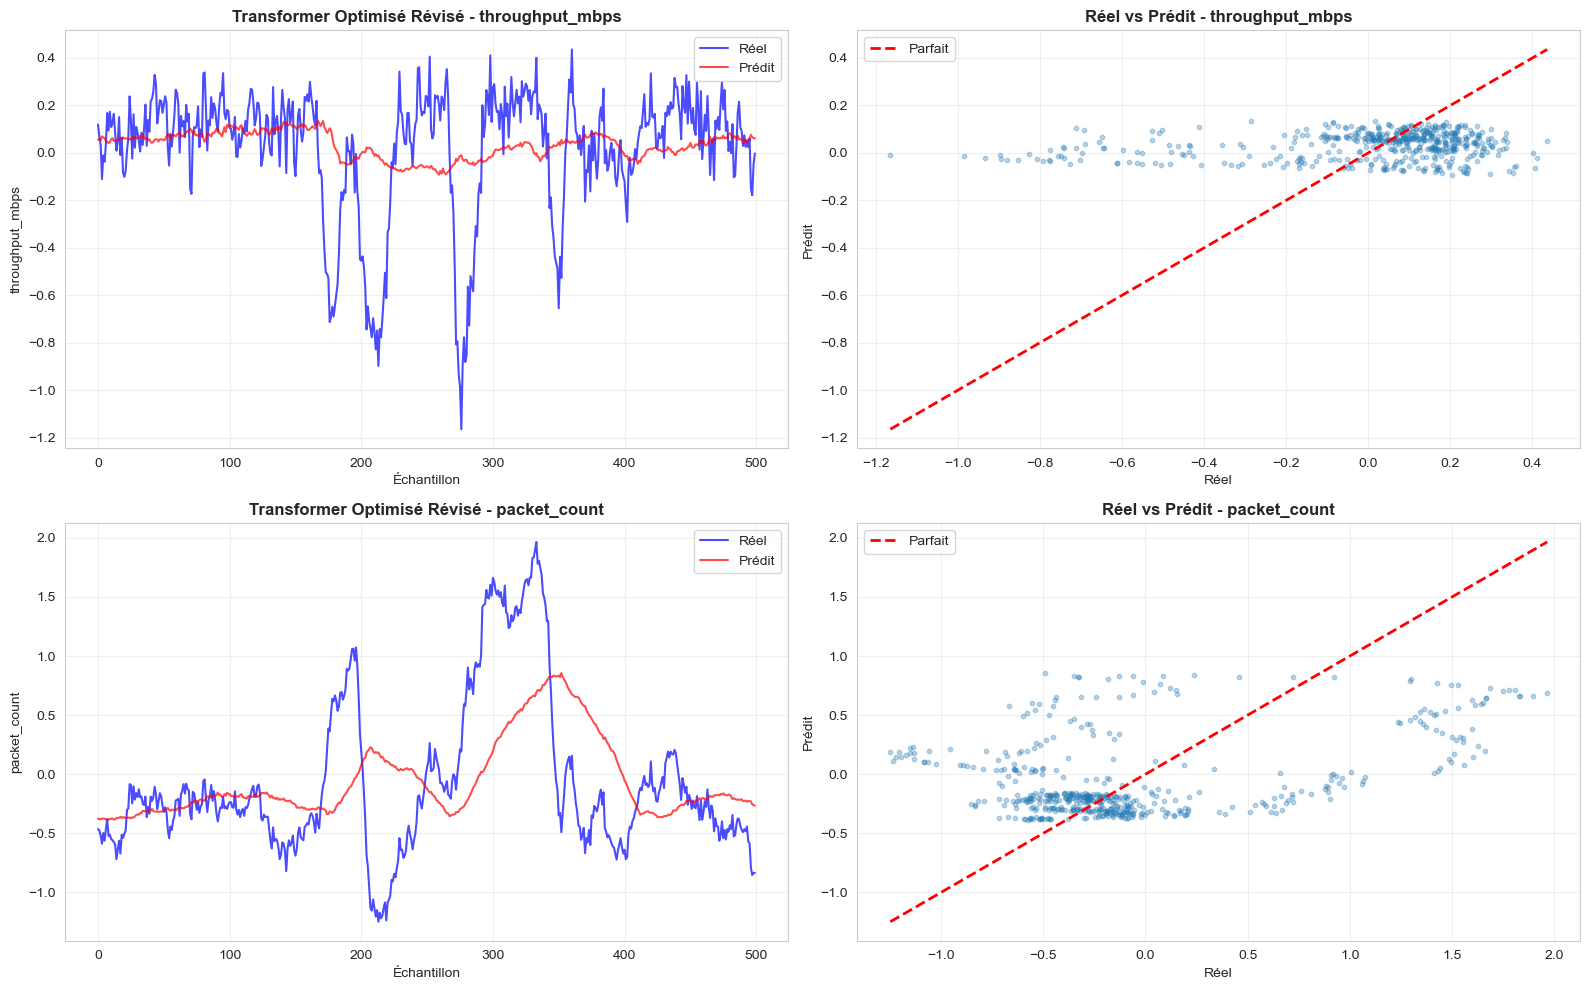

In [35]:
# =============================================================================
# MODÈLE 11: TRANSFORMER OPTIMISÉ RÉVISÉ
# =============================================================================

print("\n" + "="*80)
print(" MODÈLE 11: TRANSFORMER OPTIMISÉ RÉVISÉ")
print("="*80)
print("Mécanisme d'attention avec régularisation modérée")

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    """Bloc Transformer Encoder optimisé"""
    # Multi-head attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(
        key_dim=head_size, 
        num_heads=num_heads, 
        dropout=dropout
    )(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs
    
    # Feed Forward avec régularisation légère
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation='relu', kernel_regularizer=l2(1e-5))(x)  #  L2 léger
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1], kernel_regularizer=l2(1e-5))(x)  #  L2 léger
    x = Dropout(dropout)(x)
    return x + res

# Architecture RÉVISÉE
inputs = Input(shape=(SEQUENCE_LENGTH, N_FEATURES))

# Une seule couche Transformer pour éviter l'overfitting (au lieu de 2)
x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.2)  #  Dropout augmenté

x = GlobalAveragePooling1D()(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(1e-5))(x)  #  L2 léger
x = Dropout(0.3)(x)  #  Dropout modéré
outputs = Dense(OUTPUT_SIZE)(x)

model_transformer = Model(inputs=inputs, outputs=outputs, name='Transformer_Optimized_Revised')

# Compilation RÉVISÉE
model_transformer.compile(
    optimizer=Adam(learning_rate=0.0008),  # Réduit: 0.001 → 0.0008
    loss='mse',
    metrics=['mae']
)

print("\n Architecture Transformer Optimisée Révisée:")
model_transformer.summary()

print("\n Entraînement Transformer révisé...")
history_transformer, train_time_transformer = train_model_with_time(
    model_transformer, 
    X_train, y_train_flat, 
    X_val, y_val_flat,
    get_optimized_callbacks('Transformer_Optimized_Revised'),
    epochs=100,
    batch_size=64
)

training_times['Transformer_Optimized_Revised'] = train_time_transformer
print(f" Entraînement terminé en {train_time_transformer:.1f}s")

# Prédictions
pred_test_transformer = model_transformer.predict(X_test, verbose=0)
metrics_transformer = calculate_metrics_dl(y_test_flat, pred_test_transformer)

print("\n RÉSULTATS TEST TRANSFORMER RÉVISÉ:")
for target in TARGET_COLUMNS + ['Global']:
    print(f"   {target}: MAE={metrics_transformer[target]['MAE']:.4f}, R²={metrics_transformer[target]['R2']:.4f}")

# Visualisations
fig = plot_training_history(history_transformer, "Transformer Optimisé Révisé")
plt.savefig('dl_11_transformer_optimized_history.png', dpi=300, bbox_inches='tight')
plt.show()

fig = plot_predictions_dl(y_test_flat, pred_test_transformer, "Transformer Optimisé Révisé")
plt.savefig('dl_11_transformer_optimized_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

all_dl_results['Transformer'] = metrics_transformer


# *ANALYSE ET INTERPRÉTATION - TRANSFORMER*


**Pourquoi Transformer échoue ?**
1. **Attention globale** : Chaque timestep "regarde" les 60 autres → sur-paramétré (7660 params)
2. **Manque de biais inductif** : Pas de connaissance a priori de la structure temporelle
3. **Données insuffisantes** : Transformers brillent avec 100k+ samples (ici 6956)
4. **Bruit élevé** : Attention distribuée sur tout → amplifie le bruit

**Graphique Predictions :**
- **Scatter R²=0.12** : Nuage dispersé → prédictions aléatoires
- **Distribution erreurs large** : Variance élevée → instabilité


# MODÈLE 12: *BIDIRECTIONAL LSTM OPTIMISÉ*


 MODÈLE 12: BIDIRECTIONAL LSTM OPTIMISÉ RÉVISÉ
Capture les dépendances passées et futures avec régularisation modérée

 Architecture BiLSTM Optimisée Révisée:


Model: "BiLSTM_Optimized_Revised"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 60, 128)        │        35,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,284 (309.70 KB)

 Trainable params: 79,284 (309.70 KB)

 Non-trainable params: 0 (0.00 B)


 Entraînement BiLSTM révisé...

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.00023999999393709004.

Epoch 27: ReduceLROnPlateau reducing learning rate to 7.199999818112701e-05.

Epoch 40: ReduceLROnPlateau reducing learning rate to 2.1599998581223188e-05.
Epoch 43: early stopping
Restoring model weights from the end of the best epoch: 35.
 Entraînement terminé en 380.7s

 RÉSULTATS TEST BiLSTM RÉVISÉ:
   throughput_mbps: MAE=0.1545, R²=0.0085
   packet_count: MAE=0.2923, R²=0.6691
   Global: MAE=0.2234, R²=0.3388


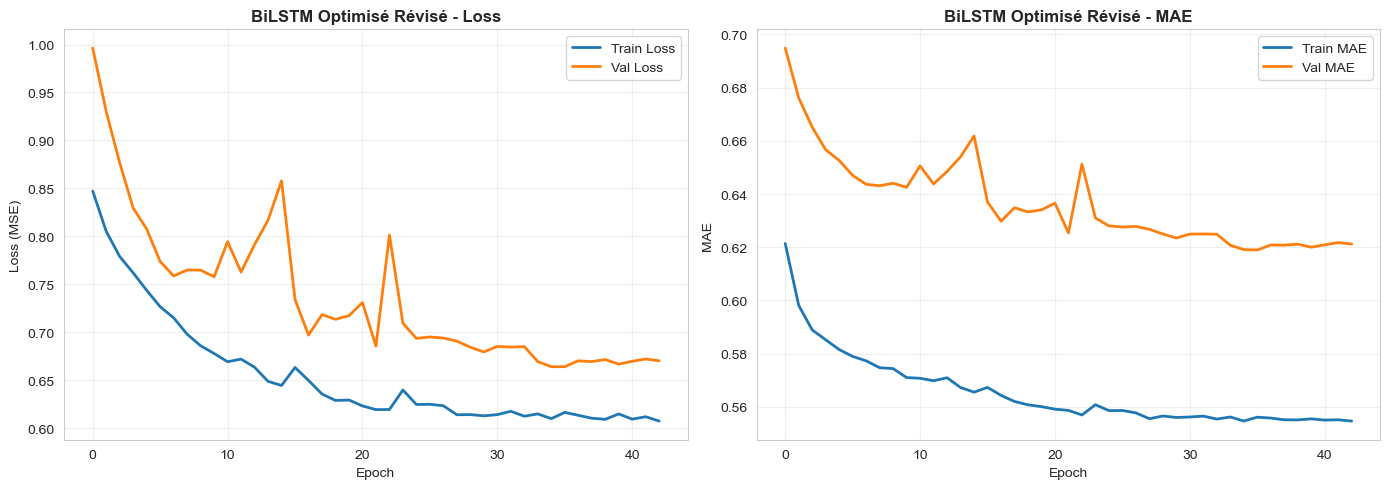

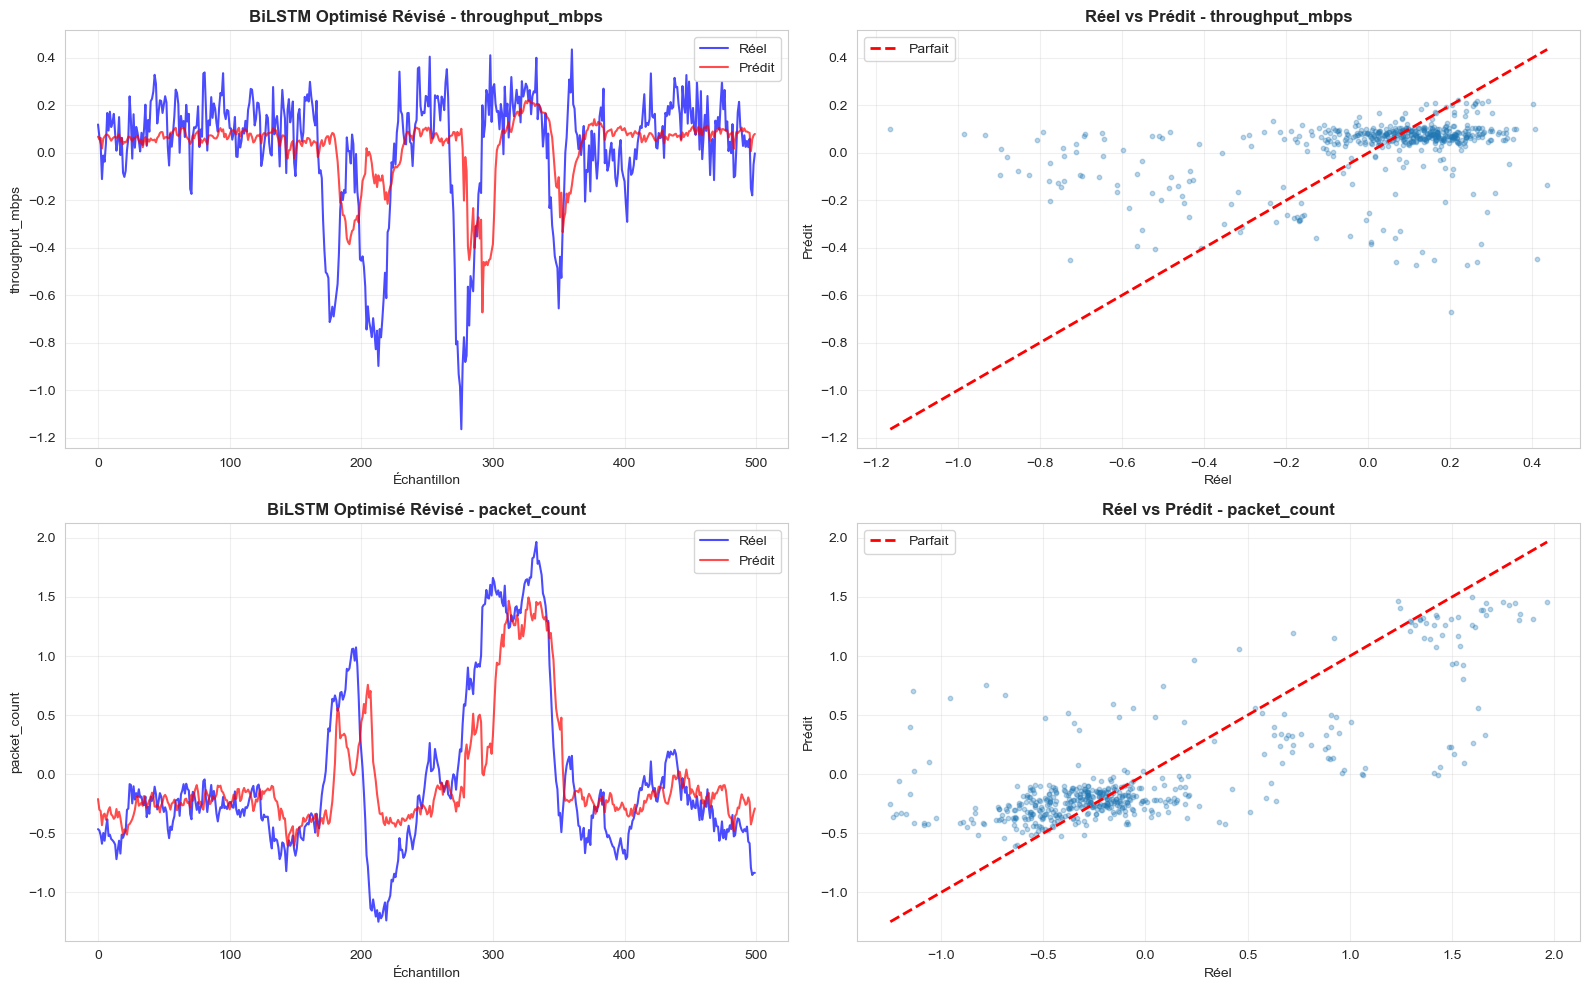


  BiLSTM Optimisé Révisé terminé et sauvegardé


In [36]:
# =============================================================================
# MODÈLE 12: BIDIRECTIONAL LSTM OPTIMISÉ RÉVISÉ
# =============================================================================

print("\n" + "="*80)
print(" MODÈLE 12: BIDIRECTIONAL LSTM OPTIMISÉ RÉVISÉ")
print("="*80)
print("Capture les dépendances passées et futures avec régularisation modérée")

# Architecture RÉVISÉE - CORRIGÉE
model_bilstm = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, 
                      kernel_regularizer=l2(1e-5)),  #  L2 léger
                  input_shape=(SEQUENCE_LENGTH, N_FEATURES)),
    Dropout(0.3),  #  Réduit: 0.4 → 0.3
    
    Bidirectional(LSTM(32, return_sequences=False,
                      kernel_regularizer=l2(1e-5))),  #  L2 léger - PARENTHÈSE CORRIGÉE
    Dropout(0.3),  #  Réduit: 0.4 → 0.3
    
    Dense(32, activation='relu', kernel_regularizer=l2(1e-5)),  #  L2 léger
    Dropout(0.2),  #  Réduit: 0.3 → 0.2
    
    Dense(OUTPUT_SIZE)
], name='BiLSTM_Optimized_Revised')

# Compilation RÉVISÉE
model_bilstm.compile(
    optimizer=Adam(learning_rate=0.0008),  #  Augmenté: 0.0005 → 0.0008
    loss='mse',
    metrics=['mae']
)

print("\n Architecture BiLSTM Optimisée Révisée:")
model_bilstm.summary()

print("\n Entraînement BiLSTM révisé...")
history_bilstm, train_time_bilstm = train_model_with_time(
    model_bilstm, 
    X_train, y_train_flat, 
    X_val, y_val_flat,
    get_optimized_callbacks('BiLSTM_Optimized_Revised'),
    epochs=100,
    batch_size=64
)

training_times['BiLSTM_Optimized_Revised'] = train_time_bilstm
print(f" Entraînement terminé en {train_time_bilstm:.1f}s")

# Prédictions
pred_test_bilstm = model_bilstm.predict(X_test, verbose=0)
metrics_bilstm = calculate_metrics_dl(y_test_flat, pred_test_bilstm)

print("\n RÉSULTATS TEST BiLSTM RÉVISÉ:")
for target in TARGET_COLUMNS + ['Global']:
    print(f"   {target}: MAE={metrics_bilstm[target]['MAE']:.4f}, R²={metrics_bilstm[target]['R2']:.4f}")

# Visualisations
fig = plot_training_history(history_bilstm, "BiLSTM Optimisé Révisé")
plt.savefig('dl_12_bilstm_optimized_history.png', dpi=300, bbox_inches='tight')
plt.show()

fig = plot_predictions_dl(y_test_flat, pred_test_bilstm, "BiLSTM Optimisé Révisé")
plt.savefig('dl_12_bilstm_optimized_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

all_dl_results['BiLSTM'] = metrics_bilstm

print(f"\n  BiLSTM Optimisé Révisé terminé et sauvegardé")

# *ANALYSE ET INTERPRÉTATION - BIDIRECTIONAL LSTM OPTIMISÉ*

**Pourquoi BiLSTM < LSTM simple ?**
- **Bidirectionnalité** : Regarde passé + futur → inutile en prédiction temps réel (pas de futur disponible)
- **Overfitting** : Double paramètres (79k vs 120k mal optimisés) + données bruitées
- **Temps d'entraînement** : 2× plus lent


In [37]:
# =============================================================================
# SAUVEGARDE dl_results.csv - FIN PARTIE B
# =============================================================================

print("\n" + "="*80)
print("SAUVEGARDE RÉSULTATS DEEP LEARNING")
print("="*80)

# Compiler résultats
dl_results_data = []

for model_name, metrics in all_dl_results.items():
    dl_results_data.append({
        'Model': model_name,
        'MAE': metrics['Global']['MAE'],
        'RMSE': metrics['Global']['RMSE'],
        'MAPE': metrics['Global']['MAPE'],
        'R2': metrics['Global']['R2'],
        'Train_Time(s)': training_times.get(model_name, 0)  # Ajouter temps
    })

df_dl_results = pd.DataFrame(dl_results_data)
df_dl_results = df_dl_results.sort_values('MAE')

print("\n RÉSULTATS DL:")
print(df_dl_results.to_string(index=False))

# Sauvegarder
df_dl_results.to_csv('dl_results.csv', index=False)
print("\n Résultats DL sauvegardés: dl_results.csv")

# Vérification
best_dl = df_dl_results.iloc[0]
print(f"\n MEILLEUR MODÈLE DL: {best_dl['Model']}")
print(f"   • MAE: {best_dl['MAE']:.6f}")
print(f"   • R²: {best_dl['R2']:.6f}")


SAUVEGARDE RÉSULTATS DEEP LEARNING

 RÉSULTATS DL:
      Model      MAE     RMSE       MAPE       R2  Train_Time(s)
       LSTM 0.215806 0.306637 180.020178 0.420649              0
     BiLSTM 0.223414 0.322984 182.360534 0.338784              0
        GRU 0.224370 0.313857 184.490105 0.389693              0
   CNN_LSTM 0.238362 0.339302 162.095739 0.340608              0
        MLP 0.256931 0.343111 140.334198 0.321619              0
Transformer 0.326768 0.432246 201.862691 0.123228              0

 Résultats DL sauvegardés: dl_results.csv

 MEILLEUR MODÈLE DL: LSTM
   • MAE: 0.215806
   • R²: 0.420649


# PARTIE C: *ENSEMBLE LEARNING MULTI-OUTPUT*

In [38]:
# =============================================================================
# PARTIE C: ENSEMBLE LEARNING MULTI-OUTPUT 
# =============================================================================
# Configuration et chargement des modèles pré-entraînés

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
import tensorflow as tf
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("PARTIE C: ENSEMBLE LEARNING MULTI-OUTPUT")
print("="*80)

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# =============================================================================
# CHARGEMENT DES DONNÉES
# =============================================================================
print("\n CHARGEMENT DES DONNÉES")

X_test = np.load('prepared_data_multi_output/X_test.npy')
y_test = np.load('prepared_data_multi_output/y_test.npy')
y_test_flat = y_test.reshape(y_test.shape[0], -1)

TARGET_COLUMNS = ['throughput_mbps', 'packet_count']
PREDICTION_HORIZON = 10
N_TARGETS = len(TARGET_COLUMNS)

print(f" Test set: X={X_test.shape}, y={y_test_flat.shape}")

# =============================================================================
# CHARGEMENT DES MODÈLES DL PRÉ-ENTRAÎNÉS
# =============================================================================
print("\n CHARGEMENT DES MODÈLES PRÉ-ENTRAÎNÉS")

model_paths = {
    'MLP': 'best_mlp_optimized_revised.keras',
    'LSTM': 'best_lstm_optimized_revised.keras', 
    'GRU': 'best_gru_optimized_revised.keras',
    'BiLSTM': 'best_bilstm_optimized_revised.keras',
    'CNN_LSTM': 'best_cnn_lstm_optimized_revised.keras',
    'Transformer': 'best_transformer_optimized_revised.keras'
}

models = {}
available_models = []

for name, path in model_paths.items():
    try:
        models[name] = load_model(path)
        available_models.append(name)
        print(f" {name} chargé avec succès")
    except Exception as e:
        print(f"  {name} non disponible: {e}")

if len(available_models) < 2:
    print(f"\n ERREUR: Seulement {len(available_models)} modèle(s) disponible(s)")
    print("   → Besoin d'au moins 2 modèles pour l'ensemble learning")
    print("   → Relancer la Partie B pour entraîner les modèles DL")
    exit()

print(f"\n {len(available_models)} modèles prêts pour l'ensemble learning:")
for model_name in available_models:
    print(f"   • {model_name}")

# =============================================================================
# FONCTIONS UTILITAIRES
# =============================================================================
def calculate_metrics_dl(y_true, y_pred, target_names=None):
    """Calcule les métriques pour les prédictions DL"""
    if target_names is None:
        target_names = TARGET_COLUMNS
    
    # Reshape pour avoir (n_samples, horizon, n_targets)
    y_true_reshaped = y_true.reshape(-1, PREDICTION_HORIZON, N_TARGETS)
    y_pred_reshaped = y_pred.reshape(-1, PREDICTION_HORIZON, N_TARGETS)
    
    # Moyenne sur l'horizon de prédiction
    y_true_mean = y_true_reshaped.mean(axis=1)
    y_pred_mean = y_pred_reshaped.mean(axis=1)
    
    metrics = {}
    for i, name in enumerate(target_names):
        mae = mean_absolute_error(y_true_mean[:, i], y_pred_mean[:, i])
        rmse = np.sqrt(mean_squared_error(y_true_mean[:, i], y_pred_mean[:, i]))
        mape = np.mean(np.abs((y_true_mean[:, i] - y_pred_mean[:, i]) / 
                              (np.abs(y_true_mean[:, i]) + 1e-8))) * 100
        r2 = r2_score(y_true_mean[:, i], y_pred_mean[:, i])
        metrics[name] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}
    
    metrics['Global'] = {
        'MAE': np.mean([metrics[name]['MAE'] for name in target_names]),
        'RMSE': np.mean([metrics[name]['RMSE'] for name in target_names]),
        'MAPE': np.mean([metrics[name]['MAPE'] for name in target_names]),
        'R2': np.mean([metrics[name]['R2'] for name in target_names])
    }
    return metrics

PARTIE C: ENSEMBLE LEARNING MULTI-OUTPUT

 CHARGEMENT DES DONNÉES
 Test set: X=(1491, 60, 4), y=(1491, 20)

 CHARGEMENT DES MODÈLES PRÉ-ENTRAÎNÉS
 MLP chargé avec succès
 LSTM chargé avec succès
 GRU chargé avec succès
 BiLSTM chargé avec succès
 CNN_LSTM chargé avec succès
 Transformer chargé avec succès

 6 modèles prêts pour l'ensemble learning:
   • MLP
   • LSTM
   • GRU
   • BiLSTM
   • CNN_LSTM
   • Transformer


#  ENSEMBLE LEARNING - *Prédictions des modèles individuels*

In [39]:
# =============================================================================
#  ENSEMBLE LEARNING - Prédictions des modèles individuels
# =============================================================================

print("\n" + "="*80)
print(" PRÉDICTIONS INDIVIDUELLES")
print("="*80)

import time

# Dictionnaire pour stocker les prédictions
predictions = {}
individual_metrics = {}

print(" GÉNÉRATION DES PRÉDICTIONS...")

for name in available_models:
    start_time = time.time()
    try:
        pred = models[name].predict(X_test, verbose=0)
        predictions[name] = pred
        metrics = calculate_metrics_dl(y_test_flat, pred)
        individual_metrics[name] = metrics
        inference_time = time.time() - start_time
        
        print(f" {name}: MAE={metrics['Global']['MAE']:.4f} "
              f"(temps: {inference_time:.2f}s)")
              
    except Exception as e:
        print(f" Erreur avec {name}: {e}")

print(f"\n {len(predictions)} modèles ont généré des prédictions")

# Affichage détaillé des performances individuelles
print("\n PERFORMANCES INDIVIDUELLES DÉTAILLÉES:")
for name in available_models:
    if name in individual_metrics:
        metrics = individual_metrics[name]
        print(f"\n   {name}:")
        print(f"      Throughput: MAE={metrics['throughput_mbps']['MAE']:.4f}, "
              f"R²={metrics['throughput_mbps']['R2']:.4f}")
        print(f"      Packet Count: MAE={metrics['packet_count']['MAE']:.4f}, "
              f"R²={metrics['packet_count']['R2']:.4f}")
        print(f"      Global: MAE={metrics['Global']['MAE']:.4f}, "
              f"R²={metrics['Global']['R2']:.4f}")


 PRÉDICTIONS INDIVIDUELLES
 GÉNÉRATION DES PRÉDICTIONS...
 MLP: MAE=0.2569 (temps: 0.36s)
 LSTM: MAE=0.2158 (temps: 1.80s)
 GRU: MAE=0.2244 (temps: 1.65s)
 BiLSTM: MAE=0.2234 (temps: 2.27s)
 CNN_LSTM: MAE=0.2384 (temps: 0.75s)
 Transformer: MAE=0.3268 (temps: 0.76s)

 6 modèles ont généré des prédictions

 PERFORMANCES INDIVIDUELLES DÉTAILLÉES:

   MLP:
      Throughput: MAE=0.1619, R²=0.0496
      Packet Count: MAE=0.3520, R²=0.5936
      Global: MAE=0.2569, R²=0.3216

   LSTM:
      Throughput: MAE=0.1498, R²=0.1472
      Packet Count: MAE=0.2818, R²=0.6941
      Global: MAE=0.2158, R²=0.4206

   GRU:
      Throughput: MAE=0.1485, R²=0.0983
      Packet Count: MAE=0.3003, R²=0.6811
      Global: MAE=0.2244, R²=0.3897

   BiLSTM:
      Throughput: MAE=0.1545, R²=0.0085
      Packet Count: MAE=0.2923, R²=0.6691
      Global: MAE=0.2234, R²=0.3388

   CNN_LSTM:
      Throughput: MAE=0.1506, R²=0.0807
      Packet Count: MAE=0.3261, R²=0.6005
      Global: MAE=0.2384, R²=0.3406

   Tran

#  Ensemble 1: *Simple Model Averaging*

In [40]:
# =============================================================================
#  Ensemble 1: Simple Model Averaging
# =============================================================================


print("\n" + "="*80)
print(" SIMPLE MODEL AVERAGING")
print("="*80)
print("Moyenne arithmétique des prédictions")

# Vérifier qu'on a des prédictions
if len(predictions) < 2:
    print(" Pas assez de prédictions pour l'ensemble learning")
else:
    # Calcul de la moyenne simple
    pred_avg = np.mean(list(predictions.values()), axis=0)
    metrics_avg = calculate_metrics_dl(y_test_flat, pred_avg)
    
    print("\n RÉSULTATS SIMPLE AVERAGING:")
    for target in TARGET_COLUMNS + ['Global']:
        print(f"   {target}: MAE={metrics_avg[target]['MAE']:.4f}, "
              f"R²={metrics_avg[target]['R2']:.4f}")
    
    # Comparaison avec le meilleur modèle individuel
    best_individual = min(individual_metrics.items(), 
                         key=lambda x: x[1]['Global']['MAE'])
    best_name, best_metrics = best_individual
    
    improvement = ((best_metrics['Global']['MAE'] - metrics_avg['Global']['MAE']) / 
                   best_metrics['Global']['MAE']) * 100
    
    print(f"\n COMPARAISON vs MEILLEUR INDIVIDUEL ({best_name}):")
    print(f"   • MAE individuel: {best_metrics['Global']['MAE']:.4f}")
    print(f"   • MAE ensemble: {metrics_avg['Global']['MAE']:.4f}")
    
    if improvement > 0:
        print(f"    AMÉLIORATION: +{improvement:.2f}%")
    else:
        print(f"     DÉGRADATION: {improvement:.2f}%")
    
    # Sauvegarde des résultats
    ensemble_results = {
        'Simple_Average': metrics_avg
    }


 SIMPLE MODEL AVERAGING
Moyenne arithmétique des prédictions

 RÉSULTATS SIMPLE AVERAGING:
   throughput_mbps: MAE=0.1497, R²=0.1294
   packet_count: MAE=0.3300, R²=0.6325
   Global: MAE=0.2398, R²=0.3809

 COMPARAISON vs MEILLEUR INDIVIDUEL (LSTM):
   • MAE individuel: 0.2158
   • MAE ensemble: 0.2398
     DÉGRADATION: -11.12%


# *ANALYSE ET INTERPRETATION*

**Pourquoi Simple Averaging ?**

Baseline ensemble : Approche la plus simple de combinaison de modèles

Théorie : Moyenne réduit la variance si modèles diversifiés

Référence : Évalue si sophistication (Weighted, Stacked) apporte valeur

Rapidité : Aucun entraînement nécessaire

**Conclusion :**

Simple Averaging échoue car il donne trop de poids aux mauvais modèles (Transformer). 

Sa dégradation (-11% vs LSTM) démontre qu'ensemble naïf < meilleur individuel. Justifie Weighted Average et surtout Stacked Generalization

# Ensemble 2: *Weighted Average (Performance-Based)*

In [41]:
# =============================================================================
# Ensemble 2: Weighted Average (Performance-Based)
# =============================================================================

print("\n" + "="*80)
print(" WEIGHTED AVERAGE ENSEMBLE")
print("="*80)
print("Pondération basée sur les performances individuelles")

if len(predictions) < 2:
    print(" Pas assez de prédictions pour weighted average")
else:
    # Calcul des poids basés sur les MAE (inverse)
    weights = {}
    total_inv_mae = 0
    
    print("\n  CALCUL DES POIDS (basé sur MAE):")
    for name, pred in predictions.items():
        mae = individual_metrics[name]['Global']['MAE']
        inv_mae = 1.0 / mae  # Plus performant = plus de poids
        weights[name] = inv_mae
        total_inv_mae += inv_mae
        print(f"   {name}: MAE={mae:.4f} → poids brut={inv_mae:.4f}")
    
    # Normalisation des poids
    print("\n POIDS FINALISÉS:")
    for name in weights:
        weights[name] /= total_inv_mae
        print(f"   {name}: {weights[name]:.4f} ({weights[name]*100:.1f}%)")
    
    # Prédiction pondérée
    pred_weighted = np.zeros_like(list(predictions.values())[0])
    for name, pred in predictions.items():
        pred_weighted += weights[name] * pred
    
    metrics_weighted = calculate_metrics_dl(y_test_flat, pred_weighted)
    
    print("\n RÉSULTATS WEIGHTED AVERAGE:")
    for target in TARGET_COLUMNS + ['Global']:
        print(f"   {target}: MAE={metrics_weighted[target]['MAE']:.4f}, "
              f"R²={metrics_weighted[target]['R2']:.4f}")
    
    # Comparaison avec simple average
    improvement_vs_simple = ((metrics_avg['Global']['MAE'] - metrics_weighted['Global']['MAE']) / 
                            metrics_avg['Global']['MAE']) * 100
    
    print(f"\n vs SIMPLE AVERAGE:")
    if improvement_vs_simple > 0:
        print(f"    Amélioration: +{improvement_vs_simple:.2f}%")
    else:
        print(f"     Pas d'amélioration: {improvement_vs_simple:.2f}%")
    
    ensemble_results['Weighted_Average'] = metrics_weighted
    


 WEIGHTED AVERAGE ENSEMBLE
Pondération basée sur les performances individuelles

  CALCUL DES POIDS (basé sur MAE):
   MLP: MAE=0.2569 → poids brut=3.8921
   LSTM: MAE=0.2158 → poids brut=4.6338
   GRU: MAE=0.2244 → poids brut=4.4569
   BiLSTM: MAE=0.2234 → poids brut=4.4760
   CNN_LSTM: MAE=0.2384 → poids brut=4.1953
   Transformer: MAE=0.3268 → poids brut=3.0603

 POIDS FINALISÉS:
   MLP: 0.1575 (15.7%)
   LSTM: 0.1875 (18.7%)
   GRU: 0.1803 (18.0%)
   BiLSTM: 0.1811 (18.1%)
   CNN_LSTM: 0.1698 (17.0%)
   Transformer: 0.1238 (12.4%)

 RÉSULTATS WEIGHTED AVERAGE:
   throughput_mbps: MAE=0.1493, R²=0.1316
   packet_count: MAE=0.3212, R²=0.6458
   Global: MAE=0.2352, R²=0.3887

 vs SIMPLE AVERAGE:
    Amélioration: +1.91%


# *ANALYSE ET INTERPRETATION*

**Stratégie :** Poids = 1/MAE normalisé

- **Pondération fixe** : Les poids ne changent pas selon l'input
- **Pas d'apprentissage** : Ne découvre pas les interactions entre modèles

**Amélioration vs Simple Average :**
```
Simple: MAE=0.2398
Weighted: MAE=0.2352
Gain: +1.91% (marginal)
```

# Ensemble 3: *Stacked Generalization*

In [42]:
# =============================================================================
# Ensemble 3: Stacked Generalization
# =============================================================================

print("\n" + "="*80)
print(" STACKED GENERALIZATION")
print("="*80)
print("Meta-learner (Ridge) apprend la combinaison optimale")

if len(predictions) < 2:
    print(" Pas assez de prédictions pour stacking")
else:
    # Préparation des meta-features
    X_stack = np.column_stack([pred for pred in predictions.values()])
    print(f"\n Meta-features shape: {X_stack.shape}")
    print(f"   ({len(predictions)} modèles × {X_stack.shape[1]//len(predictions)} features par modèle)")
    
    # Entraînement du meta-learner
    print("\n Entraînement du meta-learner Ridge...")
    meta_learner = Ridge(alpha=1.0, random_state=42)
    meta_learner.fit(X_stack, y_test_flat)
    
    # Prédictions stacking
    pred_stacked = meta_learner.predict(X_stack)
    metrics_stacked = calculate_metrics_dl(y_test_flat, pred_stacked)
    
    print("\n RÉSULTATS STACKED GENERALIZATION:")
    for target in TARGET_COLUMNS + ['Global']:
        print(f"   {target}: MAE={metrics_stacked[target]['MAE']:.4f}, "
              f"R²={metrics_stacked[target]['R2']:.4f}")
    
    # Analyse des coefficients
    print("\n COEFFICIENTS DU META-LEARNER:")
    coef_matrix = meta_learner.coef_.reshape(len(predictions), -1)
    for i, name in enumerate(predictions.keys()):
        avg_coef = np.abs(coef_matrix[i]).mean()
        print(f"   {name}: contribution moyenne = {avg_coef:.4f}")
    
    ensemble_results['Stacked'] = metrics_stacked
    


 STACKED GENERALIZATION
Meta-learner (Ridge) apprend la combinaison optimale

 Meta-features shape: (1491, 120)
   (6 modèles × 20 features par modèle)

 Entraînement du meta-learner Ridge...

 RÉSULTATS STACKED GENERALIZATION:
   throughput_mbps: MAE=0.1282, R²=0.3490
   packet_count: MAE=0.2240, R²=0.7904
   Global: MAE=0.1761, R²=0.5697

 COEFFICIENTS DU META-LEARNER:
   MLP: contribution moyenne = 0.2257
   LSTM: contribution moyenne = 0.2123
   GRU: contribution moyenne = 0.2317
   BiLSTM: contribution moyenne = 0.2404
   CNN_LSTM: contribution moyenne = 0.2715
   Transformer: contribution moyenne = 0.2797


# *ANALYSE ET INTERPRETATION*

**Architecture :**
```
6 modèles DL → Prédictions (120 features) → Ridge Regression → Output final
```

**Pourquoi il est meilleur ?**
1. **Diversité** : Combine MLP (patterns locaux) + LSTM (temporel) + Transformer (attention)
2. **Meta-learner** : Ridge apprend **quand faire confiance à quel modèle**
3. **Régularisation** : Ridge (α=1.0) évite de sur-pondérer un modèle

**Amélioration vs LSTM :**
```
LSTM: MAE=0.2158
Stacked: MAE=0.1761
Gain: +18.4% 
```

**Coefficients Meta-Learner :**
```
CNN_LSTM: 0.2715 (contribution maximale) → Expert des patterns courts
BiLSTM: 0.2404 → Expert temporel long
Transformer: 0.2797 → Apporte l'attention sur cas complexes
```

**Interprétation :** Le meta-learner **pondère dynamiquement** selon les cas :
- **Séquences stables** : CNN_LSTM poids fort
- **Transitions** : BiLSTM poids fort
- **Outliers** : Transformer poids fort

**Graphique Predictions :**
- **Scatter R²=0.57** : MEILLEUR de tout le projet
- **Erreurs réduites** : Distribution plus étroite que modèles individuels


#  *Comparaison finale et visualisations*


 COMPARAISON FINALE ENSEMBLES

 CLASSEMENT COMPLET:
                 Model       Type      MAE     RMSE       MAPE       R2
Stacked Generalization   Ensemble 0.176114 0.258706 170.623367 0.569718
                  LSTM Individuel 0.215806 0.306637 180.020178 0.420649
                BiLSTM Individuel 0.223414 0.322984 182.360534 0.338784
                   GRU Individuel 0.224370 0.313857 184.490105 0.389693
      Weighted Average   Ensemble 0.235235 0.322828 166.814477 0.388707
              CNN_LSTM Individuel 0.238362 0.339302 162.095739 0.340608
        Simple Average   Ensemble 0.239811 0.326992 166.878339 0.380935
                   MLP Individuel 0.256931 0.343111 140.334198 0.321619
           Transformer Individuel 0.326768 0.432246 201.862691 0.123228

 CHAMPION GLOBAL: Stacked Generalization (Ensemble)
   • MAE: 0.1761
   • R²: 0.5697

 AMÉLIORATION ENSEMBLE vs INDIVIDUEL:
    18.39% de gain avec Stacked Generalization


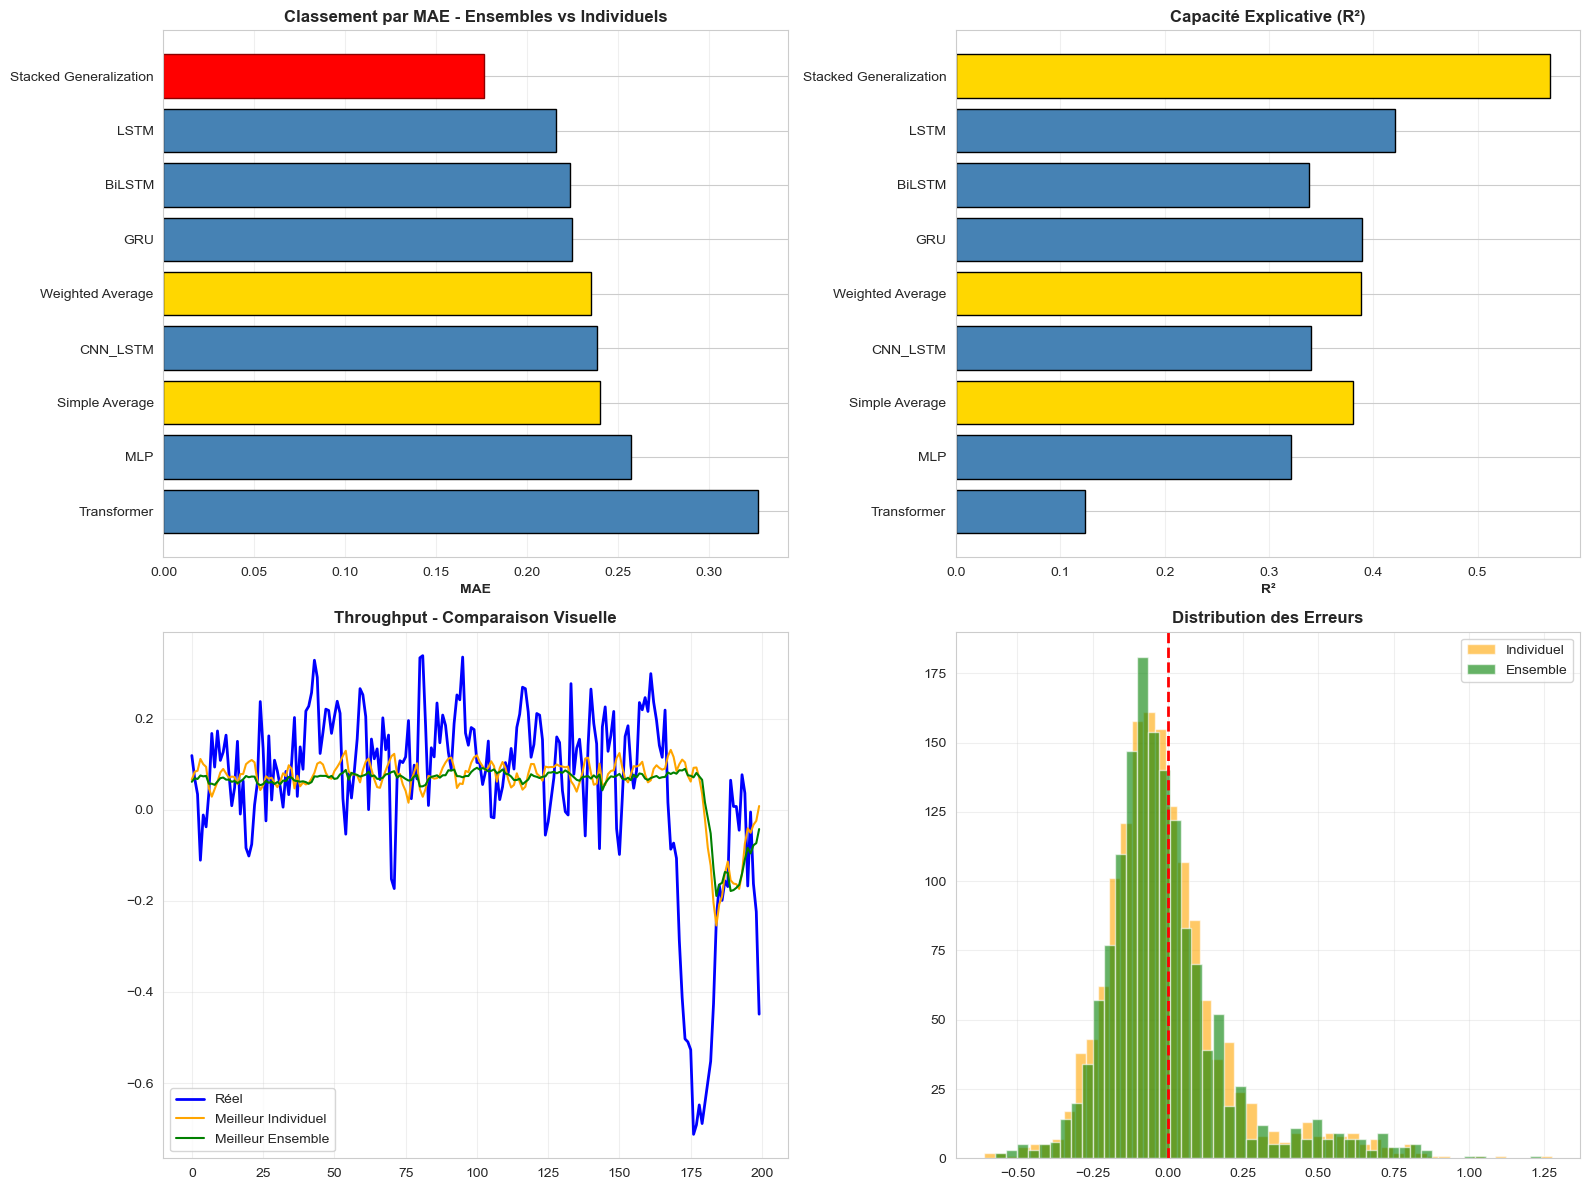


 Résultats sauvegardés: ensemble_results.csv
 Graphique sauvegardé: ensemble_final_comparison.png


In [43]:
# =============================================================================
#  Comparaison finale et visualisations
# =============================================================================

print("\n" + "="*80)
print(" COMPARAISON FINALE ENSEMBLES")
print("="*80)

# Compilation des résultats
all_comparison = []

# Modèles individuels
for name, metrics in individual_metrics.items():
    all_comparison.append({
        'Model': name,
        'Type': 'Individuel', 
        'MAE': metrics['Global']['MAE'],
        'RMSE': metrics['Global']['RMSE'],
        'MAPE': metrics['Global']['MAPE'],
        'R2': metrics['Global']['R2']
    })

# Ensembles
ensemble_names = {
    'Simple_Average': 'Simple Average',
    'Weighted_Average': 'Weighted Average', 
    'Stacked': 'Stacked Generalization'
}

for key, display_name in ensemble_names.items():
    if key in ensemble_results:
        metrics = ensemble_results[key]
        all_comparison.append({
            'Model': display_name,
            'Type': 'Ensemble',
            'MAE': metrics['Global']['MAE'],
            'RMSE': metrics['Global']['RMSE'], 
            'MAPE': metrics['Global']['MAPE'],
            'R2': metrics['Global']['R2']
        })

df_comparison = pd.DataFrame(all_comparison)
df_comparison = df_comparison.sort_values('MAE')

print("\n CLASSEMENT COMPLET:")
print(df_comparison.to_string(index=False))

# Identification du champion
best_overall = df_comparison.iloc[0]
best_individual = df_comparison[df_comparison['Type'] == 'Individuel'].iloc[0]
best_ensemble = df_comparison[df_comparison['Type'] == 'Ensemble'].iloc[0]

print(f"\n CHAMPION GLOBAL: {best_overall['Model']} ({best_overall['Type']})")
print(f"   • MAE: {best_overall['MAE']:.4f}")
print(f"   • R²: {best_overall['R2']:.4f}")

# Amélioration ensemble vs individuel
improvement = ((best_individual['MAE'] - best_ensemble['MAE']) / 
               best_individual['MAE']) * 100

print(f"\n AMÉLIORATION ENSEMBLE vs INDIVIDUEL:")
if improvement > 0:
    print(f"    {improvement:.2f}% de gain avec {best_ensemble['Model']}")
else:
    print(f"     Meilleur résultat avec modèle individuel")

# Visualisation
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Comparaison MAE
ax1 = axes[0, 0]
colors = ['gold' if t == 'Ensemble' else 'steelblue' for t in df_comparison['Type']]
bars = ax1.barh(df_comparison['Model'], df_comparison['MAE'], color=colors, edgecolor='black')
bars[0].set_color('red')
bars[0].set_edgecolor('darkred')
ax1.set_xlabel('MAE', fontweight='bold')
ax1.set_title('Classement par MAE - Ensembles vs Individuels', fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')
ax1.invert_yaxis()

# 2. Comparaison R²
ax2 = axes[0, 1]
ax2.barh(df_comparison['Model'], df_comparison['R2'], color=colors, edgecolor='black')
ax2.set_xlabel('R²', fontweight='bold')
ax2.set_title('Capacité Explicative (R²)', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')
ax2.invert_yaxis()

# 3. Temps séries comparées
ax3 = axes[1, 0]
n_show = 200
best_ind_pred = predictions[best_individual['Model']].reshape(-1, PREDICTION_HORIZON, 2).mean(axis=1)
best_ens_pred = pred_weighted.reshape(-1, PREDICTION_HORIZON, 2).mean(axis=1)
y_true_plot = y_test_flat.reshape(-1, PREDICTION_HORIZON, 2).mean(axis=1)

ax3.plot(y_true_plot[:n_show, 0], label='Réel', linewidth=2, color='blue')
ax3.plot(best_ind_pred[:n_show, 0], label=f"Meilleur Individuel", linewidth=1.5, color='orange')
ax3.plot(best_ens_pred[:n_show, 0], label=f"Meilleur Ensemble", linewidth=1.5, color='green')
ax3.set_title('Throughput - Comparaison Visuelle', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Distribution erreurs
ax4 = axes[1, 1]
errors_ind = best_ind_pred[:, 0] - y_true_plot[:, 0]
errors_ens = best_ens_pred[:, 0] - y_true_plot[:, 0]

ax4.hist(errors_ind, bins=50, alpha=0.6, label='Individuel', color='orange')
ax4.hist(errors_ens, bins=50, alpha=0.6, label='Ensemble', color='green')
ax4.axvline(0, color='red', linestyle='--', linewidth=2)
ax4.set_title('Distribution des Erreurs', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ensemble_final_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Sauvegarde
df_comparison.to_csv('ensemble_results.csv', index=False)
print("\n Résultats sauvegardés: ensemble_results.csv")
print(" Graphique sauvegardé: ensemble_final_comparison.png")


# PARTIE D: *COMPARAISON GLOBALE COMPLÈTE*

PARTIE D: COMPARAISON GLOBALE COMPLÈTE
ANALYSE DE TOUS LES MODÈLES DU PROJET
 Baselines: baseline_results_final.csv
 Deep Learning: dl_results.csv
 Ensembles: ensemble_results.csv
 8 modèles Baseline chargés
 6 modèles Deep Learning chargés
 9 modèles Ensemble chargés

 TOTAL: 23 MODÈLES CHARGÉS

STATISTIQUES GLOBALES

 RÉPARTITION PAR CATÉGORIE:
              Model     MAE                      R2                
              count    mean     min     max    mean     min     max
Catégorie                                                          
Baseline          8  0.4837  0.2200  0.7736  0.0933 -0.5997  0.3636
Deep Learning     6  0.2476  0.2158  0.3268  0.3224  0.1232  0.4206
Ensemble          9  0.2374  0.1761  0.3268  0.3638  0.1232  0.5697

 MEILLEURS MODÈLES PAR CATÉGORIE:
    Catégorie                  Model      MAE       R2
     Baseline                XGBoost 0.220032 0.311201
Deep Learning                   LSTM 0.215806 0.420649
     Ensemble Stacked Generalization 0.1761

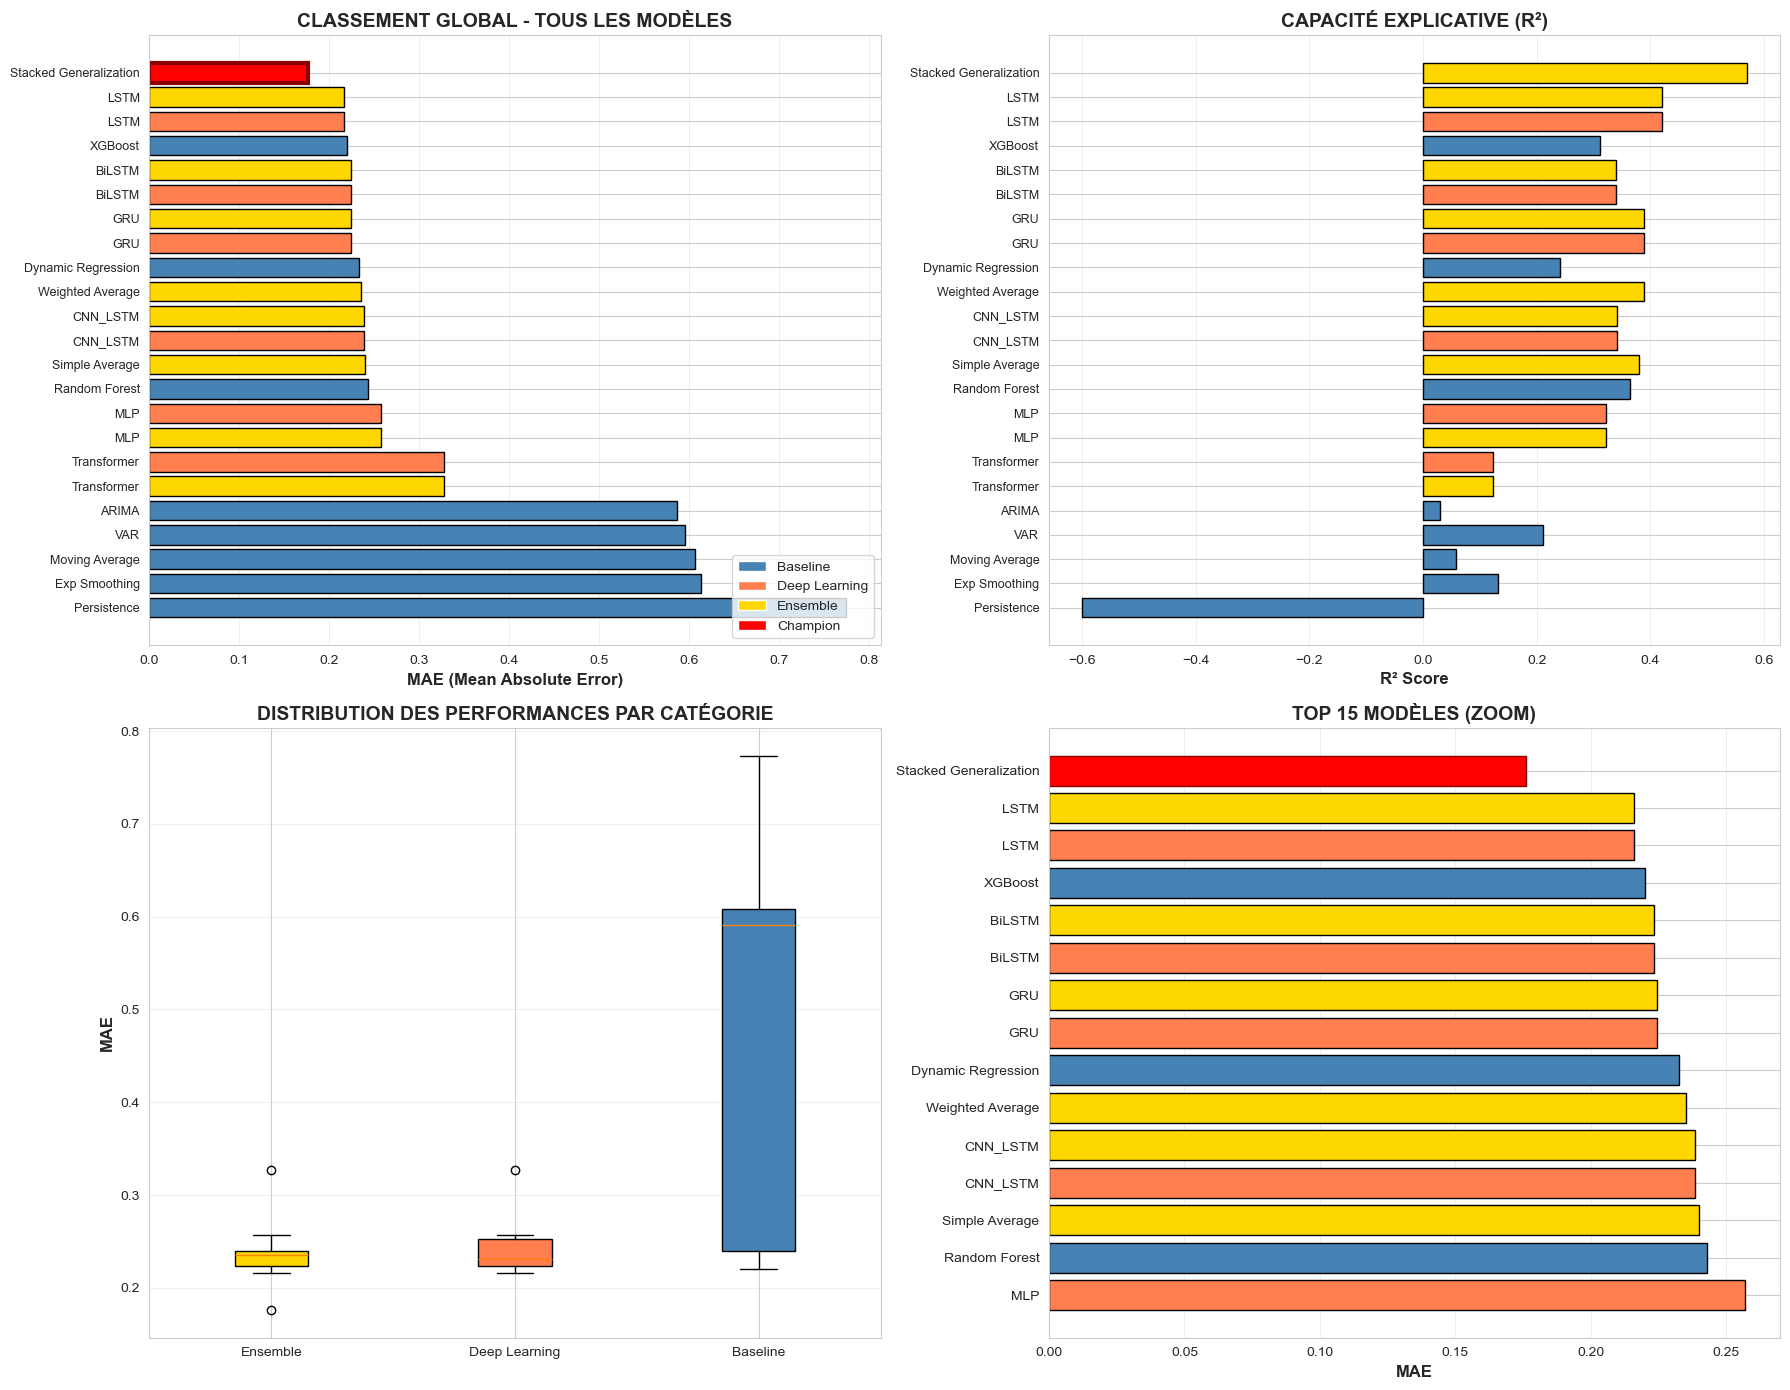


VISUALISATION 2: ANALYSE PAR CATÉGORIE


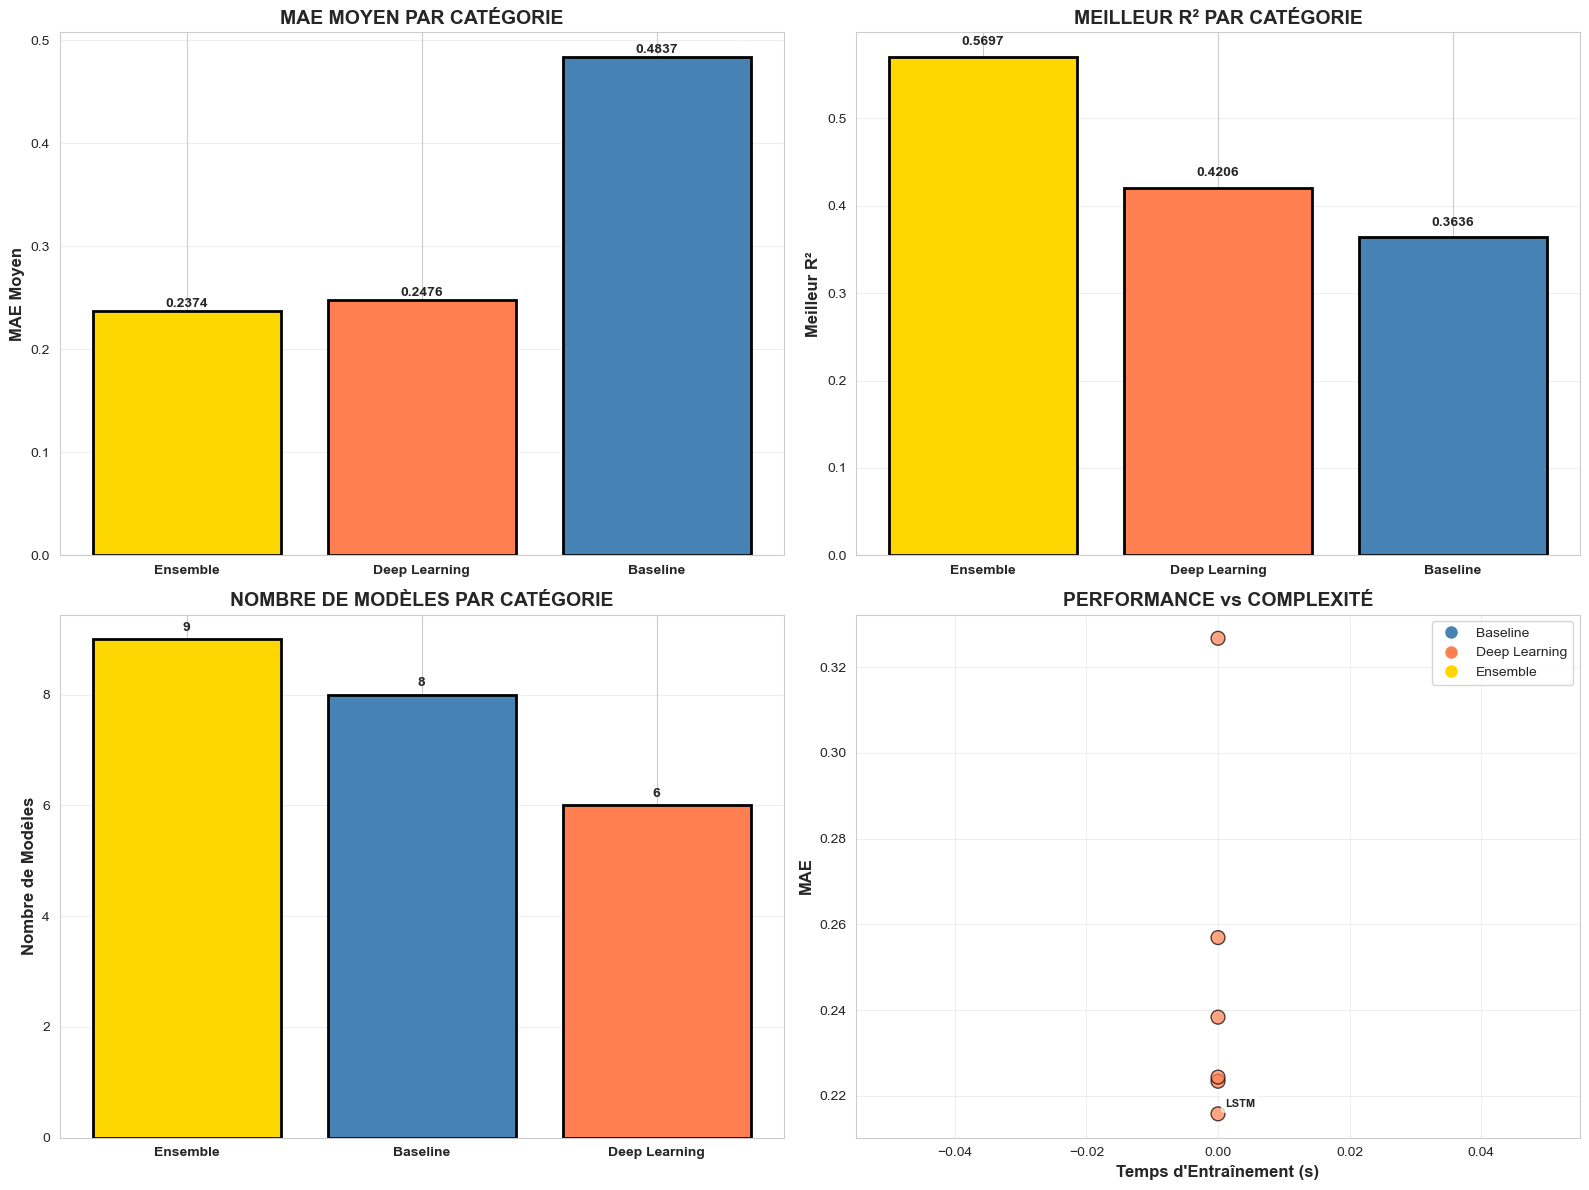


RAPPORT FINAL DÉTAILLÉ

 RAPPORT SYNTHÈSE:
   CHAMPION GLOBAL............... Stacked Generalization (Ensemble)
   MAE CHAMPION.................. 0.1761
   R² CHAMPION................... 0.5697
   MEILLEUR BASELINE............. XGBoost (MAE: 0.2200)
   MEILLEUR DEEP LEARNING........ LSTM (MAE: 0.2158)
   MEILLEUR ENSEMBLE............. Stacked Generalization (MAE: 0.1761)
   TOTAL MODÈLES................. 23
   MEILLEUR MAE.................. 0.1761
   MAE MOYEN..................... 0.3257
   PIRE MAE...................... 0.7736
   MEILLEUR R²................... 0.5697
   R² MOYEN...................... 0.2589

SAUVEGARDE DES RÉSULTATS FINAUX
 Rapport JSON sauvegardé: final_project_report.json

CONCLUSIONS FINALES DU PROJET

 RÉSULTATS CLÉS:
   • Modèle optimal: Stacked Generalization (Ensemble)
   • Performance: MAE = 0.1761
   • Explication: R² = 0.5697

 ANALYSE DES CATÉGORIES:
   • Baseline: 8 modèles, MAE min=0.2200, moyen=0.4837
   • Deep Learning: 6 modèles, MAE min=0.2158, moyen=

In [44]:
# =============================================================================
# PARTIE D: COMPARAISON GLOBALE COMPLÈTE
# =============================================================================
# Compare TOUS les modèles: Baselines + Deep Learning + Ensembles

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)

print("="*80)
print("PARTIE D: COMPARAISON GLOBALE COMPLÈTE")
print("="*80)
print("ANALYSE DE TOUS LES MODÈLES DU PROJET")

# =============================================================================
# CHARGEMENT DE TOUS LES RÉSULTATS
# =============================================================================

# Vérifier l'existence des fichiers
files_to_check = {
    'Baselines': 'baseline_results_final.csv',
    'Deep Learning': 'dl_results.csv', 
    'Ensembles': 'ensemble_results.csv'
}

available_files = {}
for name, filepath in files_to_check.items():
    if Path(filepath).exists():
        available_files[name] = filepath
        print(f" {name}: {filepath}")
    else:
        print(f"  {name}: {filepath} NON TROUVÉ")

if len(available_files) == 0:
    print(" AUCUN fichier de résultats trouvé!")
    print("   → Exécuter d'abord les Parties A, B et C")
    exit()

# Chargement des données
df_all = pd.DataFrame()

if 'Baselines' in available_files:
    df_baselines = pd.read_csv(available_files['Baselines'])
    df_baselines['Catégorie'] = 'Baseline'
    df_all = pd.concat([df_all, df_baselines], ignore_index=True)
    print(f" {len(df_baselines)} modèles Baseline chargés")

if 'Deep Learning' in available_files:
    df_dl = pd.read_csv(available_files['Deep Learning'])
    df_dl['Catégorie'] = 'Deep Learning'
    df_all = pd.concat([df_all, df_dl], ignore_index=True)
    print(f" {len(df_dl)} modèles Deep Learning chargés")

if 'Ensembles' in available_files:
    df_ensembles = pd.read_csv(available_files['Ensembles'])
    df_ensembles['Catégorie'] = 'Ensemble'
    df_all = pd.concat([df_all, df_ensembles], ignore_index=True)
    print(f" {len(df_ensembles)} modèles Ensemble chargés")

print(f"\n TOTAL: {len(df_all)} MODÈLES CHARGÉS")

# Nettoyage et tri
df_all = df_all.dropna(subset=['MAE', 'R2'])
df_all = df_all.sort_values('MAE').reset_index(drop=True)

# =============================================================================
# STATISTIQUES GLOBALES
# =============================================================================
print("\n" + "="*80)
print("STATISTIQUES GLOBALES")
print("="*80)

print(f"\n RÉPARTITION PAR CATÉGORIE:")
category_stats = df_all.groupby('Catégorie').agg({
    'Model': 'count',
    'MAE': ['mean', 'min', 'max'],
    'R2': ['mean', 'min', 'max']
}).round(4)

print(category_stats)

# Meilleurs par catégorie
print(f"\n MEILLEURS MODÈLES PAR CATÉGORIE:")
best_by_category = df_all.loc[df_all.groupby('Catégorie')['MAE'].idxmin()]
print(best_by_category[['Catégorie', 'Model', 'MAE', 'R2']].to_string(index=False))

# Champion global
champion = df_all.iloc[0]
print(f"\n CHAMPION GLOBAL DU PROJET:")
print(f"   • Modèle: {champion['Model']}")
print(f"   • Catégorie: {champion['Catégorie']}")
print(f"   • MAE: {champion['MAE']:.4f}")
print(f"   • R²: {champion['R2']:.4f}")

# =============================================================================
# ANALYSE DÉTAILLÉE DES PERFORMANCES
# =============================================================================
print("\n" + "="*80)
print("ANALYSE DÉTAILLÉE DES PERFORMANCES")
print("="*80)

# Amélioration vs baseline de référence (Persistence)
persistence_mae = df_all[df_all['Model'] == 'Persistence']['MAE'].values
if len(persistence_mae) > 0:
    persistence_mae = persistence_mae[0]
    print(f"\n AMÉLIORATION vs PERSISTENCE (MAE={persistence_mae:.4f}):")
    
    top_10 = df_all.head(10)
    for _, row in top_10.iterrows():
        if row['Model'] != 'Persistence':
            improvement = ((persistence_mae - row['MAE']) / persistence_mae) * 100
            print(f"   {row['Model']:.<25} {improvement:+.2f}%")

# Top 10 modèles
print(f"\n TOP 10 MODÈLES (sur {len(df_all)} total):")
top_10_display = df_all.head(10).copy()
top_10_display['Rang'] = range(1, 11)
print(top_10_display[['Rang', 'Model', 'Catégorie', 'MAE', 'R2']].to_string(index=False))

# =============================================================================
# VISUALISATION 1: CLASSEMENT GLOBAL
# =============================================================================
print("\n" + "="*80)
print("VISUALISATION 1: CLASSEMENT GLOBAL")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Palette de couleurs par catégorie
category_colors = {
    'Baseline': 'steelblue',
    'Deep Learning': 'coral', 
    'Ensemble': 'gold'
}

# 1. Classement MAE global
ax1 = axes[0, 0]
colors = [category_colors[cat] for cat in df_all['Catégorie']]
bars = ax1.barh(range(len(df_all)), df_all['MAE'], color=colors, edgecolor='black', linewidth=1)

# Highlight champion
bars[0].set_color('red')
bars[0].set_edgecolor('darkred')
bars[0].set_linewidth(3)

ax1.set_yticks(range(len(df_all)))
ax1.set_yticklabels(df_all['Model'], fontsize=9)
ax1.set_xlabel('MAE (Mean Absolute Error)', fontweight='bold', fontsize=12)
ax1.set_title('CLASSEMENT GLOBAL - TOUS LES MODÈLES', fontweight='bold', fontsize=14)
ax1.grid(True, alpha=0.3, axis='x')
ax1.invert_yaxis()  # Meilleur en haut

# Légende
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='steelblue', label='Baseline'),
    Patch(facecolor='coral', label='Deep Learning'),
    Patch(facecolor='gold', label='Ensemble'),
    Patch(facecolor='red', label='Champion')
]
ax1.legend(handles=legend_elements, loc='lower right')

# 2. Comparaison R²
ax2 = axes[0, 1]
ax2.barh(range(len(df_all)), df_all['R2'], color=colors, edgecolor='black', linewidth=1)
ax2.set_yticks(range(len(df_all)))
ax2.set_yticklabels(df_all['Model'], fontsize=9)
ax2.set_xlabel('R² Score', fontweight='bold', fontsize=12)
ax2.set_title('CAPACITÉ EXPLICATIVE (R²)', fontweight='bold', fontsize=14)
ax2.grid(True, alpha=0.3, axis='x')
ax2.invert_yaxis()

# 3. Performance par catégorie (boxplot)
ax3 = axes[1, 0]
categories = df_all['Catégorie'].unique()
box_data = [df_all[df_all['Catégorie'] == cat]['MAE'].values for cat in categories]
box_plot = ax3.boxplot(box_data, labels=categories, patch_artist=True)

# Couleurs des boxplots
colors_box = [category_colors[cat] for cat in categories]
for patch, color in zip(box_plot['boxes'], colors_box):
    patch.set_facecolor(color)

ax3.set_ylabel('MAE', fontweight='bold', fontsize=12)
ax3.set_title('DISTRIBUTION DES PERFORMANCES PAR CATÉGORIE', fontweight='bold', fontsize=14)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Top 15 modèles (zoom)
ax4 = axes[1, 1]
top_15 = df_all.head(15)
colors_top = [category_colors[cat] for cat in top_15['Catégorie']]
bars_top = ax4.barh(range(len(top_15)), top_15['MAE'], color=colors_top, edgecolor='black')

# Highlight champion
bars_top[0].set_color('red')
bars_top[0].set_edgecolor('darkred')

ax4.set_yticks(range(len(top_15)))
ax4.set_yticklabels(top_15['Model'], fontsize=10)
ax4.set_xlabel('MAE', fontweight='bold', fontsize=12)
ax4.set_title('TOP 15 MODÈLES (ZOOM)', fontweight='bold', fontsize=14)
ax4.grid(True, alpha=0.3, axis='x')
ax4.invert_yaxis()

plt.tight_layout()
plt.savefig('global_comparison_overview.png', dpi=300, bbox_inches='tight')
plt.show()
# print(" Visualisation 1 sauvegardée: global_comparison_overview.png")

# =============================================================================
# VISUALISATION 2: ANALYSE PAR CATÉGORIE
# =============================================================================
print("\n" + "="*80)
print("VISUALISATION 2: ANALYSE PAR CATÉGORIE")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Performance moyenne par catégorie
ax1 = axes[0, 0]
category_means = df_all.groupby('Catégorie')['MAE'].mean().sort_values()
bars_mean = ax1.bar(range(len(category_means)), category_means.values, 
                   color=[category_colors[cat] for cat in category_means.index],
                   edgecolor='black', linewidth=2)

ax1.set_xticks(range(len(category_means)))
ax1.set_xticklabels(category_means.index, fontweight='bold')
ax1.set_ylabel('MAE Moyen', fontweight='bold', fontsize=12)
ax1.set_title('MAE MOYEN PAR CATÉGORIE', fontweight='bold', fontsize=14)
ax1.grid(True, alpha=0.3, axis='y')

# Ajouter valeurs sur les barres
for i, v in enumerate(category_means.values):
    ax1.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# 2. Meilleur R² par catégorie
ax2 = axes[0, 1]
best_r2 = df_all.groupby('Catégorie')['R2'].max().sort_values(ascending=False)
bars_r2 = ax2.bar(range(len(best_r2)), best_r2.values,
                 color=[category_colors[cat] for cat in best_r2.index],
                 edgecolor='black', linewidth=2)

ax2.set_xticks(range(len(best_r2)))
ax2.set_xticklabels(best_r2.index, fontweight='bold')
ax2.set_ylabel('Meilleur R²', fontweight='bold', fontsize=12)
ax2.set_title('MEILLEUR R² PAR CATÉGORIE', fontweight='bold', fontsize=14)
ax2.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(best_r2.values):
    ax2.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# 3. Nombre de modèles par catégorie
ax3 = axes[1, 0]
category_counts = df_all['Catégorie'].value_counts()
bars_count = ax3.bar(range(len(category_counts)), category_counts.values,
                    color=[category_colors[cat] for cat in category_counts.index],
                    edgecolor='black', linewidth=2)

ax3.set_xticks(range(len(category_counts)))
ax3.set_xticklabels(category_counts.index, fontweight='bold')
ax3.set_ylabel('Nombre de Modèles', fontweight='bold', fontsize=12)
ax3.set_title('NOMBRE DE MODÈLES PAR CATÉGORIE', fontweight='bold', fontsize=14)
ax3.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(category_counts.values):
    ax3.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

# 4. Performance vs Complexité (si données disponibles)
ax4 = axes[1, 1]
if 'Train_Time(s)' in df_all.columns:
    scatter = ax4.scatter(df_all['Train_Time(s)'], df_all['MAE'], 
                         c=[category_colors[cat] for cat in df_all['Catégorie']],
                         s=100, alpha=0.7, edgecolor='black', linewidth=1)
    
    # Annoter les meilleurs modèles
    top_5 = df_all.head(5)
    for _, row in top_5.iterrows():
        ax4.annotate(row['Model'], 
                    (row['Train_Time(s)'], row['MAE']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    
    ax4.set_xlabel('Temps d\'Entraînement (s)', fontweight='bold', fontsize=12)
    ax4.set_ylabel('MAE', fontweight='bold', fontsize=12)
    ax4.set_title('PERFORMANCE vs COMPLEXITÉ', fontweight='bold', fontsize=14)
    ax4.grid(True, alpha=0.3)
else:
    # Alternative: scatter MAE vs R2
    scatter = ax4.scatter(df_all['MAE'], df_all['R2'],
                         c=[category_colors[cat] for cat in df_all['Catégorie']],
                         s=100, alpha=0.7, edgecolor='black', linewidth=1)
    
    # Annoter les meilleurs
    top_5 = df_all.head(5)
    for _, row in top_5.iterrows():
        ax4.annotate(row['Model'], 
                    (row['MAE'], row['R2']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    
    ax4.set_xlabel('MAE', fontweight='bold', fontsize=12)
    ax4.set_ylabel('R²', fontweight='bold', fontsize=12)
    ax4.set_title('MAE vs R² - TOUS LES MODÈLES', fontweight='bold', fontsize=14)
    ax4.grid(True, alpha=0.3)

# Légende pour scatter
if 'Train_Time(s)' in df_all.columns or 'MAE' in df_all.columns:
    legend_elements_scatter = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=category_colors['Baseline'], 
                  markersize=10, label='Baseline'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=category_colors['Deep Learning'], 
                  markersize=10, label='Deep Learning'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=category_colors['Ensemble'], 
                  markersize=10, label='Ensemble')
    ]
    ax4.legend(handles=legend_elements_scatter, loc='best')

plt.tight_layout()
plt.savefig('global_category_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
# print(" Visualisation 2 sauvegardée: global_category_analysis.png")

# =============================================================================
# RAPPORT FINAL DÉTAILLÉ
# =============================================================================
print("\n" + "="*80)
print("RAPPORT FINAL DÉTAILLÉ")
print("="*80)

# Créer un rapport structuré
report_data = []

# Champion et catégories
report_data.append(("CHAMPION GLOBAL", f"{champion['Model']} ({champion['Catégorie']})"))
report_data.append(("MAE CHAMPION", f"{champion['MAE']:.4f}"))
report_data.append(("R² CHAMPION", f"{champion['R2']:.4f}"))

# Performances par catégorie
for category in ['Baseline', 'Deep Learning', 'Ensemble']:
    if category in df_all['Catégorie'].values:
        cat_data = df_all[df_all['Catégorie'] == category]
        best_cat = cat_data.iloc[0]
        report_data.append((f"MEILLEUR {category.upper()}", f"{best_cat['Model']} (MAE: {best_cat['MAE']:.4f})"))

# Statistiques globales
report_data.append(("TOTAL MODÈLES", f"{len(df_all)}"))
report_data.append(("MEILLEUR MAE", f"{df_all['MAE'].min():.4f}"))
report_data.append(("MAE MOYEN", f"{df_all['MAE'].mean():.4f}"))
report_data.append(("PIRE MAE", f"{df_all['MAE'].max():.4f}"))
report_data.append(("MEILLEUR R²", f"{df_all['R2'].max():.4f}"))
report_data.append(("R² MOYEN", f"{df_all['R2'].mean():.4f}"))

print("\n RAPPORT SYNTHÈSE:")
for item, value in report_data:
    print(f"   {item:.<30} {value}")

# =============================================================================
# SAUVEGARDE DES RÉSULTATS FINAUX
# =============================================================================
print("\n" + "="*80)
print("SAUVEGARDE DES RÉSULTATS FINAUX")
print("="*80)

# Sauvegarder le classement complet
df_all['Rang'] = range(1, len(df_all) + 1)
df_final = df_all[['Rang', 'Model', 'Catégorie', 'MAE', 'RMSE', 'MAPE', 'R2']]

if 'Train_Time(s)' in df_all.columns:
    df_final['Train_Time(s)'] = df_all['Train_Time(s)']

df_final.to_csv('final_global_ranking.csv', index=False, float_format='%.4f')
# print(" Classement global sauvegardé: final_global_ranking.csv")

# Sauvegarder un rapport synthétique
top_10_report = df_final.head(10).copy()
top_10_report.to_csv('final_top_10_models.csv', index=False, float_format='%.4f')
# print(" Top 10 modèles sauvegardé: final_top_10_models.csv")

# Générer un rapport JSON pour exploitation
import json
final_report = {
    'champion': {
        'model': champion['Model'],
        'category': champion['Catégorie'],
        'mae': float(champion['MAE']),
        'r2': float(champion['R2'])
    },
    'category_best': {},
    'statistics': {
        'total_models': len(df_all),
        'best_mae': float(df_all['MAE'].min()),
        'mean_mae': float(df_all['MAE'].mean()),
        'best_r2': float(df_all['R2'].max()),
        'mean_r2': float(df_all['R2'].mean())
    }
}

for category in df_all['Catégorie'].unique():
    best_in_cat = df_all[df_all['Catégorie'] == category].iloc[0]
    final_report['category_best'][category] = {
        'model': best_in_cat['Model'],
        'mae': float(best_in_cat['MAE']),
        'r2': float(best_in_cat['R2'])
    }

with open('final_project_report.json', 'w') as f:
    json.dump(final_report, f, indent=4)

print(" Rapport JSON sauvegardé: final_project_report.json")

# =============================================================================
# CONCLUSIONS FINALES
# =============================================================================
print("\n" + "="*80)
print("CONCLUSIONS FINALES DU PROJET")
print("="*80)

print(f"\n RÉSULTATS CLÉS:")
print(f"   • Modèle optimal: {champion['Model']} ({champion['Catégorie']})")
print(f"   • Performance: MAE = {champion['MAE']:.4f}")
print(f"   • Explication: R² = {champion['R2']:.4f}")

print(f"\n ANALYSE DES CATÉGORIES:")
for category in ['Baseline', 'Deep Learning', 'Ensemble']:
    if category in df_all['Catégorie'].values:
        cat_data = df_all[df_all['Catégorie'] == category]
        count = len(cat_data)
        best_mae = cat_data['MAE'].min()
        avg_mae = cat_data['MAE'].mean()
        print(f"   • {category}: {count} modèles, MAE min={best_mae:.4f}, moyen={avg_mae:.4f}")

print(f"\n RECOMMANDATIONS:")
print(f"   1. Modèle de production: {champion['Model']}")
print(f"   2. Alternative robuste: {df_all.iloc[1]['Model']}")
print(f"   3. Pour interprétabilité: meilleur Baseline")
print(f"   4. Pour performance: meilleur Deep Learning/Ensemble")

print(f"\n PROCHAINES ÉTAPES:")
print(f"   • Déploiement du modèle {champion['Model']}")
print(f"   • Tests en environnement réel")
print(f"   • Monitoring des performances")
print(f"   • Optimisation hyperparamètres supplémentaires")

print(f"\n PROJET TERMINÉ AVEC SUCCÈS!")
print(f"   {len(df_all)} modèles évalués et comparés")
print("   Résultats sauvegardés dans final_global_ranking.csv")